# 0: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as mpl
import seaborn as sns
import copy
from sklearn.datasets import make_classification
%matplotlib inline

# 1: Import Data

In [3]:
patient_data = pd.read_csv(r"C:\Users\Migue\OneDrive\Documents\IACD\file\hcc_dataset.csv")

In [4]:
patient_data.head()

ID  Gender Symptoms Alcohol HBsAg HBeAg HBcAb HCVAb Cirrhosis Endemic  ...  \
0   1    Male       No     Yes    No    No    No    No       Yes      No  ...   
1   2  Female        ?      No    No    No    No   Yes       Yes       ?  ...   
2   3    Male       No     Yes   Yes    No   Yes    No       Yes      No  ...   
3   4    Male      Yes     Yes    No    No    No    No       Yes      No  ...   
4   5    Male      Yes     Yes   Yes    No   Yes    No       Yes      No  ...   

   ALP   TP Creatinine Nodules Major_Dim Dir_Bil Iron Sat Ferritin  Class  
0  150  7.1        0.7       1       3.5     0.5    ?   ?        ?  Lives  
1    ?    ?          ?       1       1.8       ?    ?   ?        ?  Lives  
2  109    7        2.1       5        13     0.1   28   6       16  Lives  
3  174  8.1       1.11       2      15.7     0.2    ?   ?        ?   Dies  
4  109  6.9        1.8       1         9       ?   59  15       22  Lives  

[5 rows x 51 columns]

In [5]:
patient_data.shape

(165, 51)

In [6]:
patient_data.columns

Index(['ID', 'Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb',
       'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity',
       'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT',
       'PVT', 'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')

In [7]:
numbers_data = patient_data[["Age", "Grams_day", "Packs_year", "INR", "AFP", "Hemoglobin", "MCV", "Leucocytes", "Platelets", "Albumin", "Total_Bil", "ALT", "AST", "GGT", "ALP", "TP", "Creatinine", "Nodules", "Major_Dim", "Dir_Bil", "Iron", "Sat", "Ferritin"]]
string_data = patient_data[["Gender", "Symptoms", "Alcohol", "HBsAg", "HBeAg", "HBcAb", "HCVAb", "Cirrhosis", 'Endemic', 'Smoking', 'Diabetes', 'Obesity',
       'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT',
       'PVT', 'Metastasis', 'Hallmark', "PS", 'Encephalopathy', 'Ascites', "Class"]]

In [8]:
pd.set_option('display.max_columns', None)
numbers_data.head()

Age Grams_day Packs_year   INR   AFP Hemoglobin    MCV Leucocytes  \
0   67       137         15  1.53    95       13.7  106.6        4.9   
1   62         0          ?     ?     ?          ?      ?          ?   
2   78        50         50  0.96   5.8        8.9   79.8        8.4   
3   77        40         30  0.95  2440       13.4   97.1          9   
4   76       100         30  0.94    49       14.3   95.1        6.4   

  Platelets Albumin Total_Bil  ALT  AST  GGT  ALP   TP Creatinine Nodules  \
0        99     3.4       2.1   34   41  183  150  7.1        0.7       1   
1         ?       ?         ?    ?    ?    ?    ?    ?          ?       1   
2       472     3.3       0.4   58   68  202  109    7        2.1       5   
3       279     3.7       0.4   16   64   94  174  8.1       1.11       2   
4       199     4.1       0.7  147  306  173  109  6.9        1.8       1   

  Major_Dim Dir_Bil Iron Sat Ferritin  
0       3.5     0.5    ?   ?        ?  
1       1.8       ?    ?   ?        ?  
2        13     0.1   28   6       16  
3      15.7     0.2    ?   ?        ?  
4         9       ?   59  15       22

In [9]:
nf = pd.DataFrame(numbers_data)

In [10]:
nf = nf.replace('?', np.nan)

In [11]:
nf = nf.astype(float)
nf_clean = copy.deepcopy(nf)
for column in nf_clean.columns:
    mean_value = nf_clean[column].mean()
    print(f"Mean of {column}: {mean_value}")
    nf_clean[column].fillna(mean_value, inplace=True)
int_columns = nf_clean[["Age","Grams_day", "Packs_year", "AFP", "Platelets", "ALT", "AST", "GGT", "ALP", "Nodules", "Iron", "Sat", "Ferritin"]]
float_columns = nf_clean[["INR","Hemoglobin", "MCV", "Leucocytes","Albumin", "Total_Bil","TP", "Creatinine","Major_Dim", "Dir_Bil",]]

#Convert columns to int
for col in int_columns:
    nf_clean[col] = nf_clean[col].astype(int)

#Convert columns to float
for col in float_columns:
    nf_clean[col] = nf_clean[col].astype(float)
nf_clean.head()

Mean of Age: 64.69090909090909
Mean of Grams_day: 71.00854700854701
Mean of Packs_year: 20.464285714285715
Mean of INR: 1.4218509316770187
Mean of AFP: 19299.951146496816
Mean of Hemoglobin: 12.87901234567901
Mean of MCV: 95.11975308641975
Mean of Leucocytes: 1473.9615493827162
Mean of Platelets: 113206.442654321
Mean of Albumin: 3.445534591194968
Mean of Total_Bil: 3.0879375000000002
Mean of ALT: 67.09316770186335
Mean of AST: 96.38271604938272
Mean of GGT: 268.02654320987654
Mean of ALP: 212.2116049382716
Mean of TP: 8.96103896103896
Mean of Creatinine: 1.1270886075949367
Mean of Nodules: 2.736196319018405
Mean of Major_Dim: 6.851172413793104
Mean of Dir_Bil: 1.9300000000000002
Mean of Iron: 85.59883720930233
Mean of Sat: 37.02894117647059
Mean of Ferritin: 438.9976470588236


Age  Grams_day  Packs_year       INR    AFP  Hemoglobin         MCV  \
0   67        137          15  1.530000     95   13.700000  106.600000   
1   62          0          20  1.421851  19299   12.879012   95.119753   
2   78         50          50  0.960000      5    8.900000   79.800000   
3   77         40          30  0.950000   2440   13.400000   97.100000   
4   76        100          30  0.940000     49   14.300000   95.100000   

    Leucocytes  Platelets   Albumin  Total_Bil  ALT  AST  GGT  ALP        TP  \
0     4.900000         99  3.400000   2.100000   34   41  183  150  7.100000   
1  1473.961549     113206  3.445535   3.087938   67   96  268  212  8.961039   
2     8.400000        472  3.300000   0.400000   58   68  202  109  7.000000   
3     9.000000        279  3.700000   0.400000   16   64   94  174  8.100000   
4     6.400000        199  4.100000   0.700000  147  306  173  109  6.900000   

   Creatinine  Nodules  Major_Dim  Dir_Bil  Iron  Sat  Ferritin  
0    0.700000        1        3.5     0.50    85   37       438  
1    1.127089        1        1.8     1.93    85   37       438  
2    2.100000        5       13.0     0.10    28    6        16  
3    1.110000        2       15.7     0.20    85   37       438  
4    1.800000        1        9.0     1.93    59   15        22

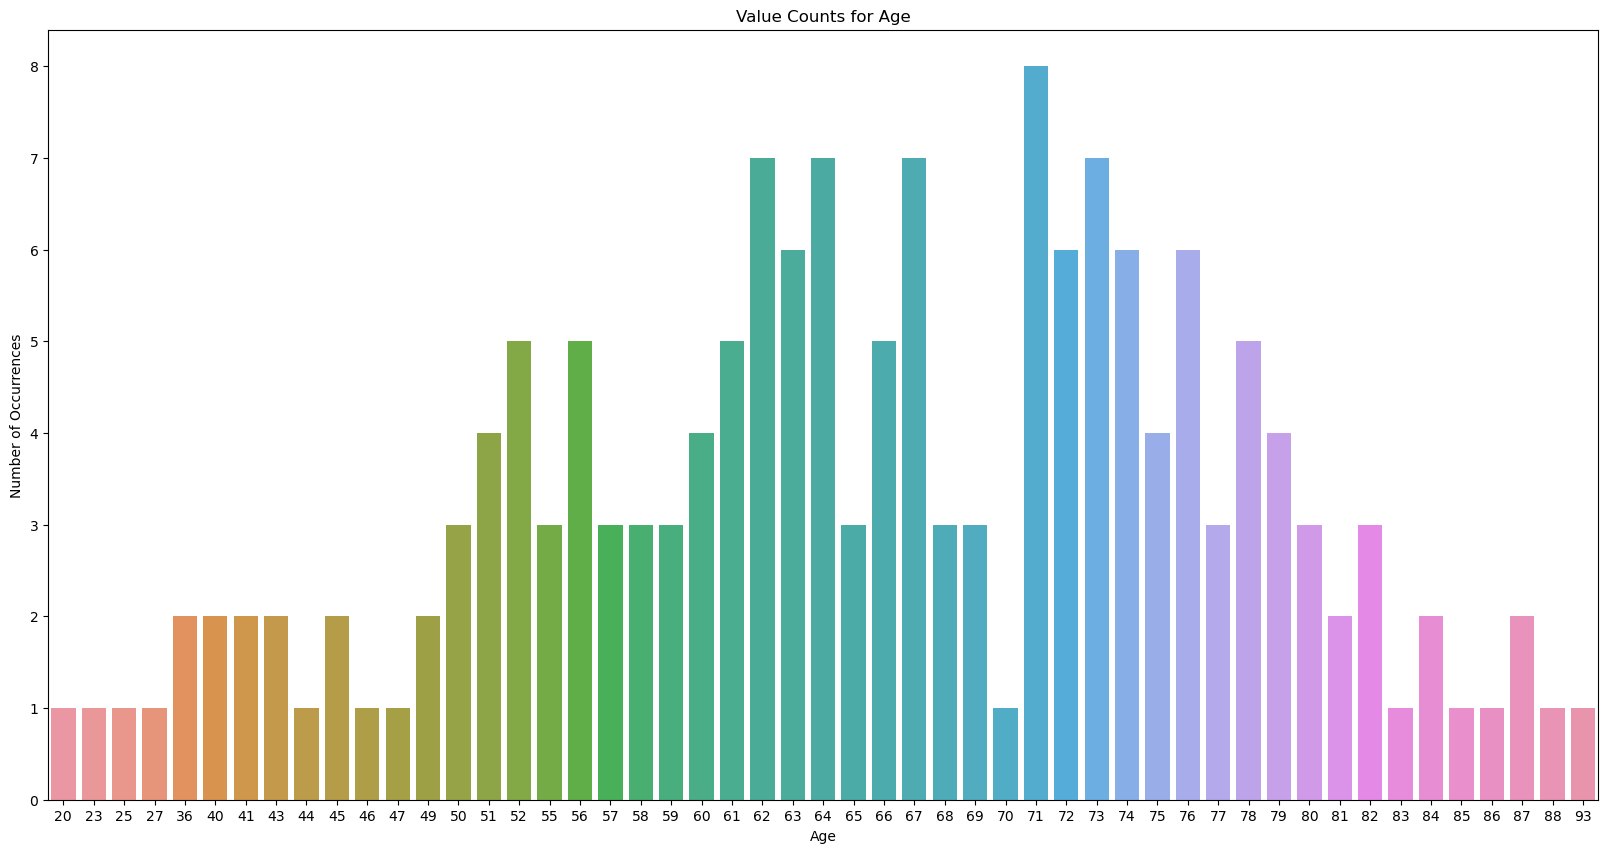

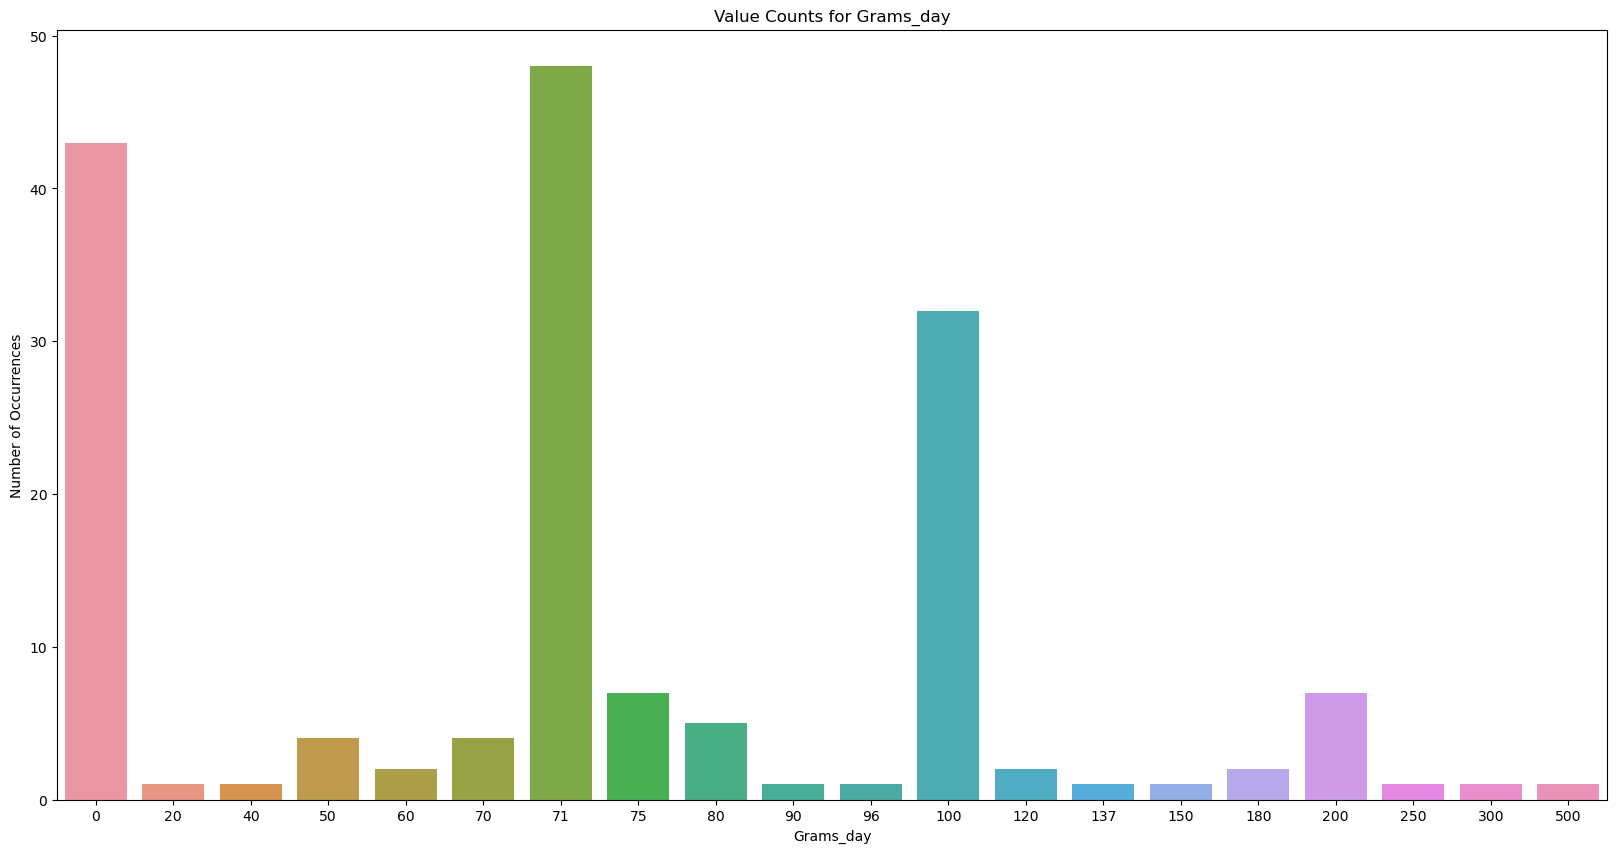

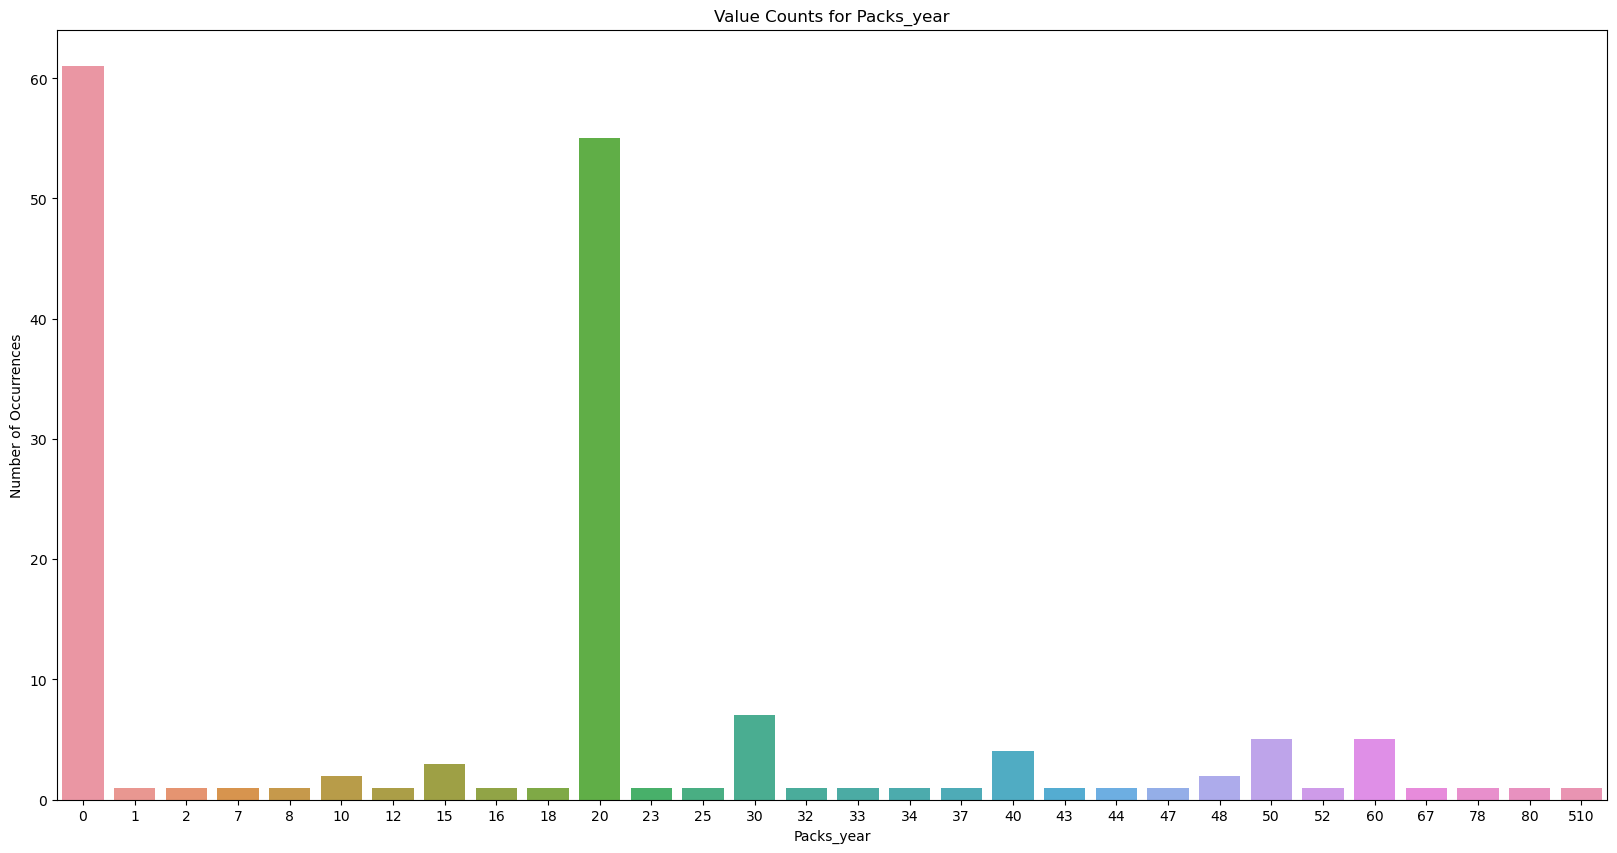

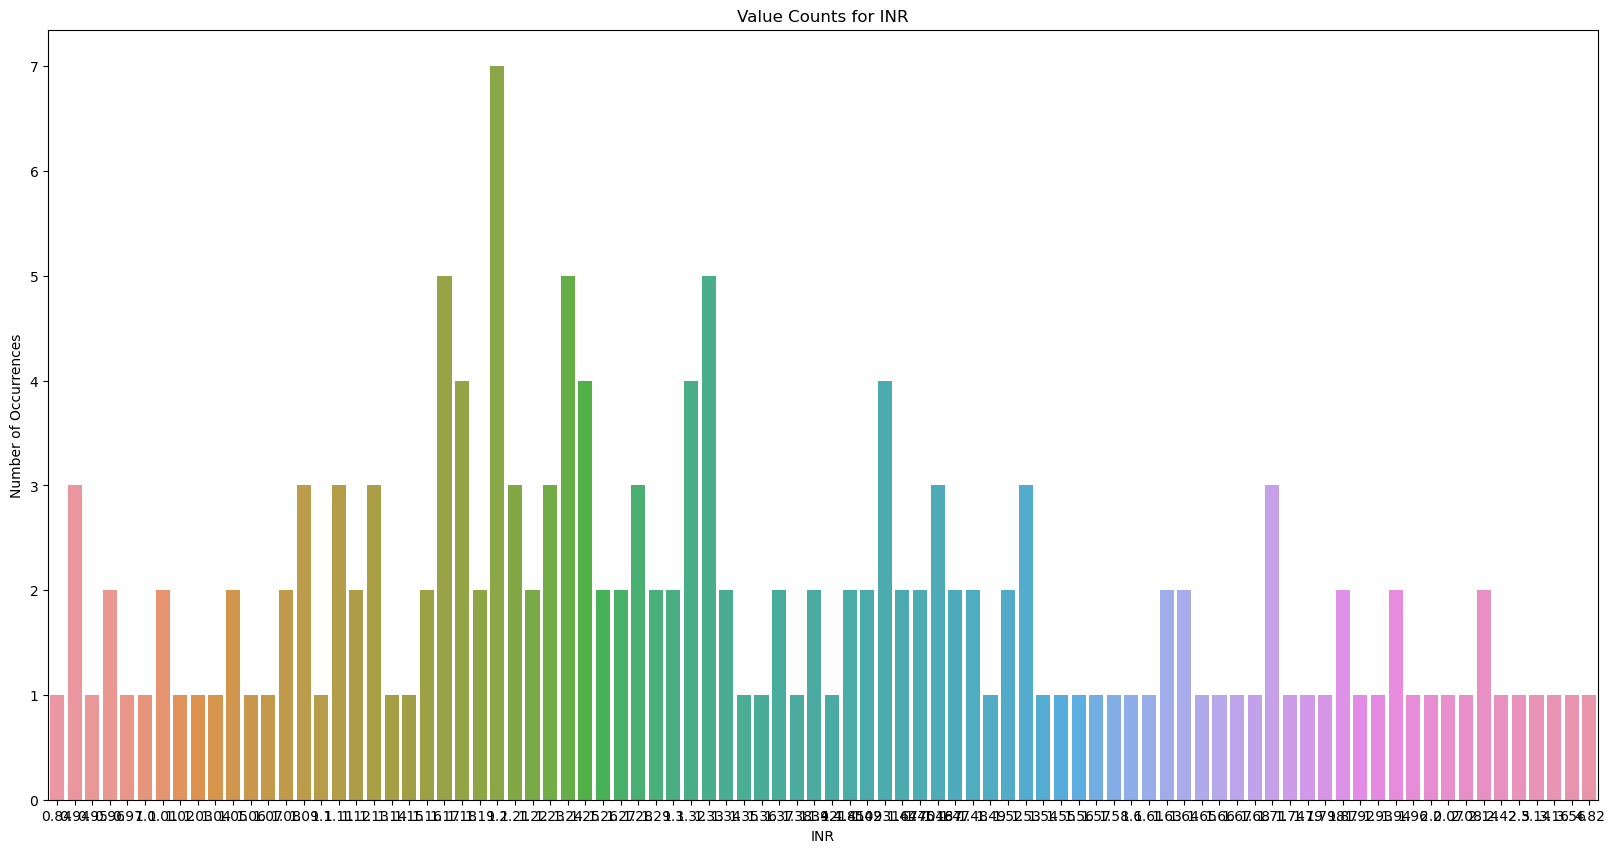

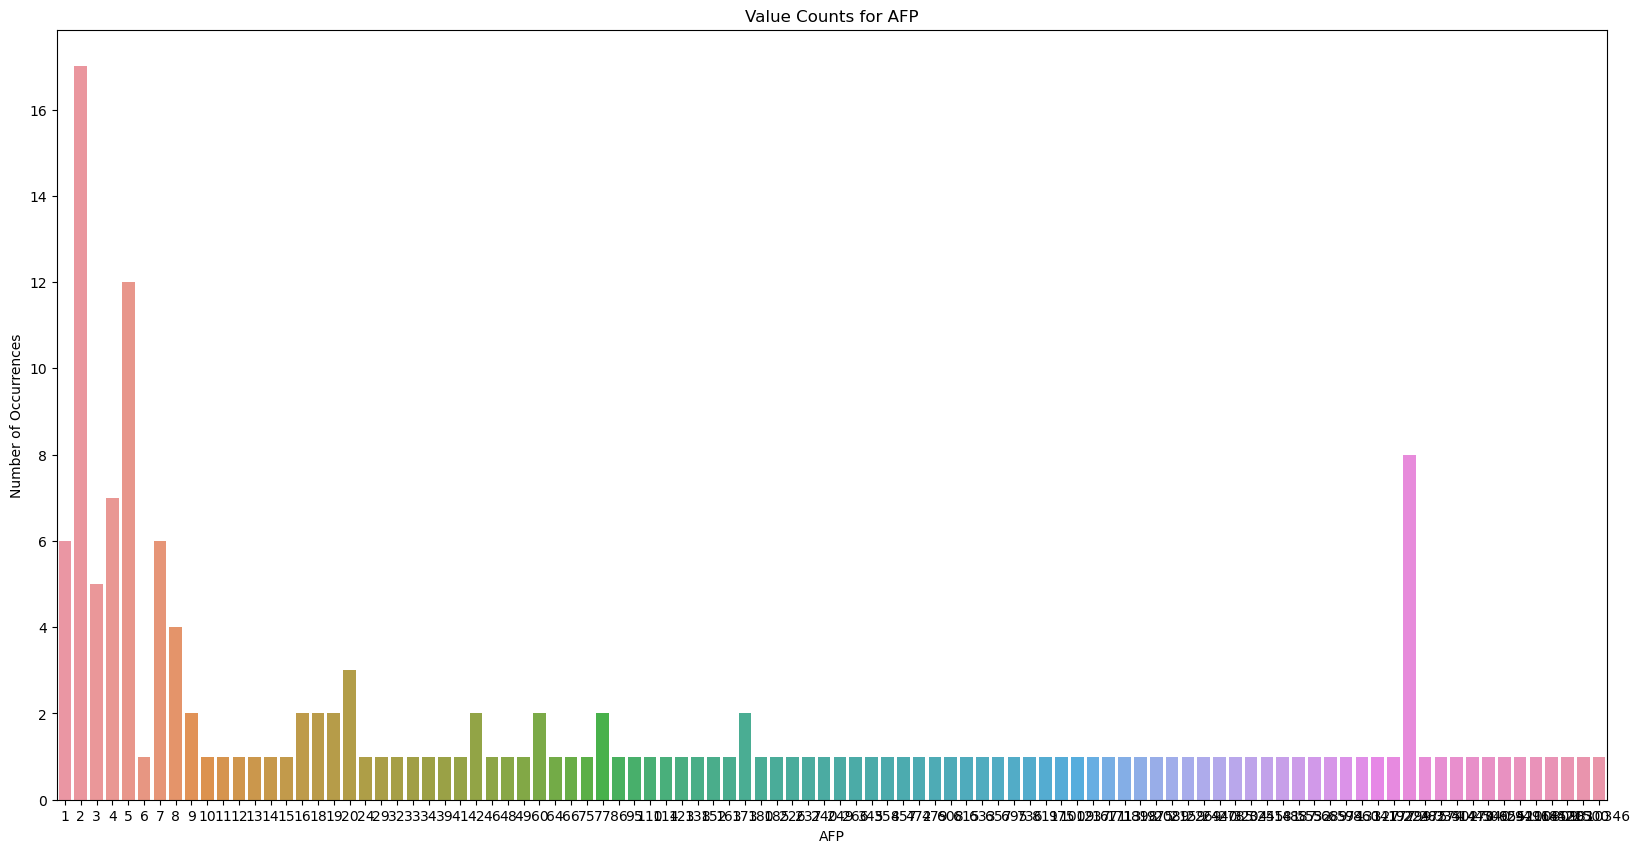

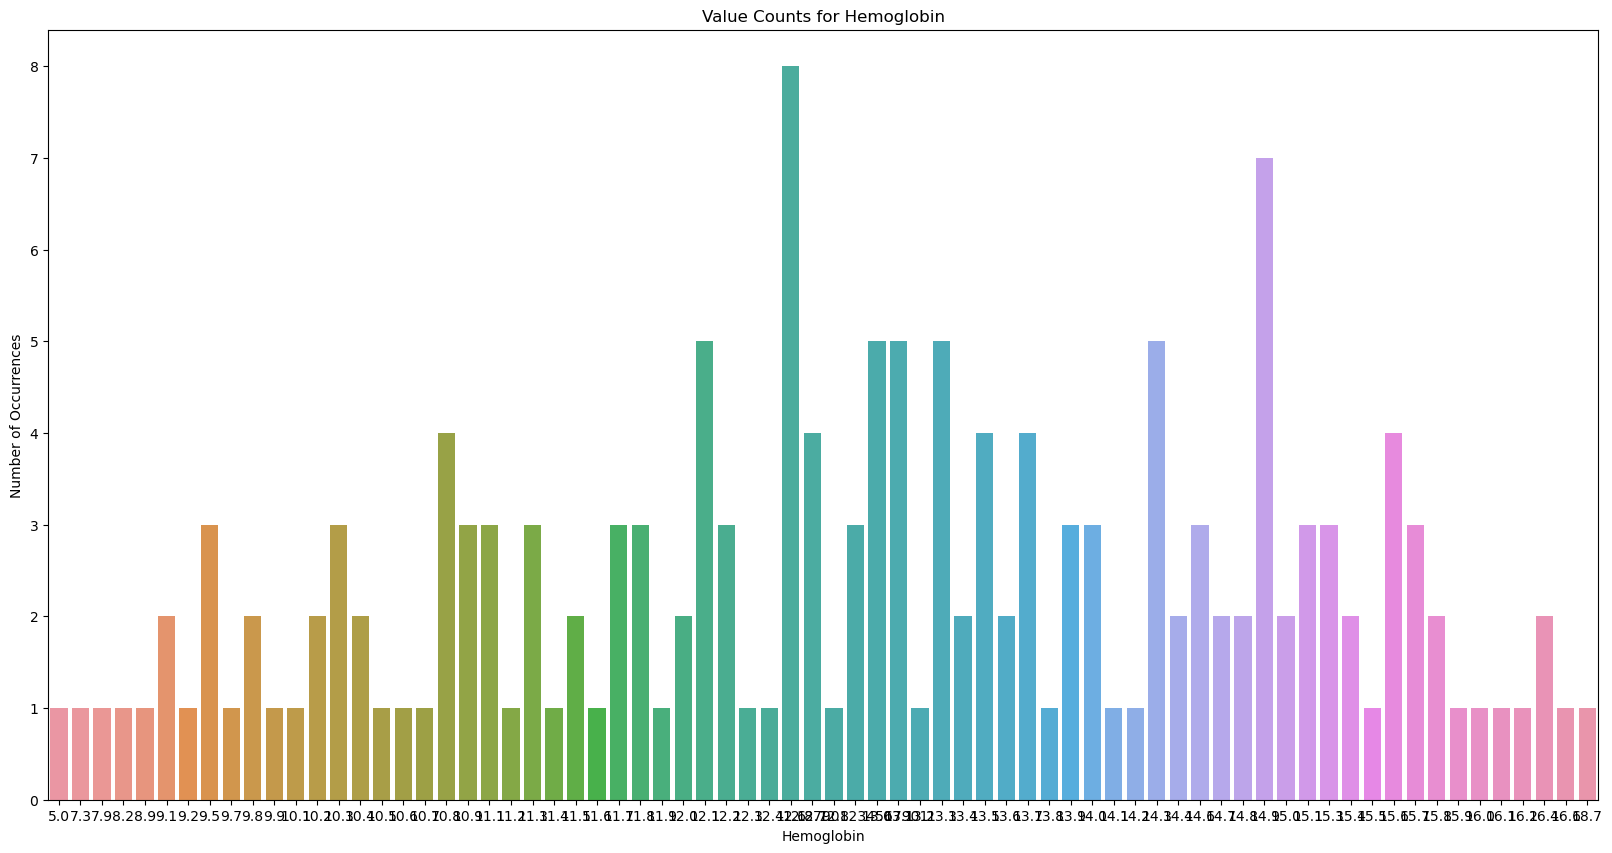

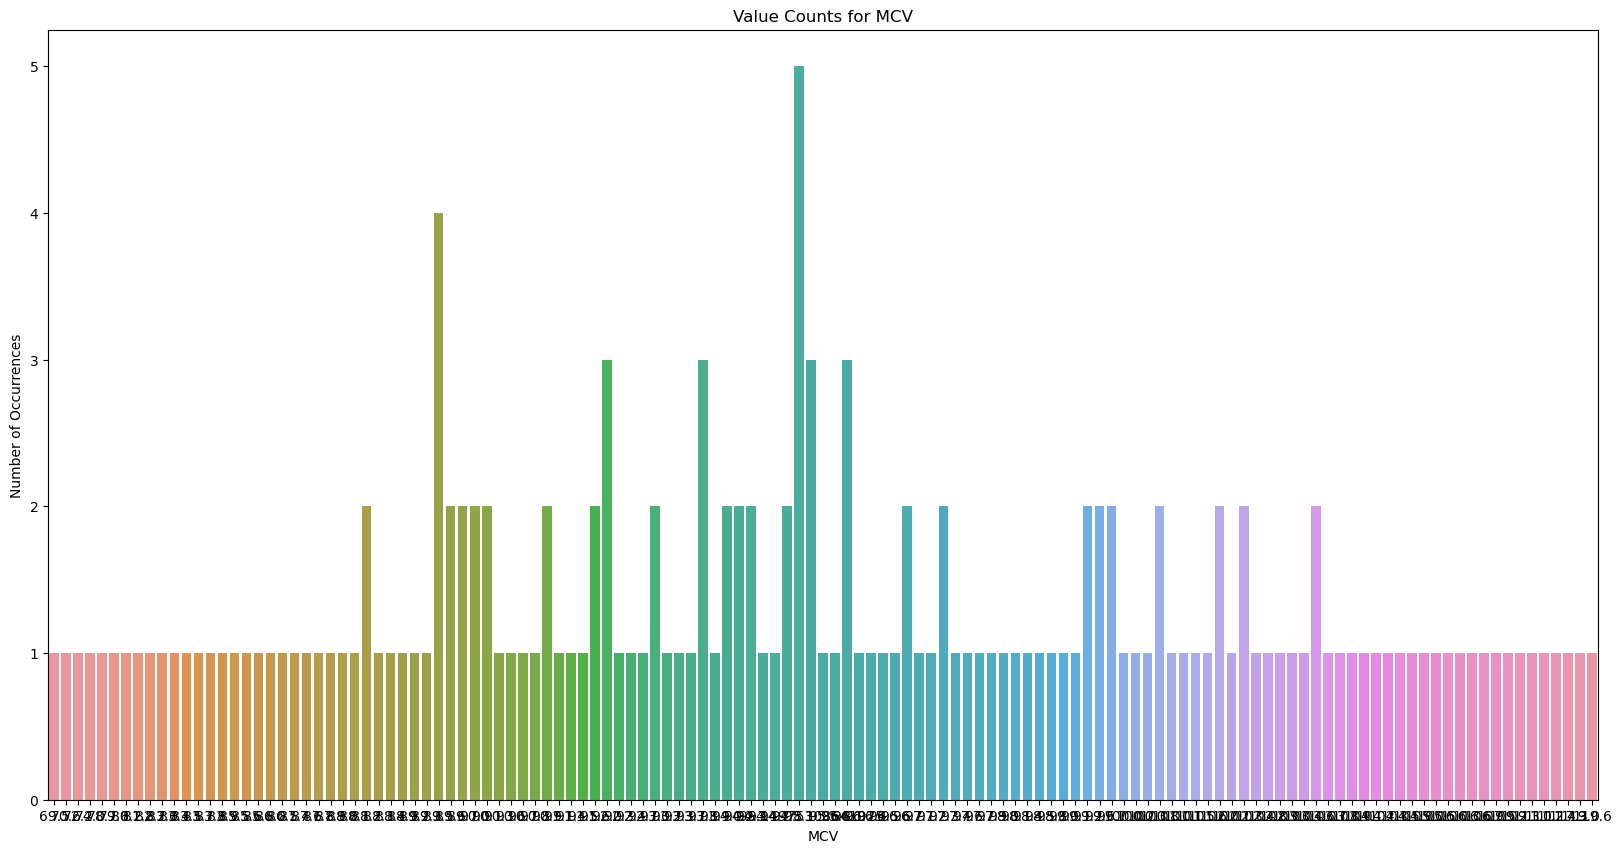

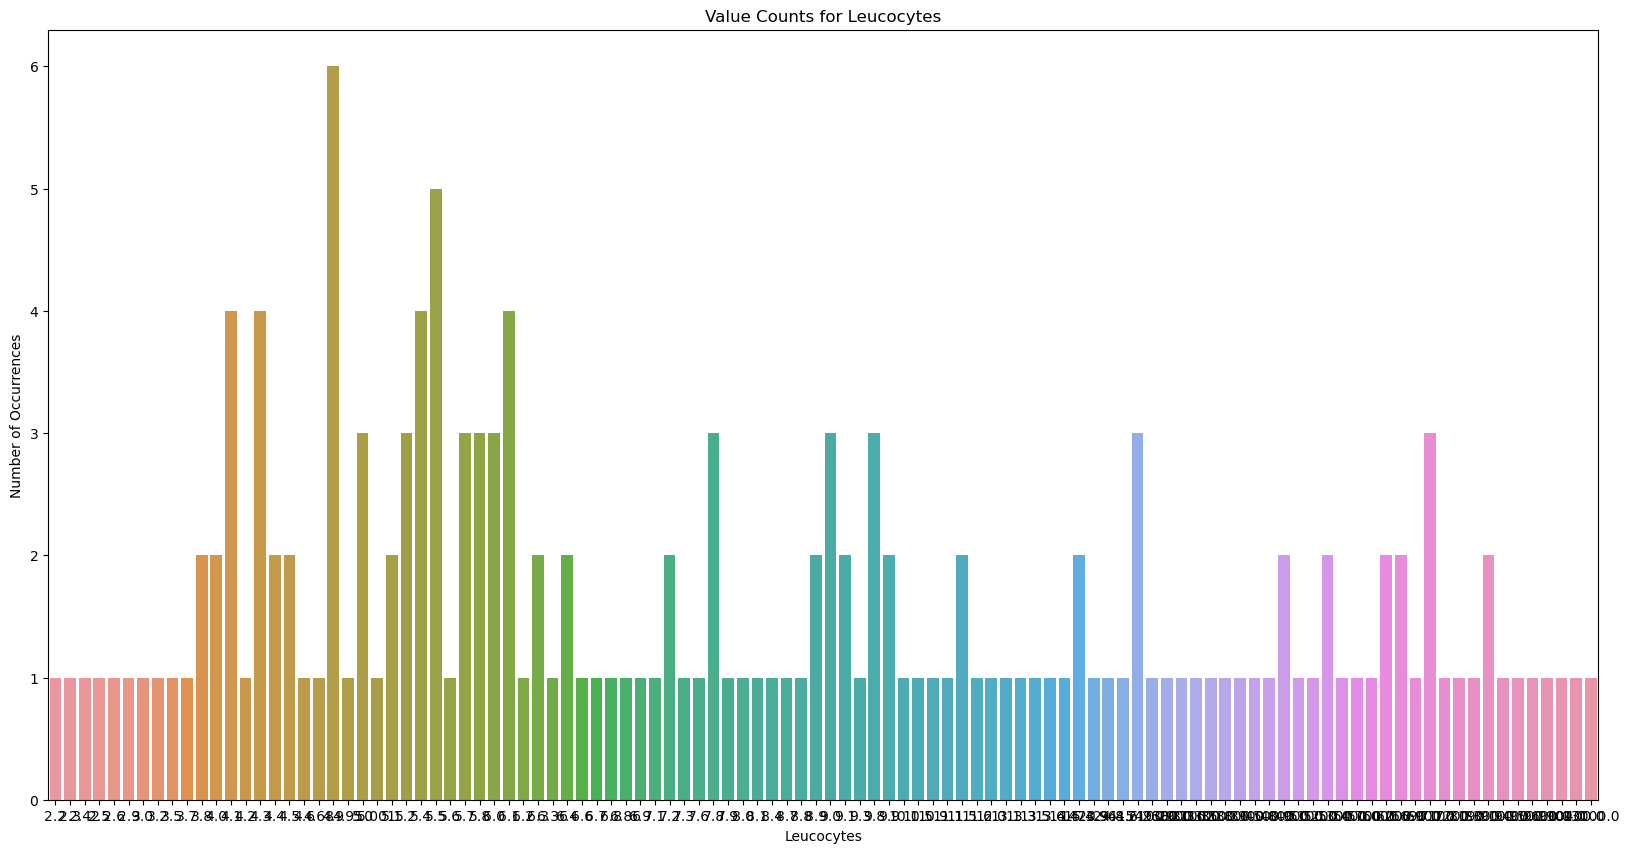

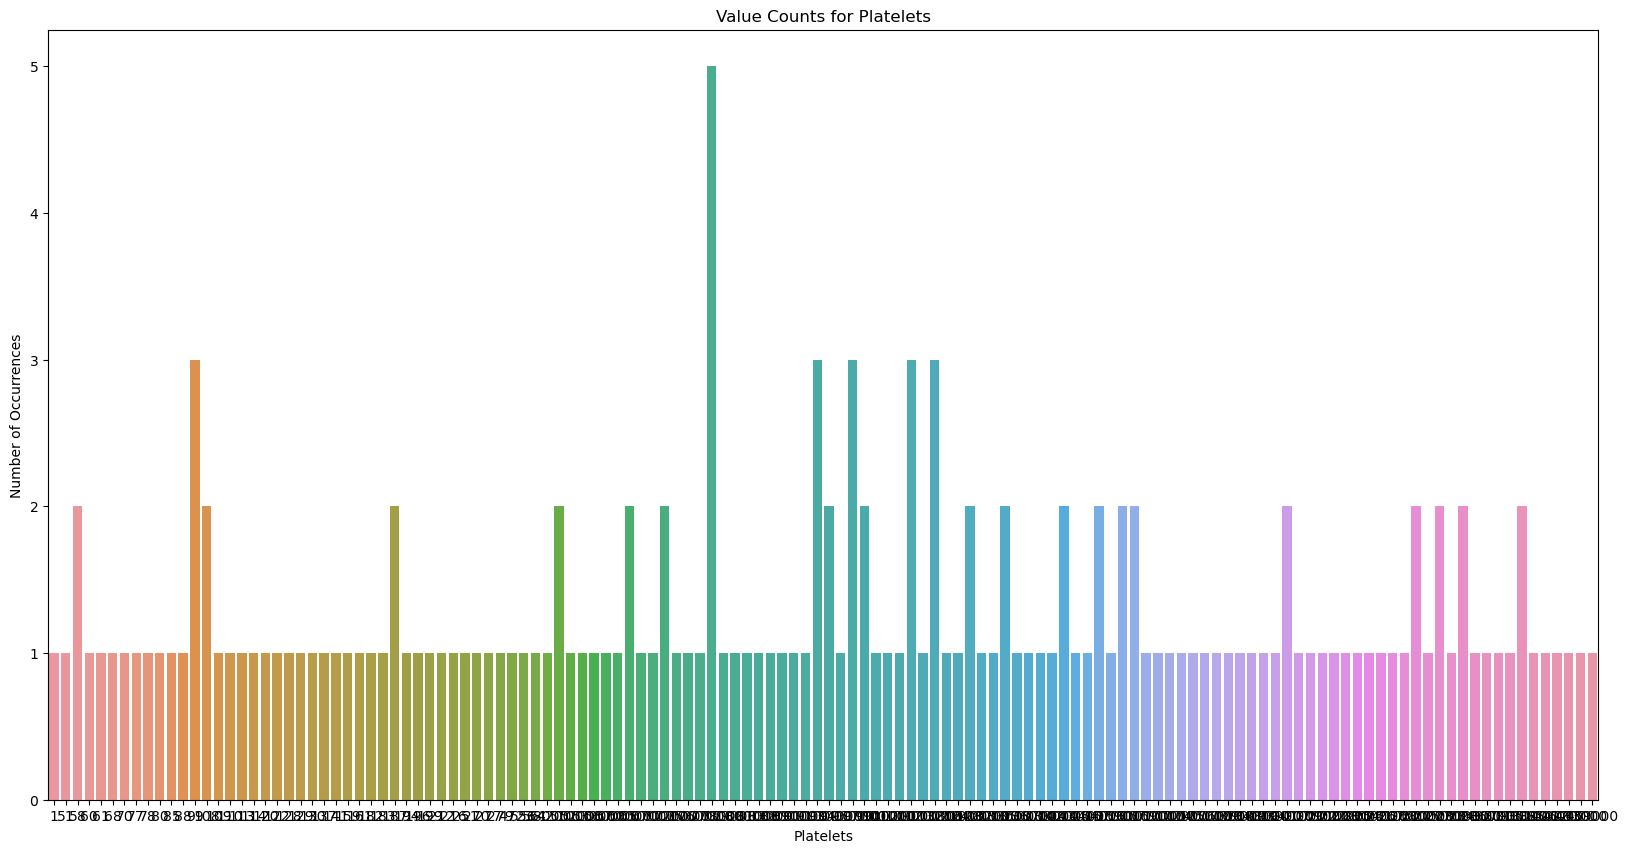

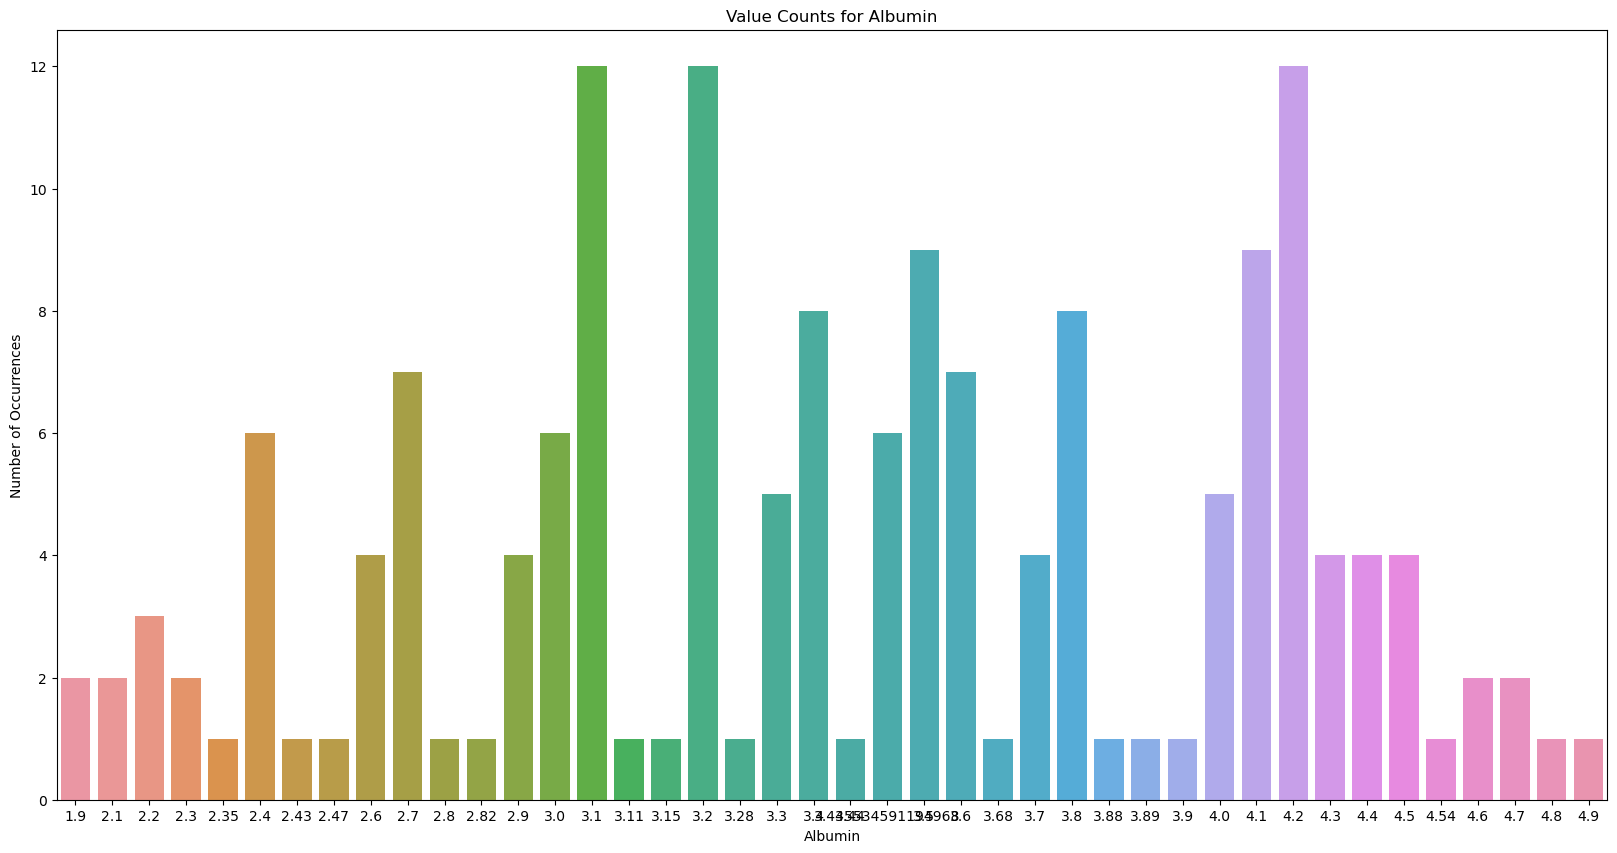

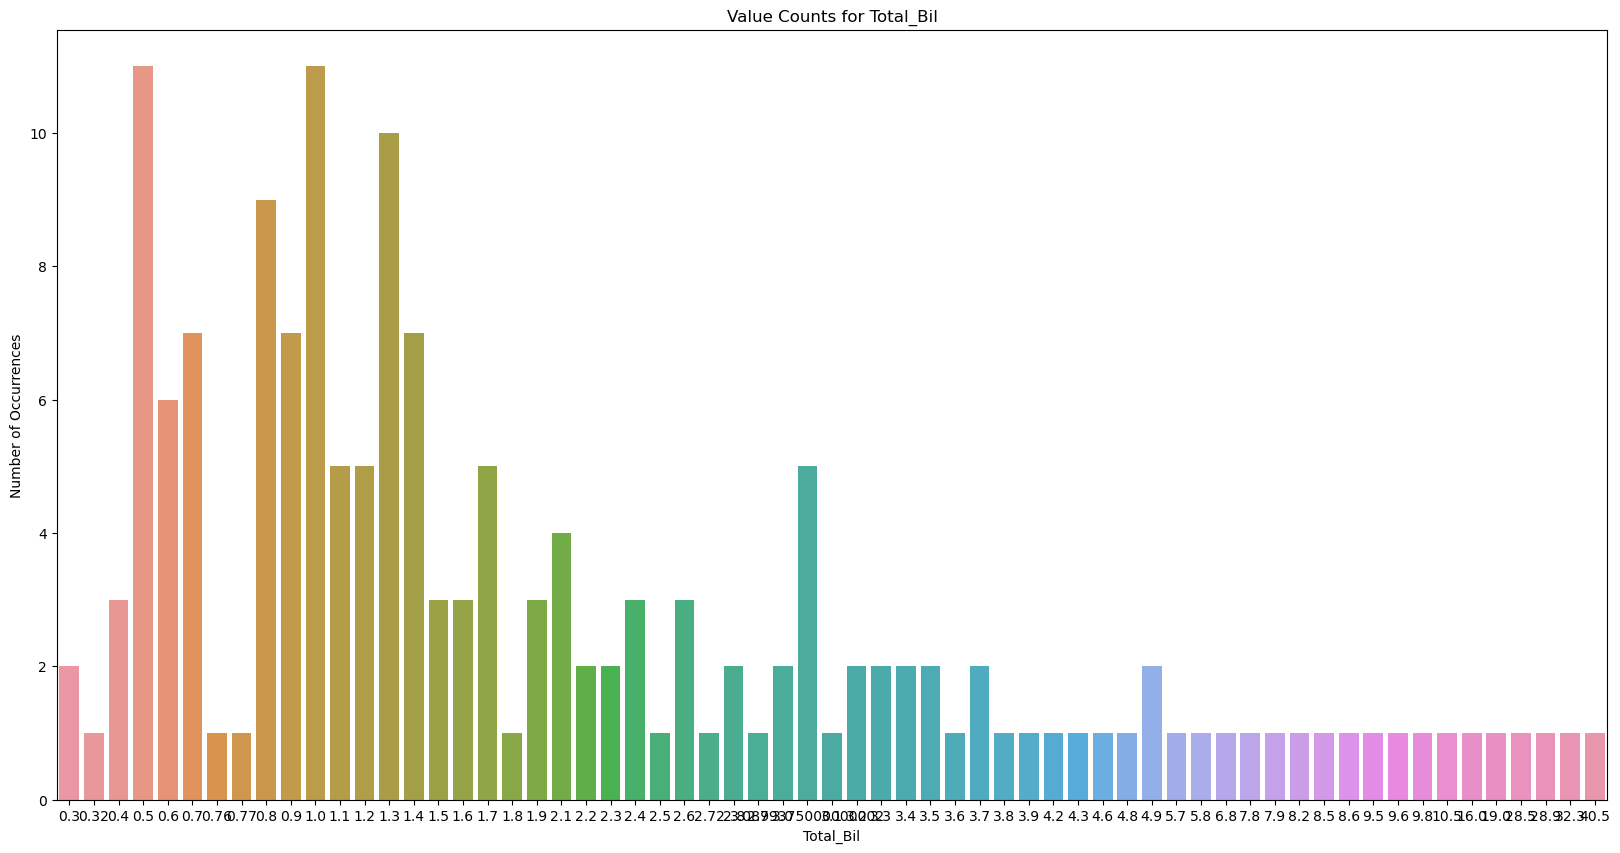

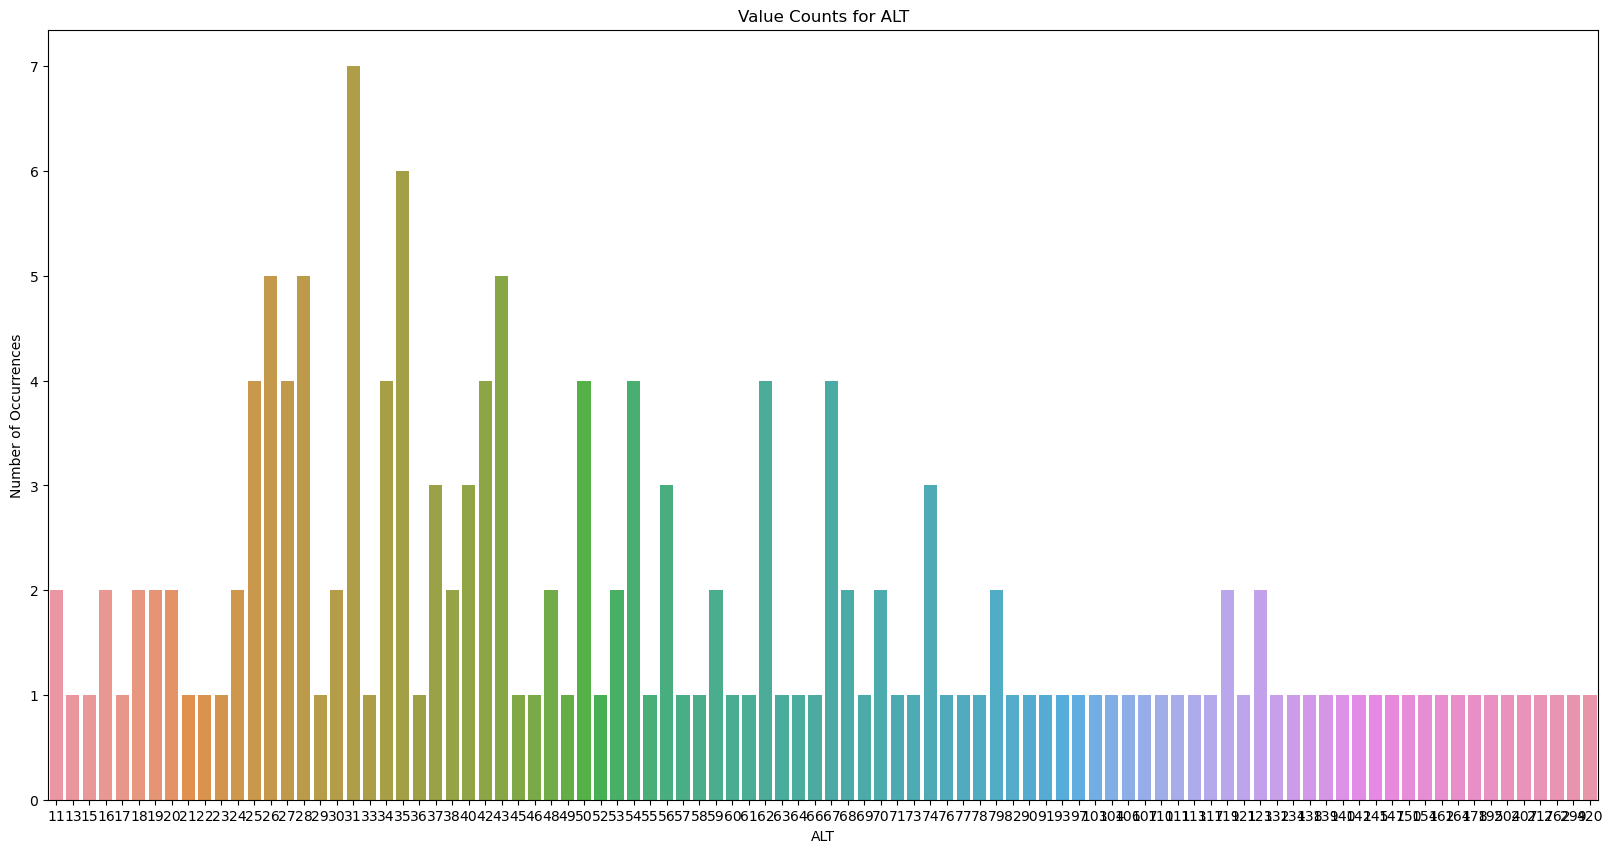

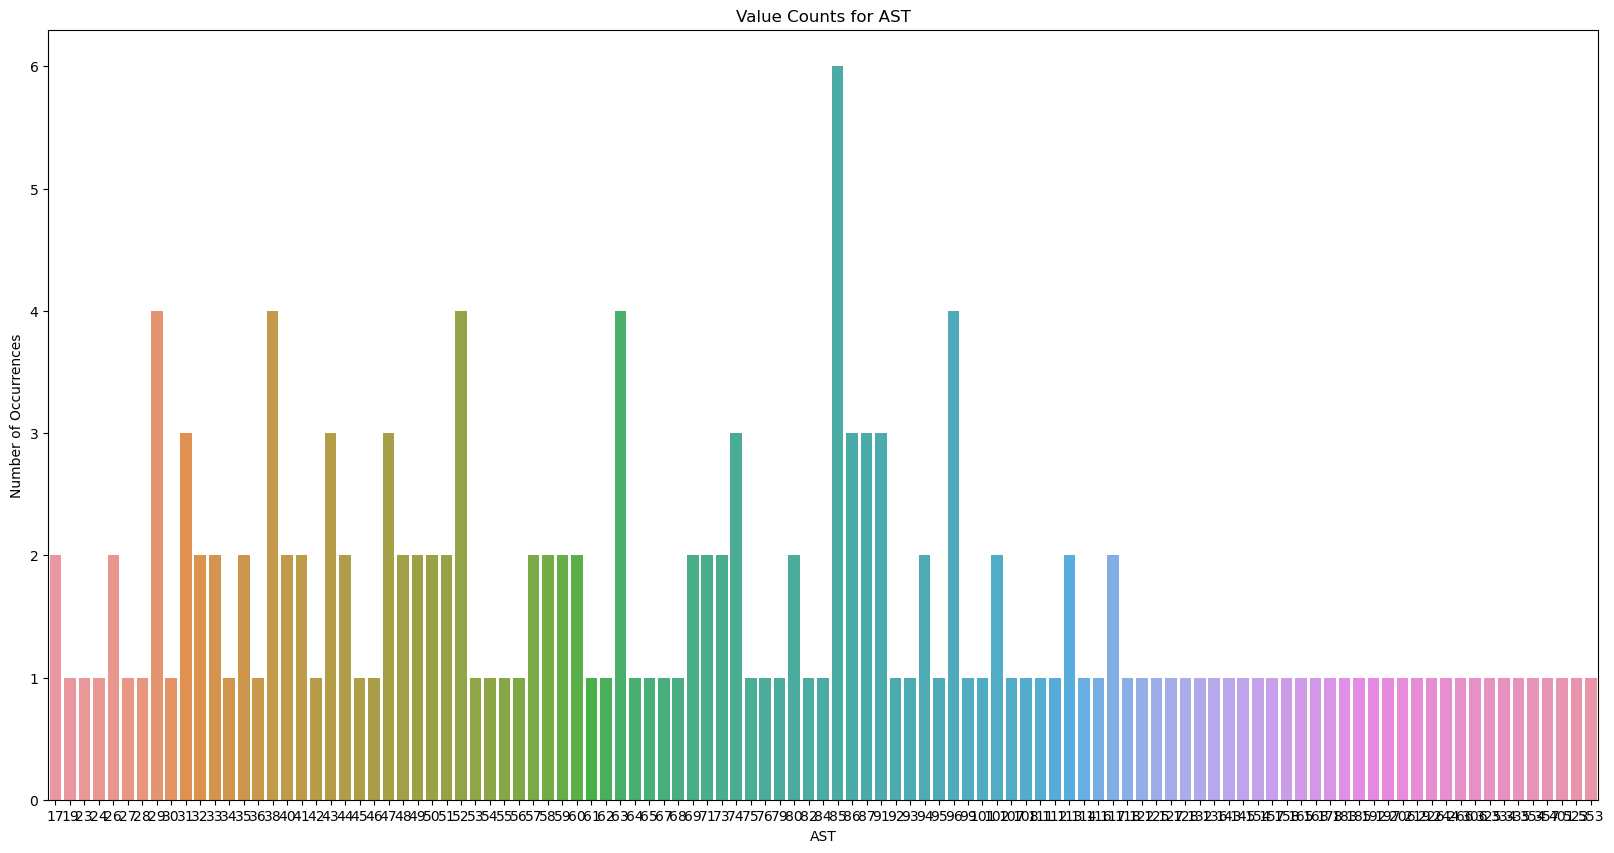

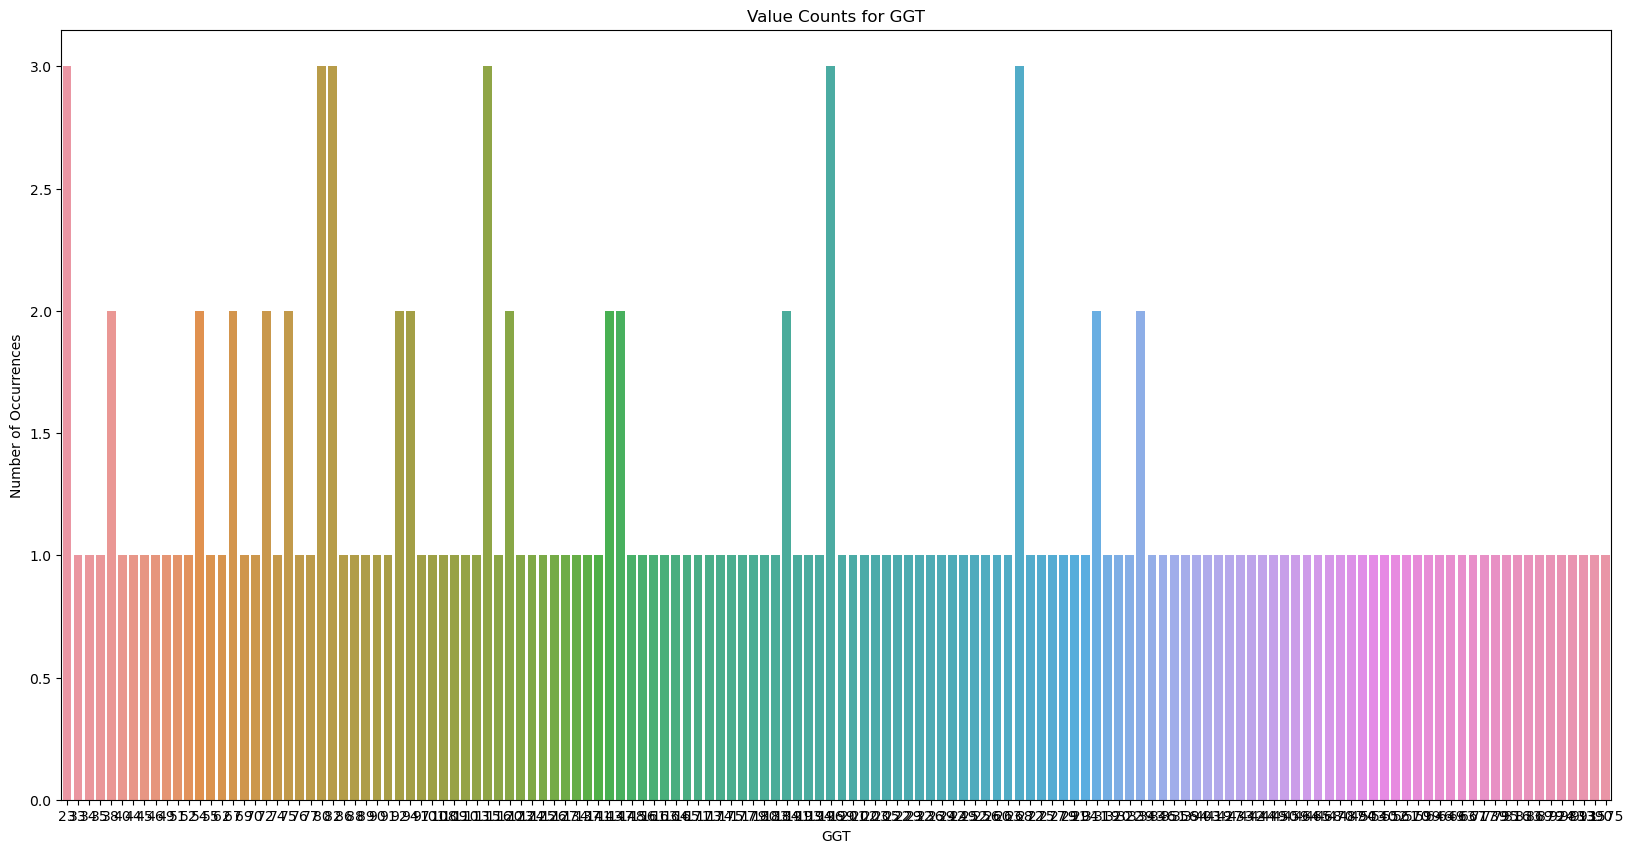

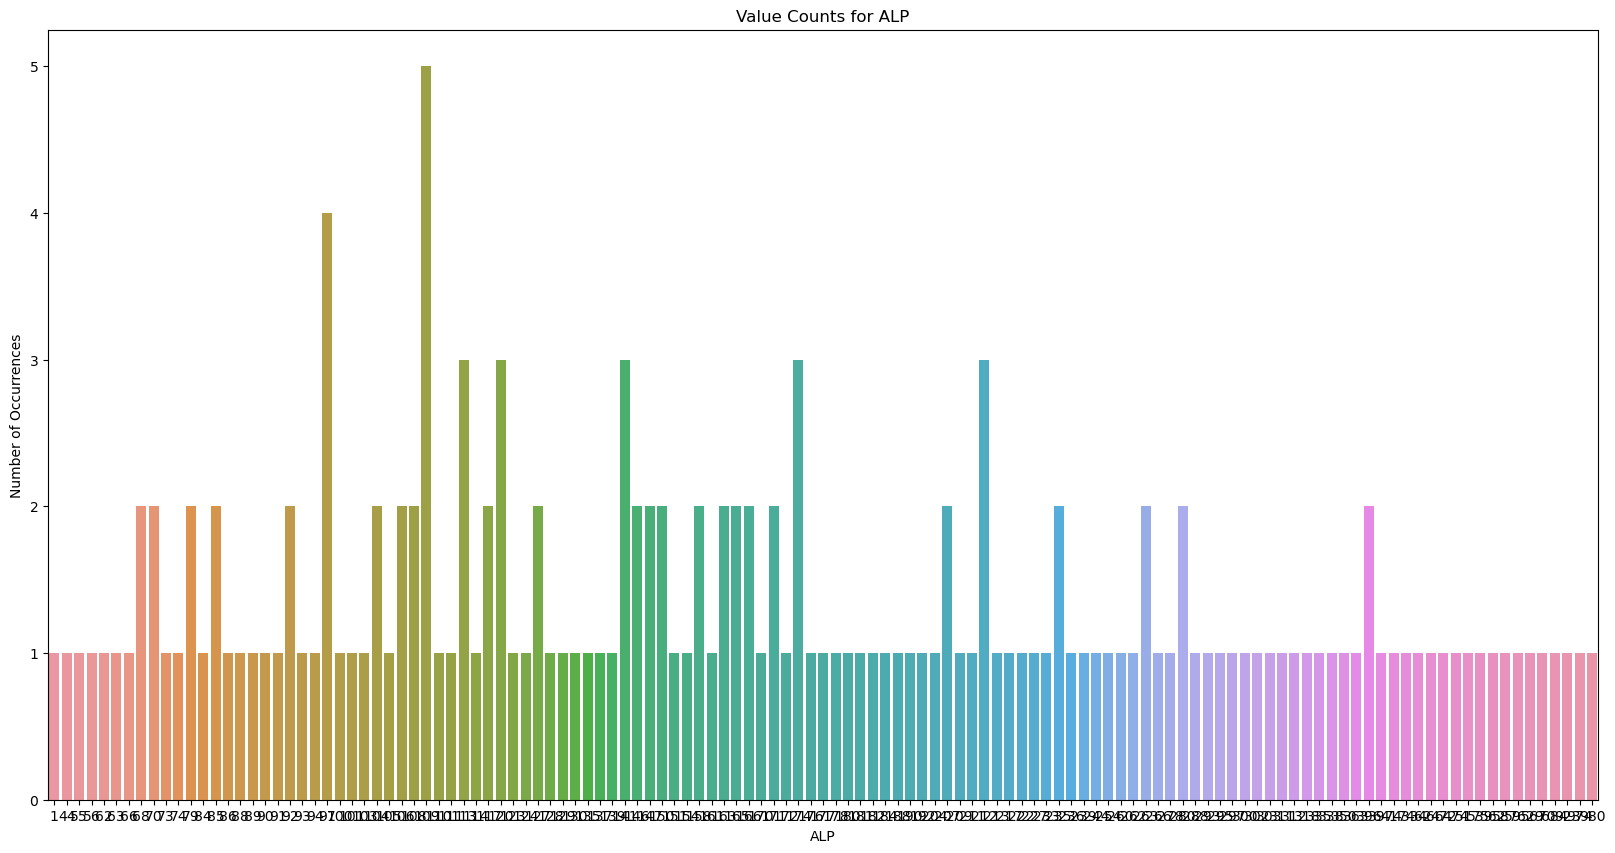

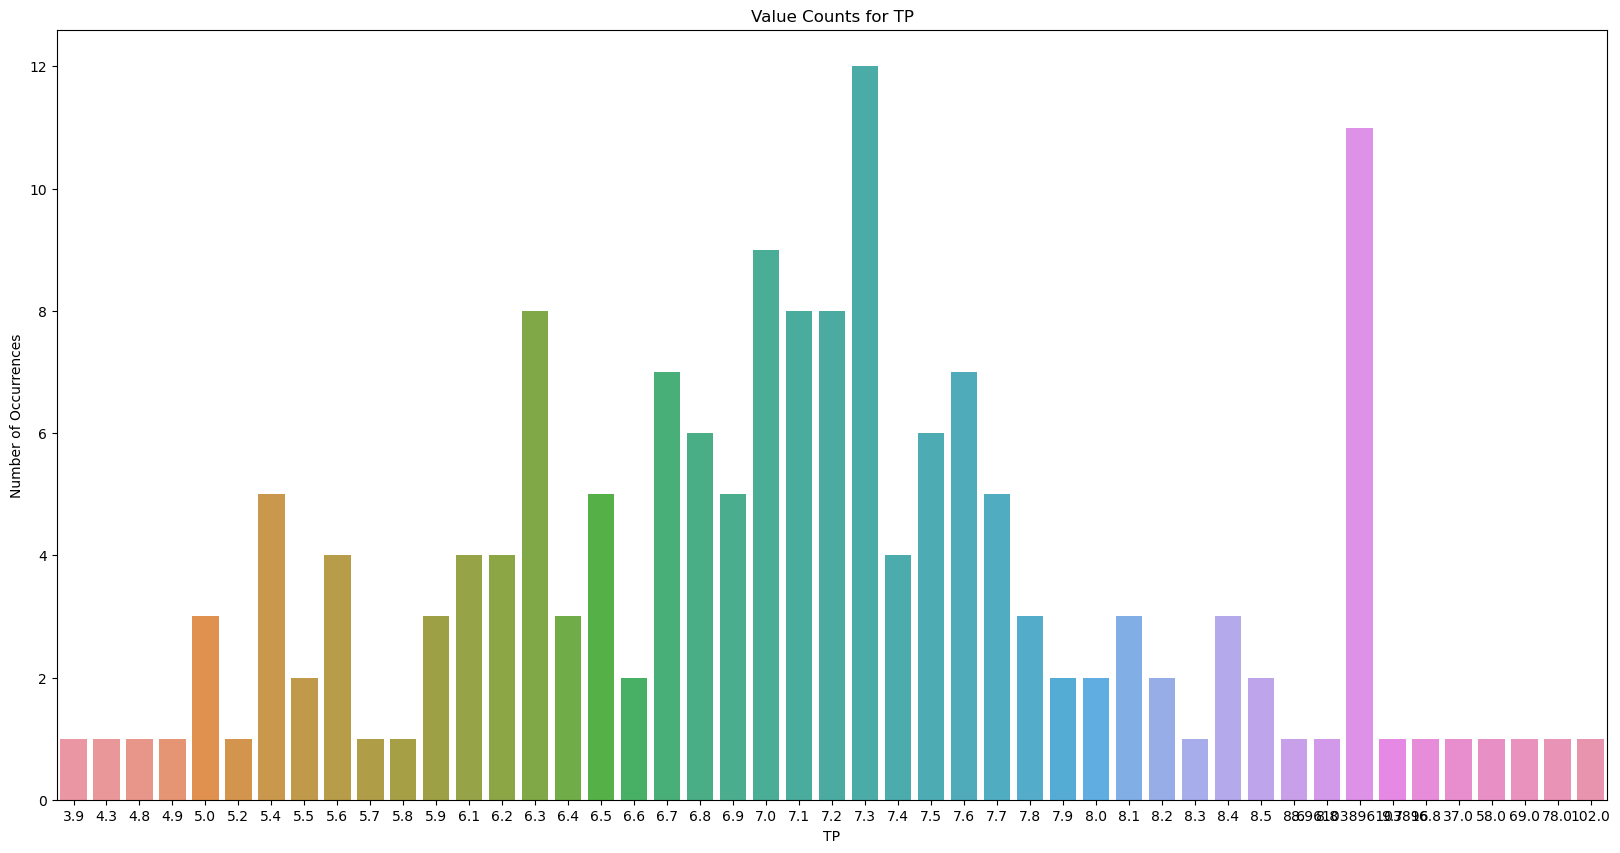

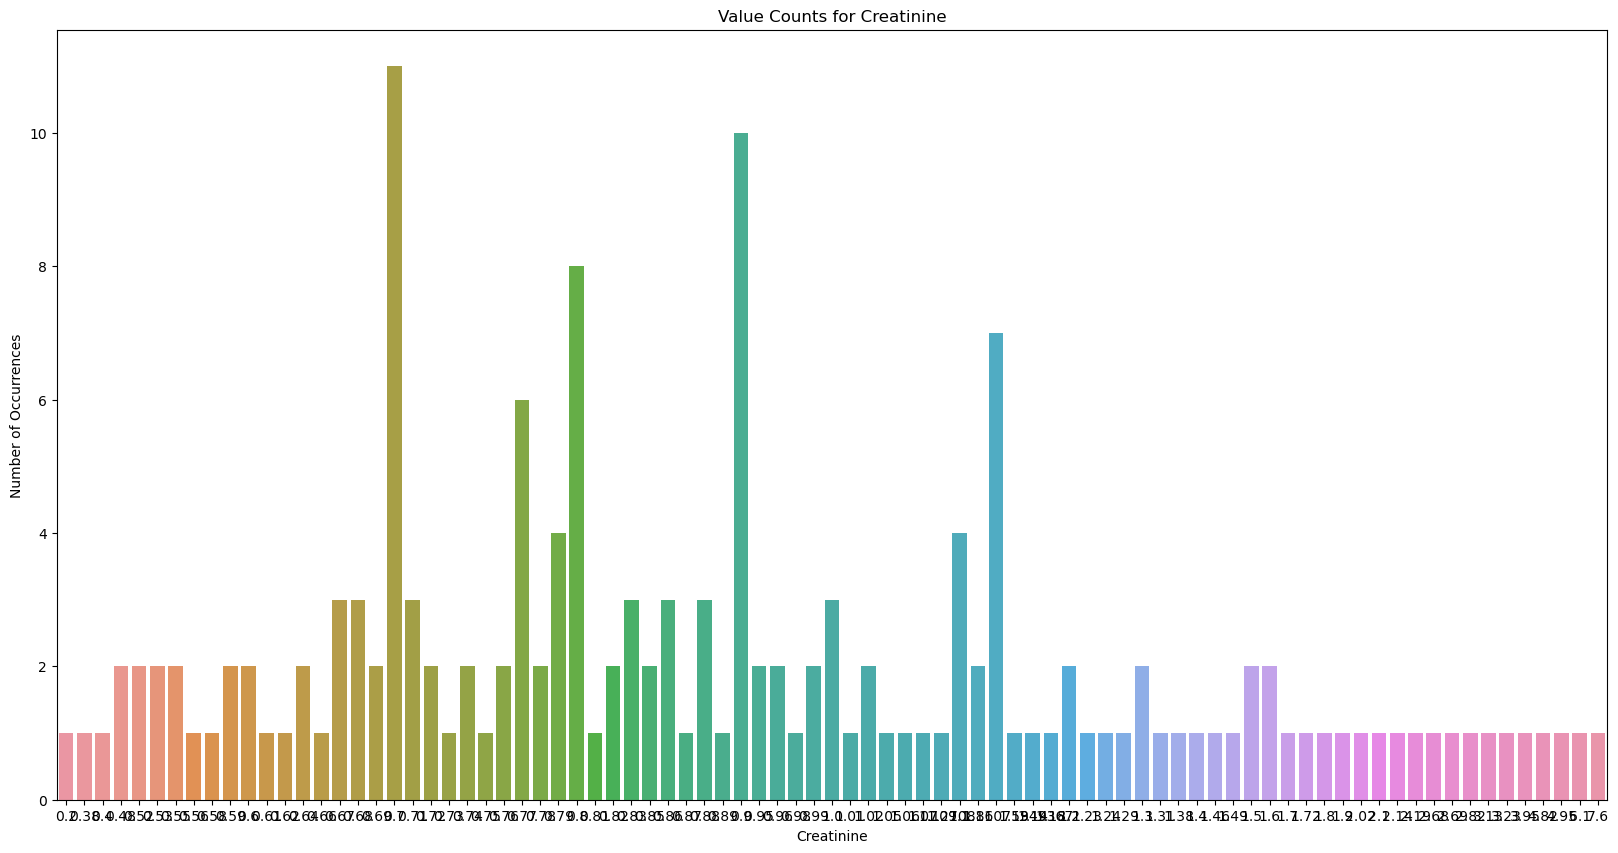

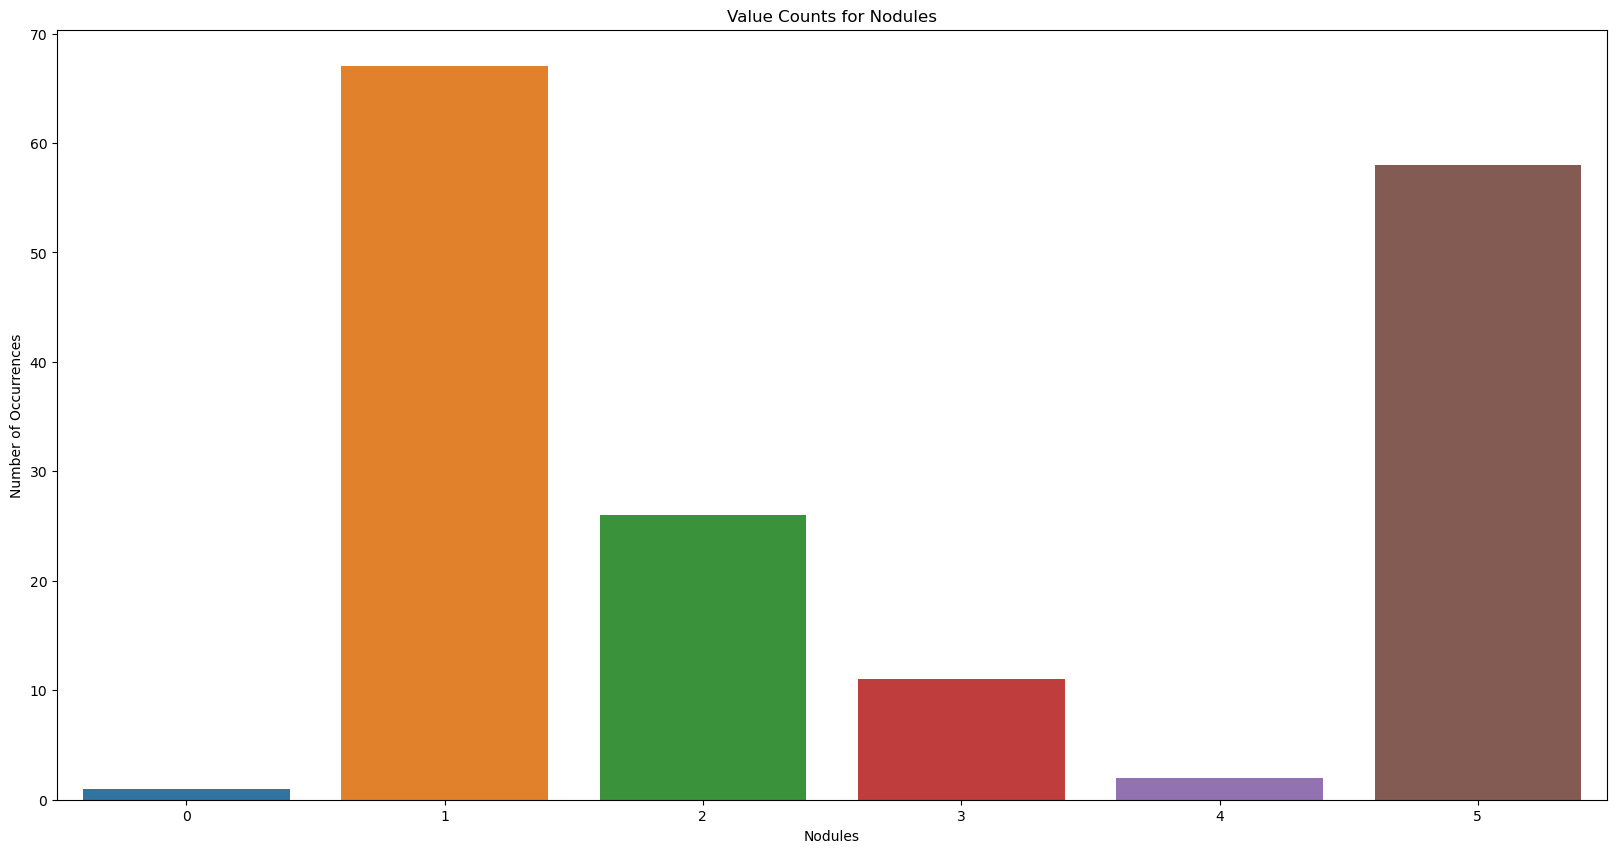

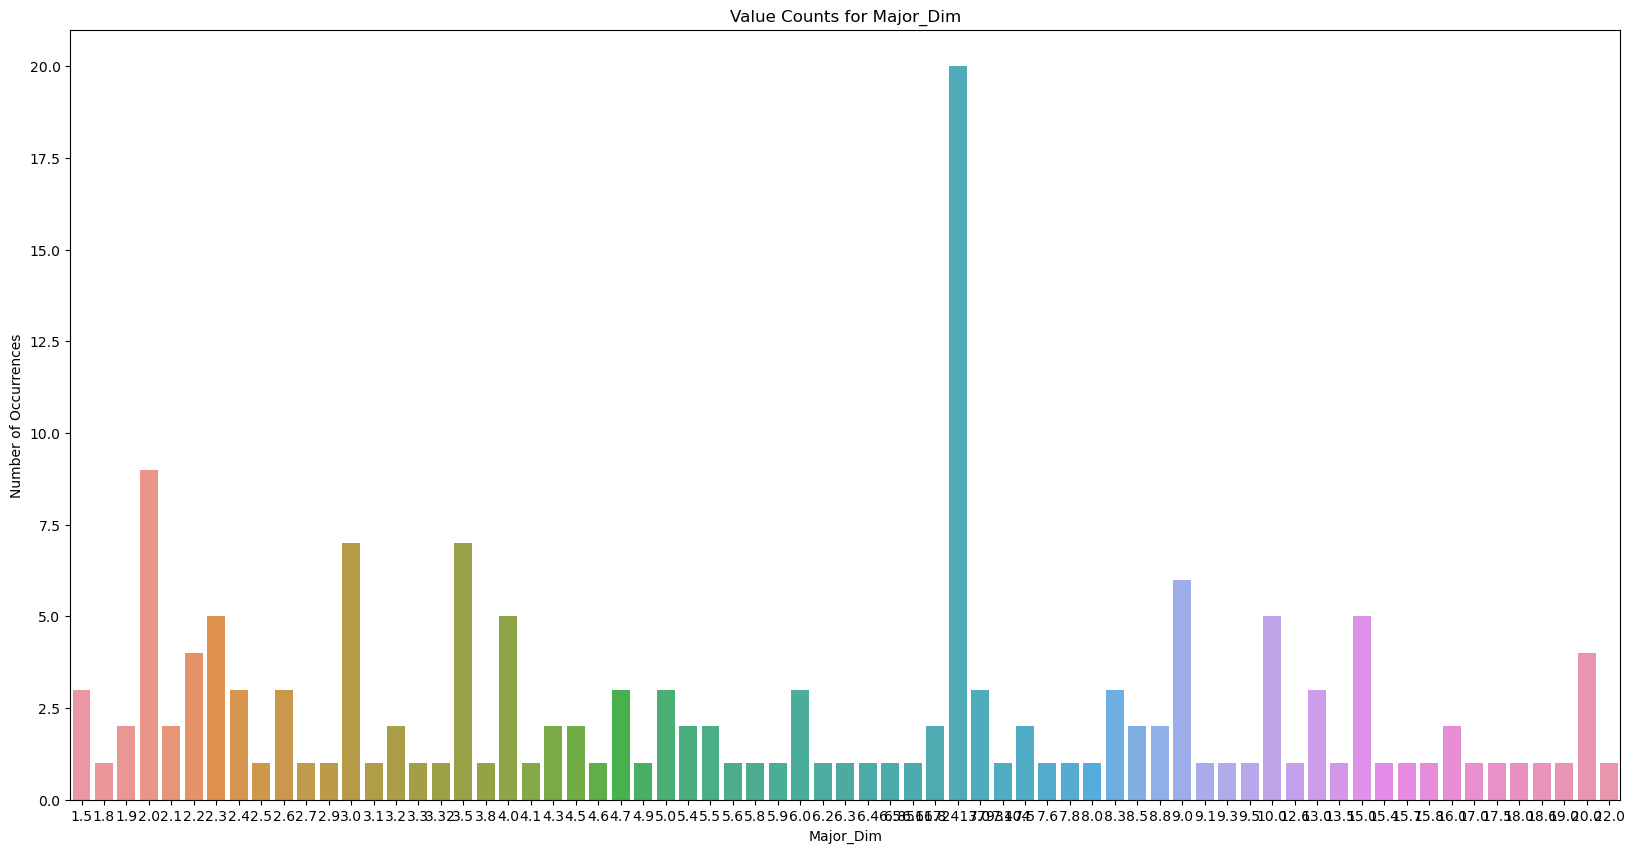

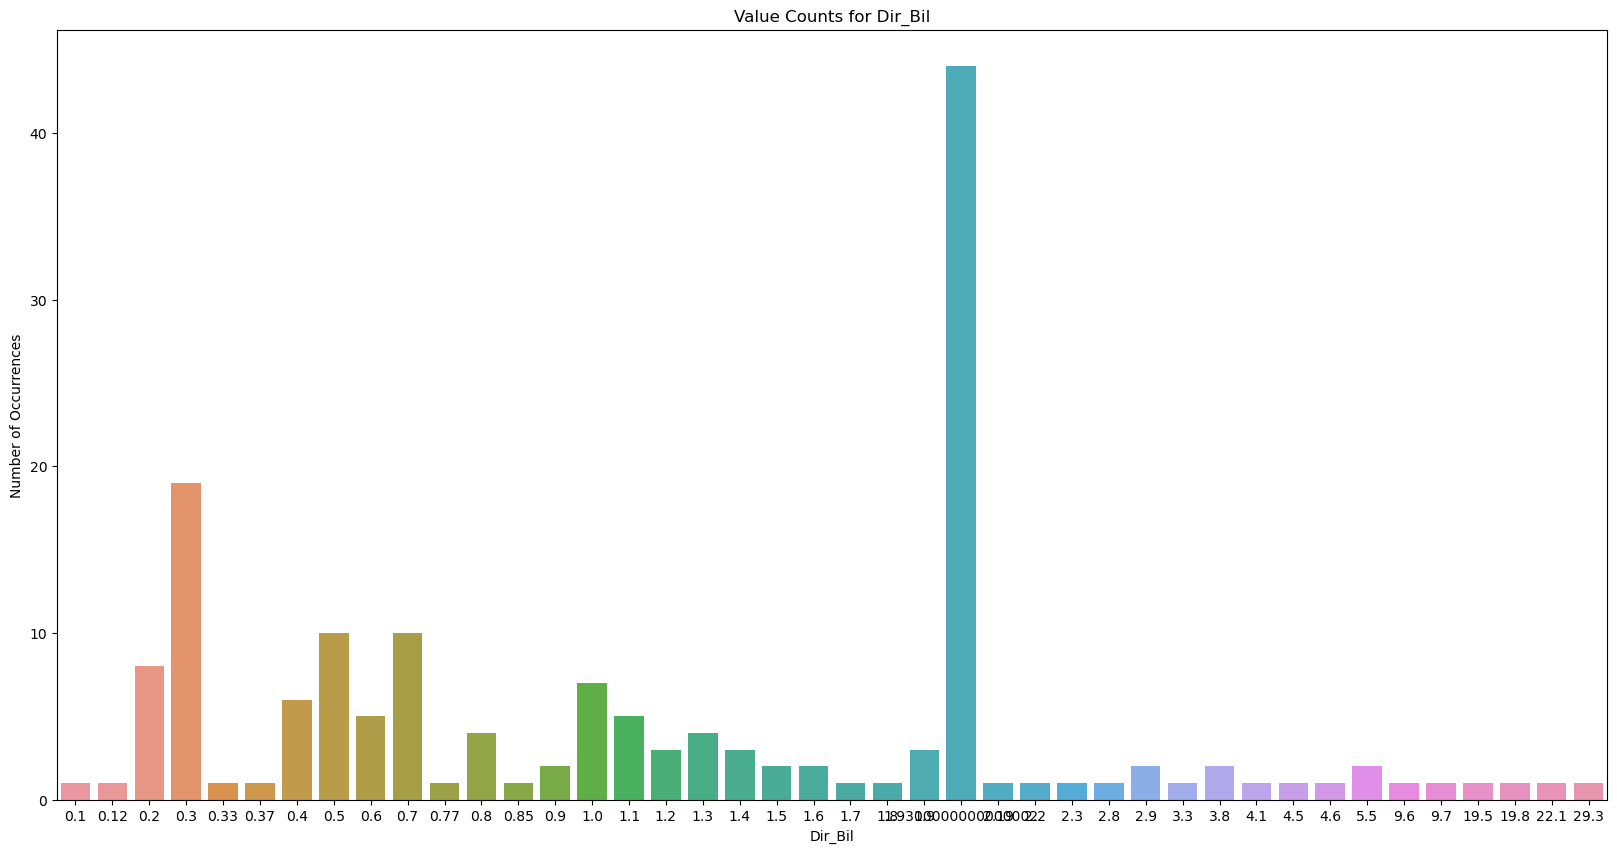

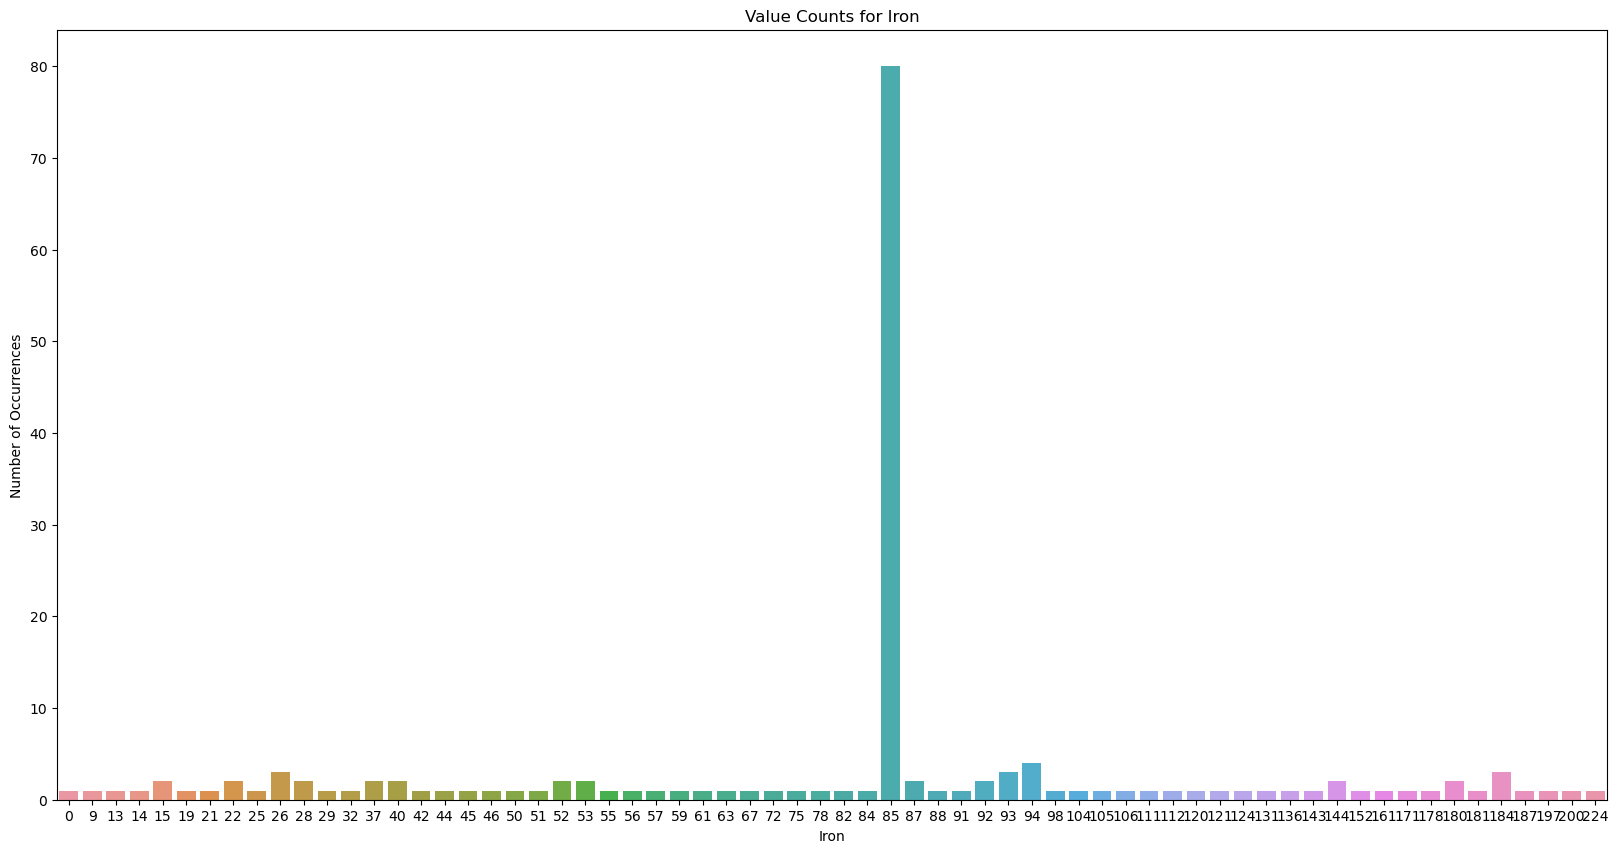

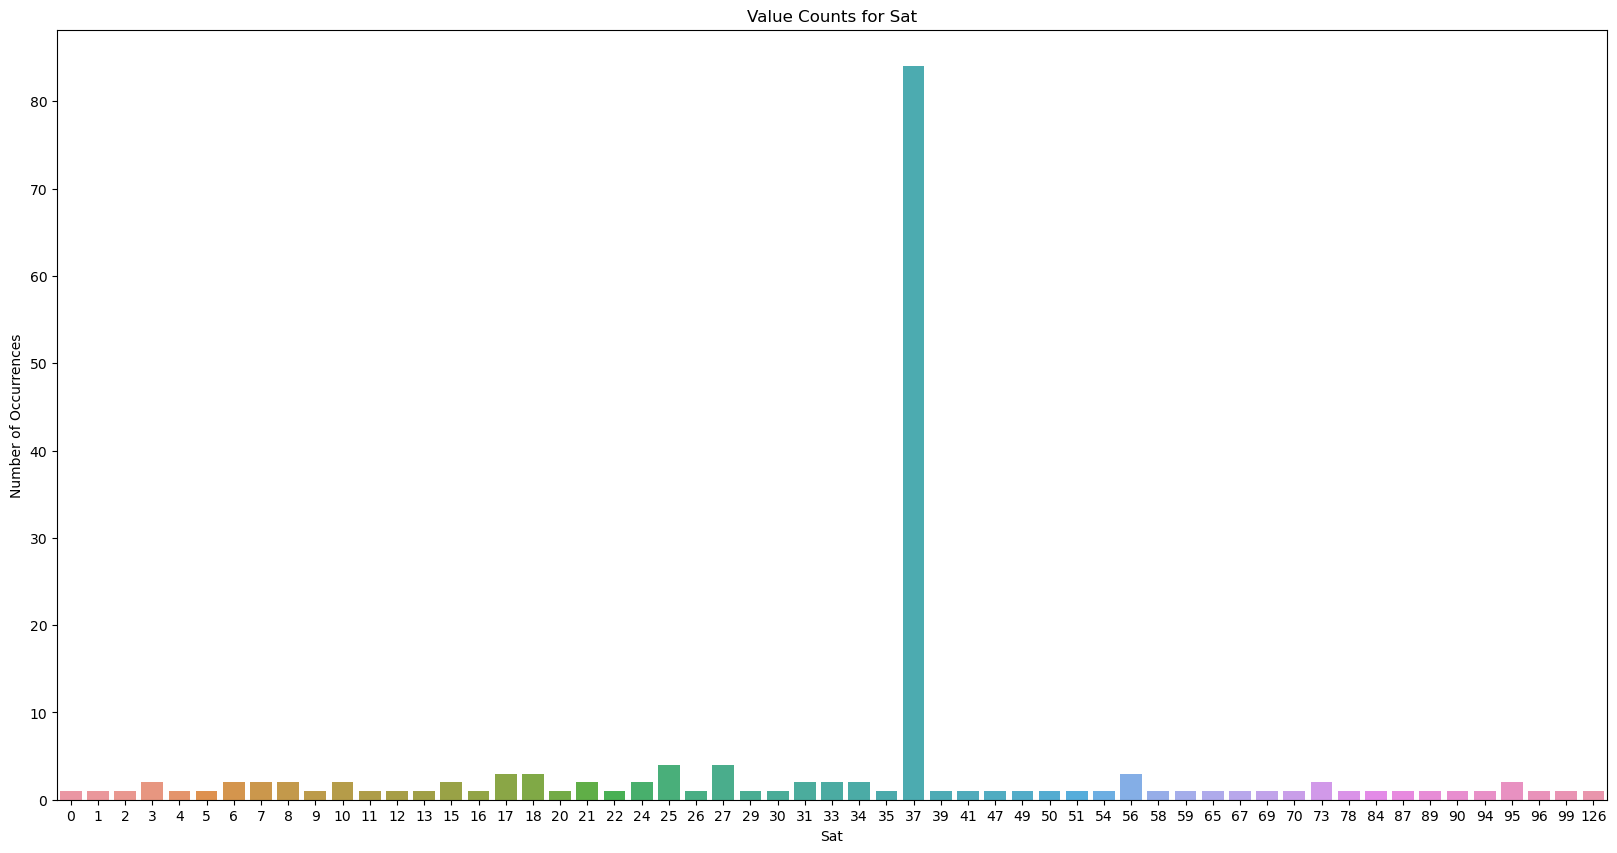

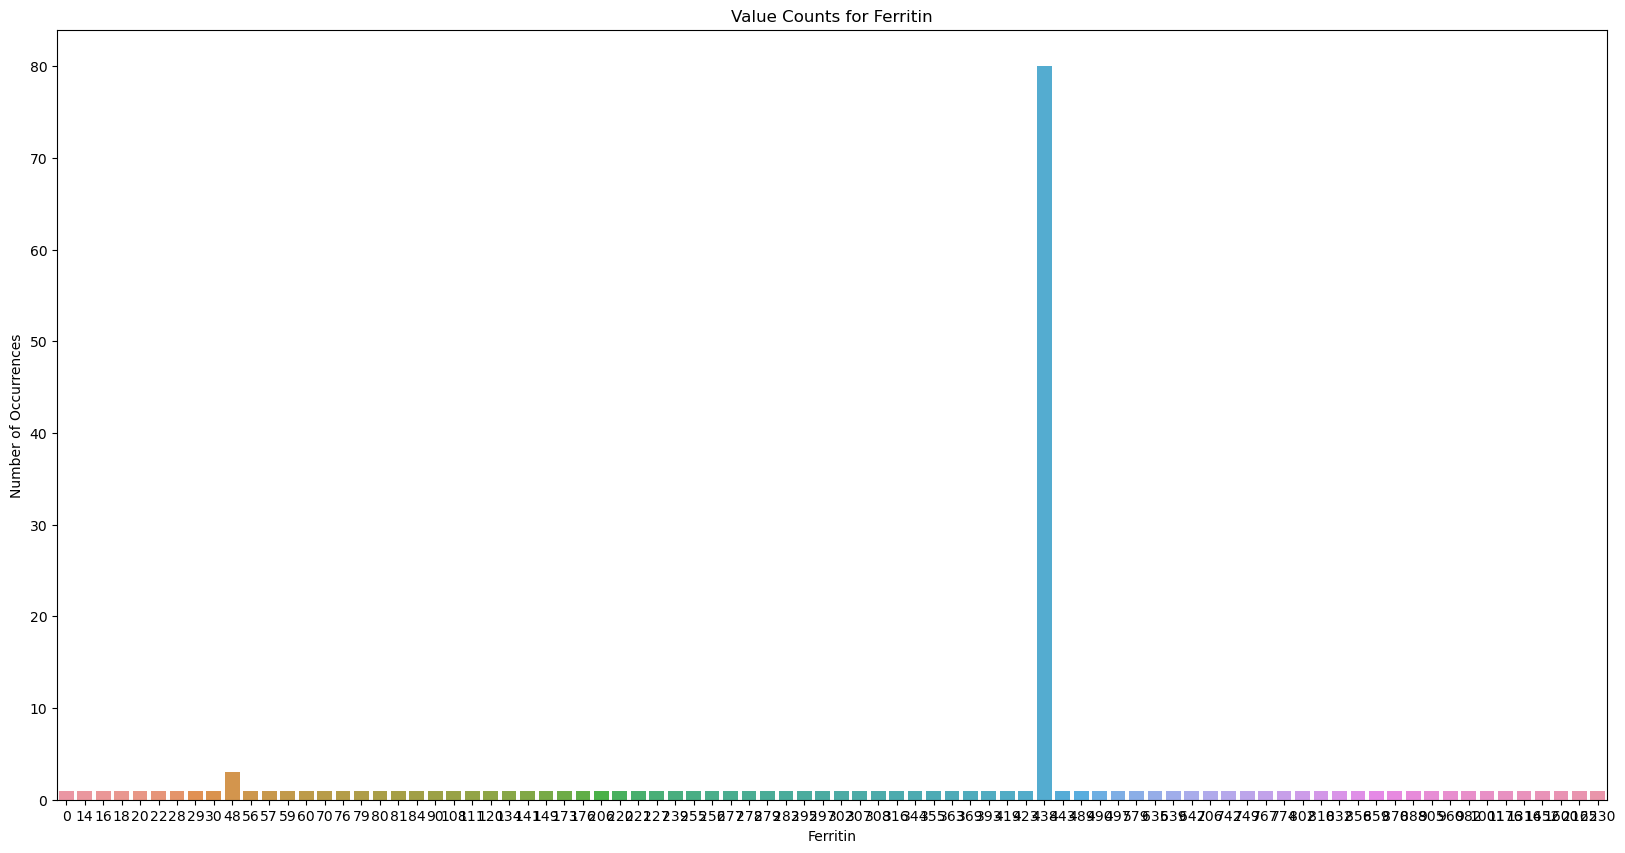

In [12]:
for column in nf_clean.columns:
    value_counts = nf_clean[column].value_counts().sort_index()

    # Plot the value counts
    plt.figure(figsize=(20, 10))
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f"Value Counts for {column}")
    plt.xlabel(column)
    plt.ylabel("Number of Occurrences")
    plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Grams_day'}>,
        <Axes: title={'center': 'Packs_year'}>,
        <Axes: title={'center': 'INR'}>, <Axes: title={'center': 'AFP'}>],
       [<Axes: title={'center': 'Hemoglobin'}>,
        <Axes: title={'center': 'MCV'}>,
        <Axes: title={'center': 'Leucocytes'}>,
        <Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': 'Albumin'}>],
       [<Axes: title={'center': 'Total_Bil'}>,
        <Axes: title={'center': 'ALT'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'GGT'}>, <Axes: title={'center': 'ALP'}>],
       [<Axes: title={'center': 'TP'}>,
        <Axes: title={'center': 'Creatinine'}>,
        <Axes: title={'center': 'Nodules'}>,
        <Axes: title={'center': 'Major_Dim'}>,
        <Axes: title={'center': 'Dir_Bil'}>],
       [<Axes: title={'center': 'Iron'}>,
        <Axes: title={'center': 'Sat'}>,
        <Axes: title={'center': 'Ferritin'}>, <Axes: >

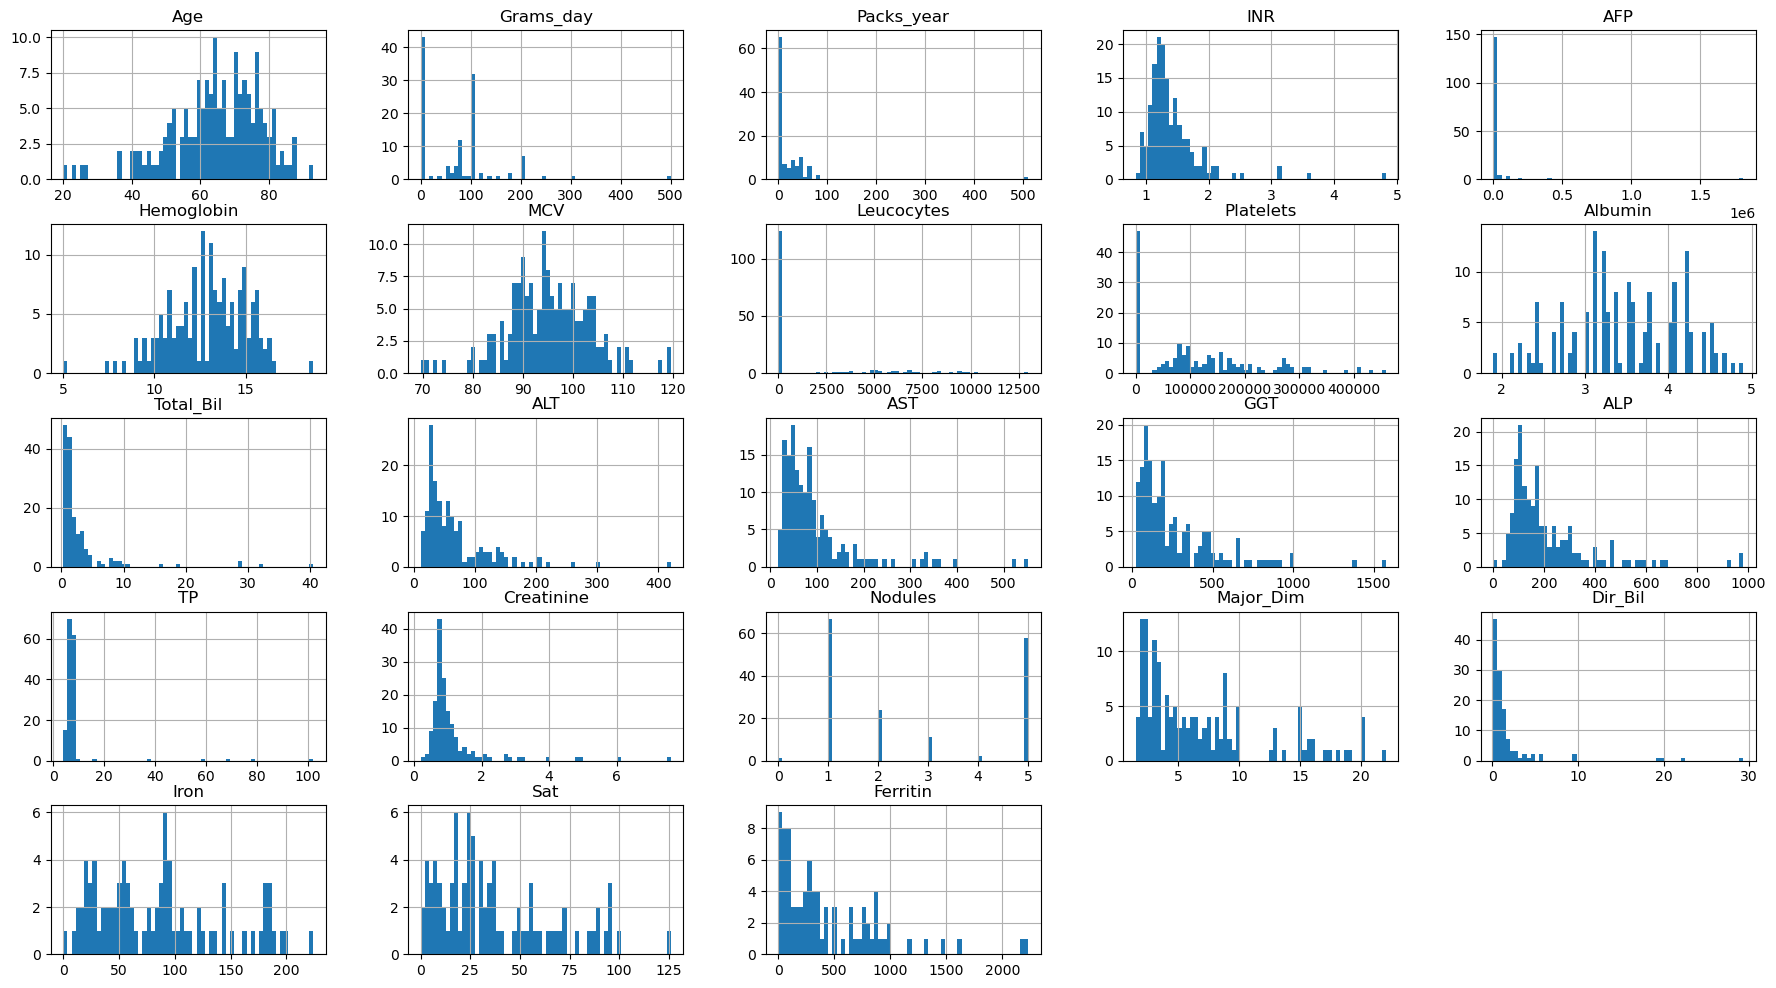

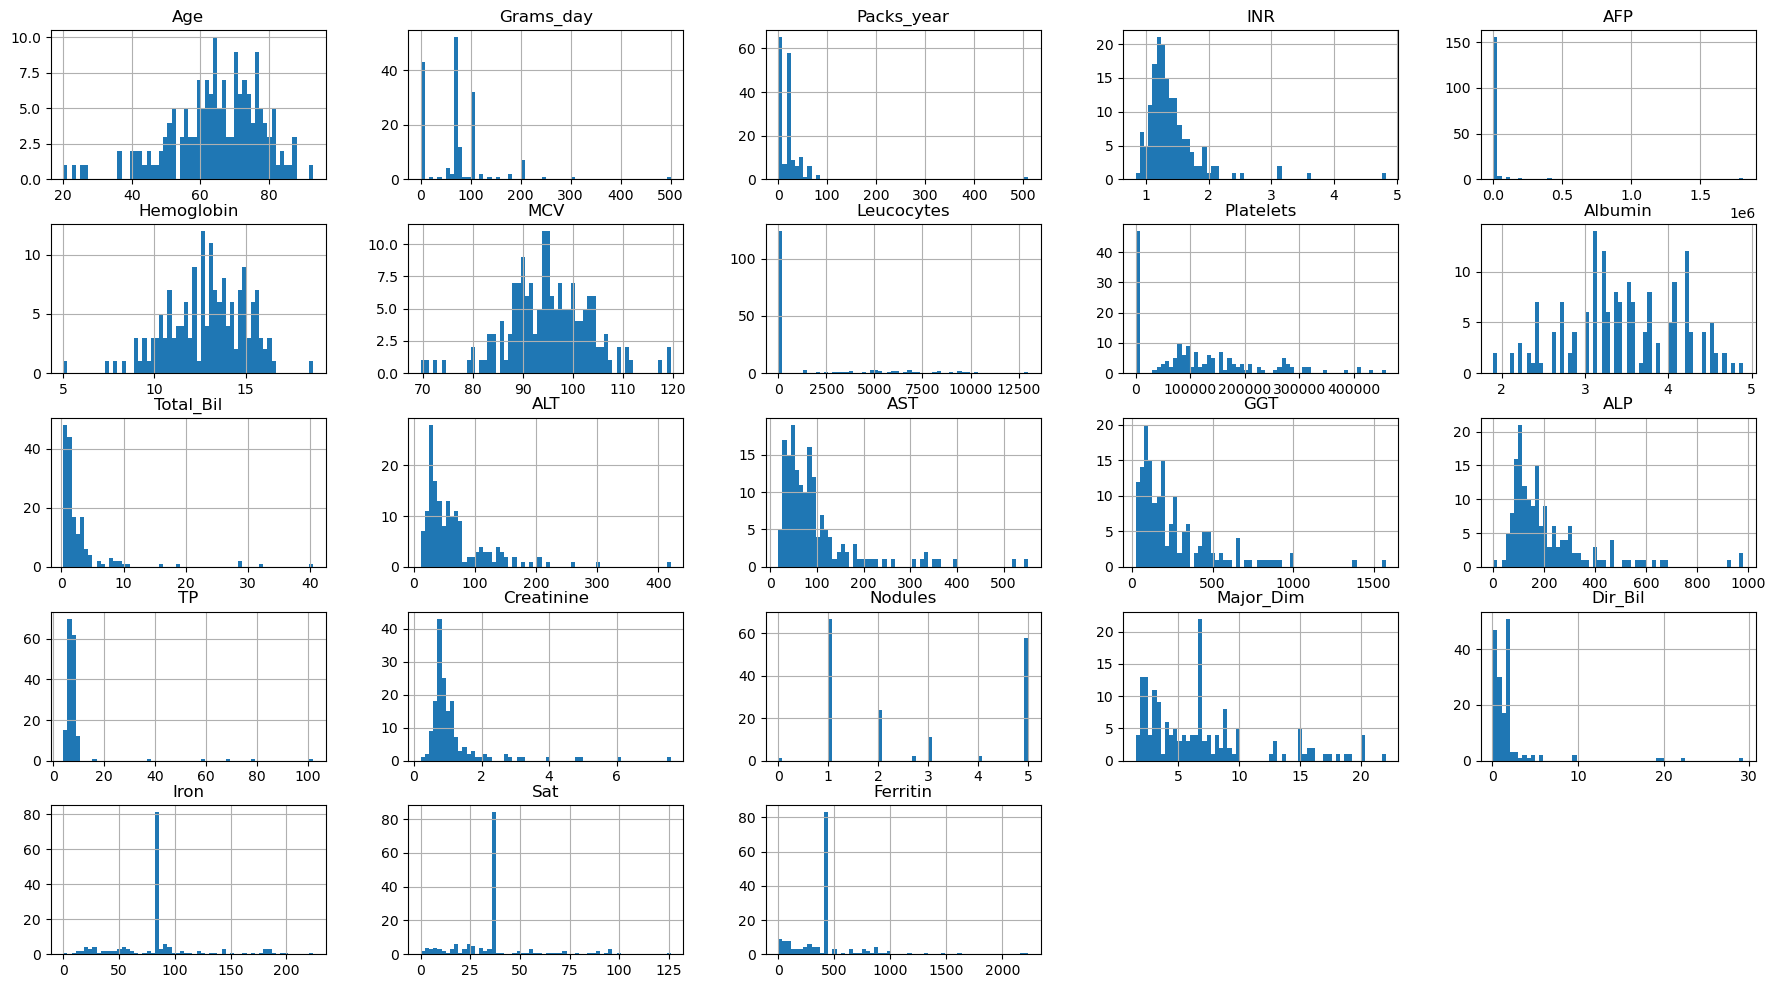

In [12]:
nf.hist(figsize=(22,12), bins=60)
nf_clean.hist(figsize=(22,12), bins=60)


Age:
  Lower Bound: 27.25
  Upper Bound: 103.75

Grams_day:
  Lower Bound: -175.0
  Upper Bound: 275.0

Packs_year:
  Lower Bound: -35.0
  Upper Bound: 55.0

INR:
  Lower Bound: 0.5674999999999998
  Upper Bound: 2.1425

AFP:
  Lower Bound: -1692.5
  Upper Bound: 2672.5

Hemoglobin:
  Lower Bound: 6.075000000000001
  Upper Bound: 20.025

MCV:
  Lower Bound: 71.97500000000001
  Upper Bound: 118.32499999999999

Leucocytes:
  Lower Bound: -64.025
  Upper Bound: 113.725

Platelets:
  Lower Bound: -296757.5
  Upper Bound: 467027.5

Albumin:
  Lower Bound: 1.5250000000000004
  Upper Bound: 5.574999999999999

Total_Bil:
  Lower Bound: -2.9288906250000006
  Upper Bound: 6.916828125

ALT:
  Lower Bound: -49.5
  Upper Bound: 157.5

AST:
  Lower Bound: -59.75
  Upper Bound: 214.75

GGT:
  Lower Bound: -347.25
  Upper Bound: 782.25

ALP:
  Lower Bound: -155.25
  Upper Bound: 524.25

TP:
  Lower Bound: 4.125000000000001
  Upper Bound: 9.975

Creatinine:
  Lower Bound: -0.01990506329113928
  Upper Bo

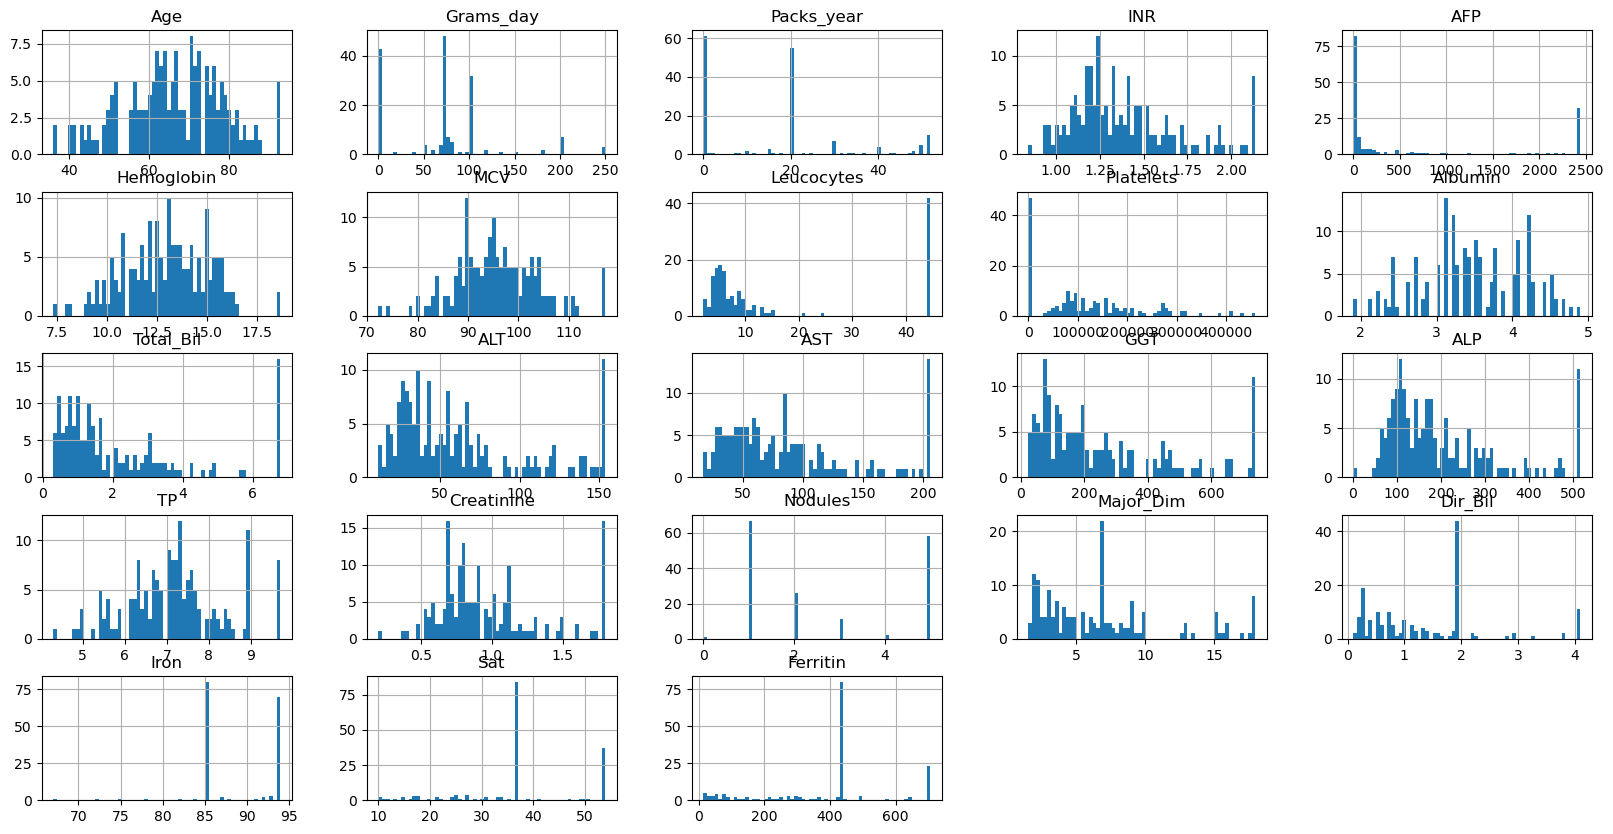

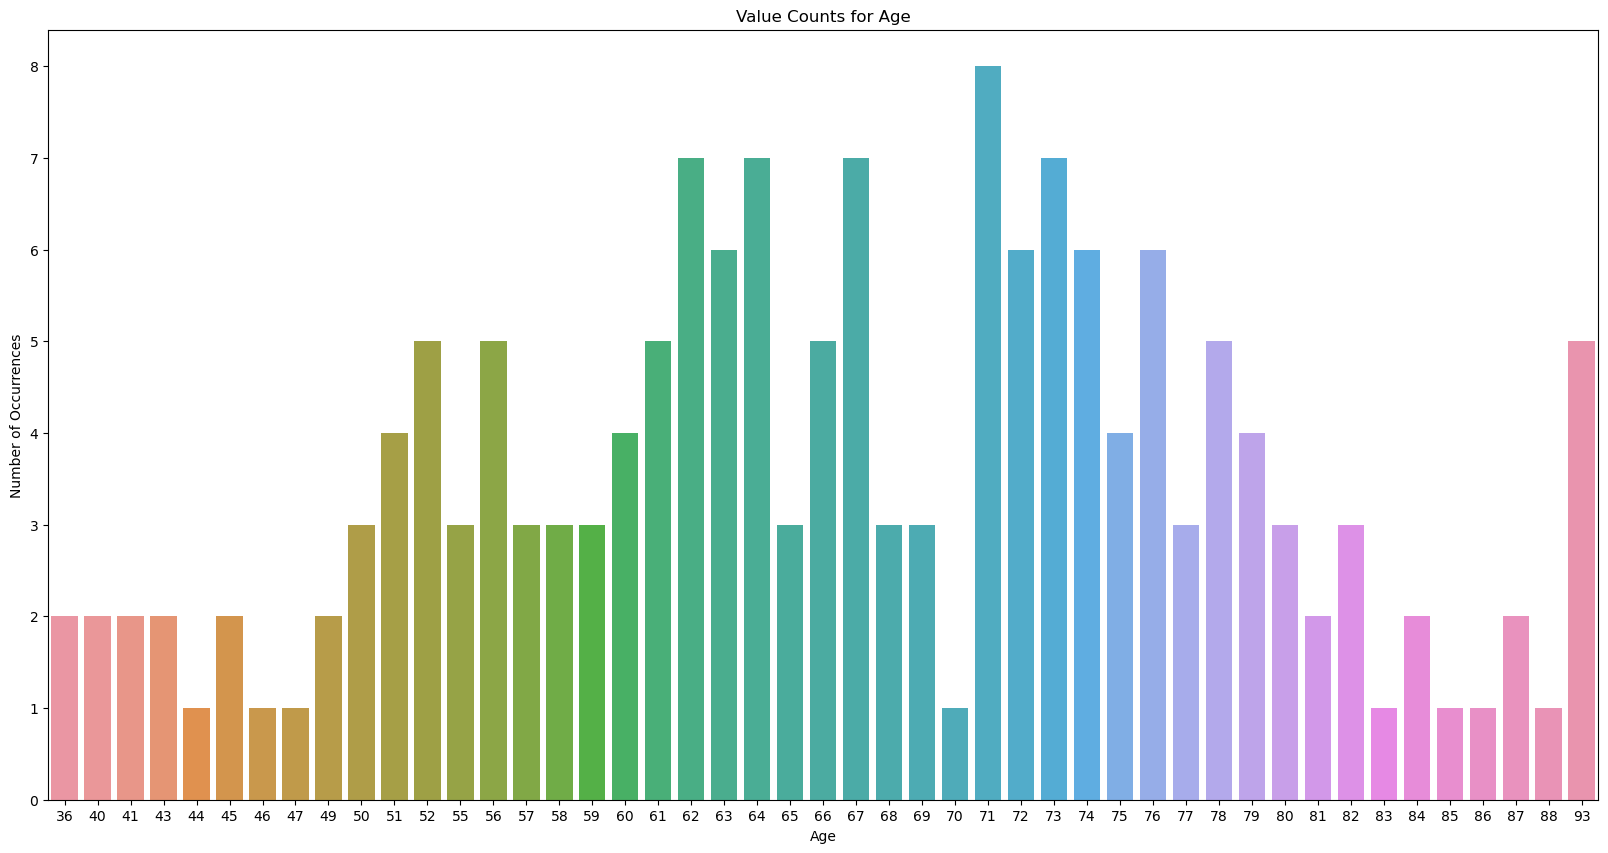

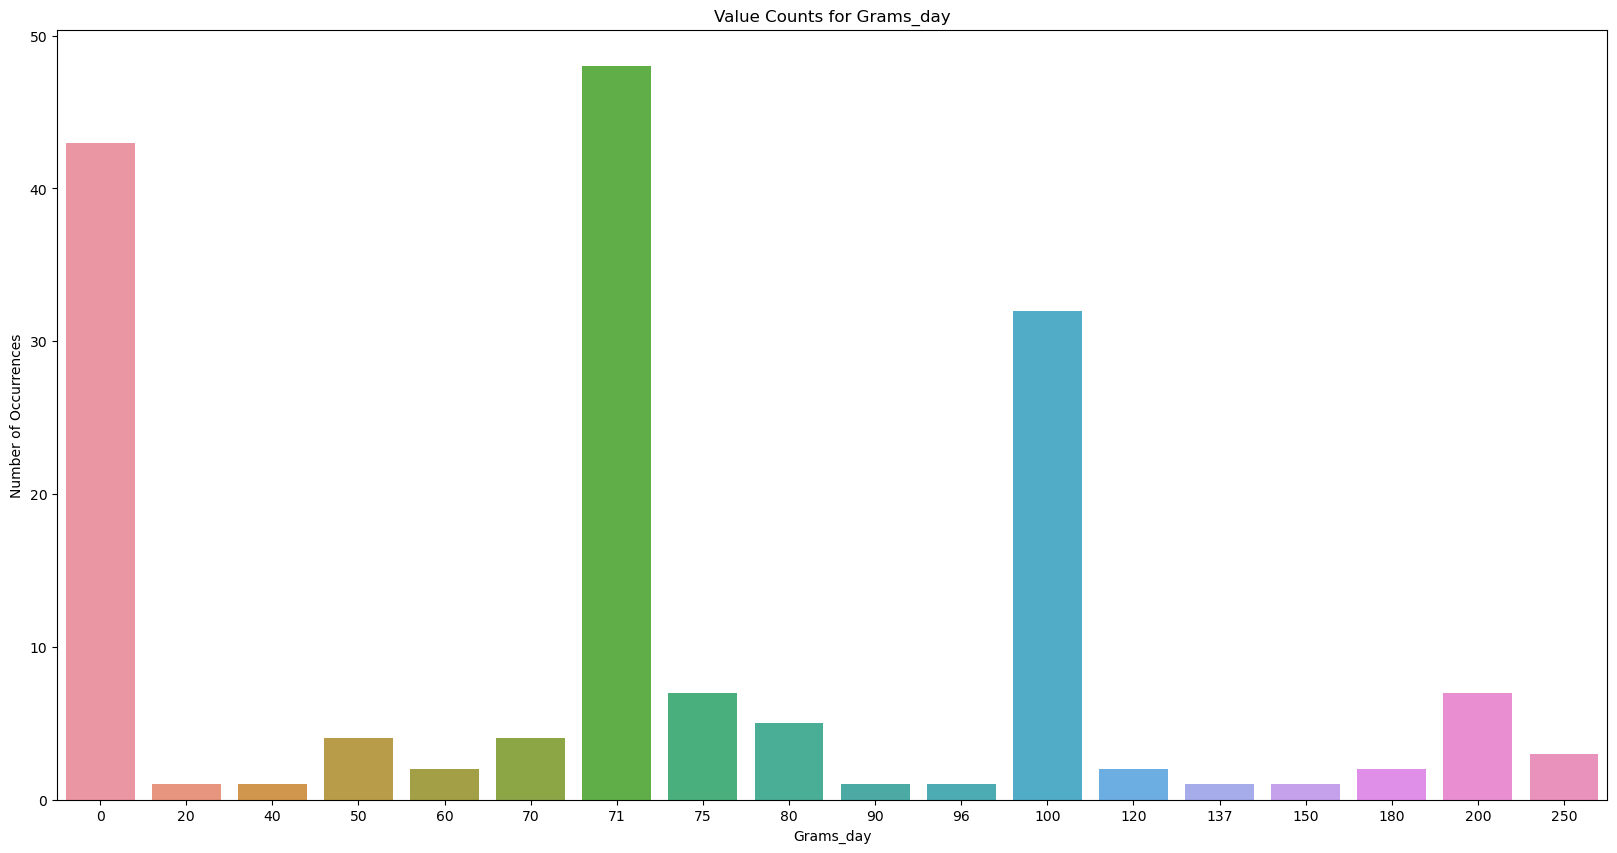

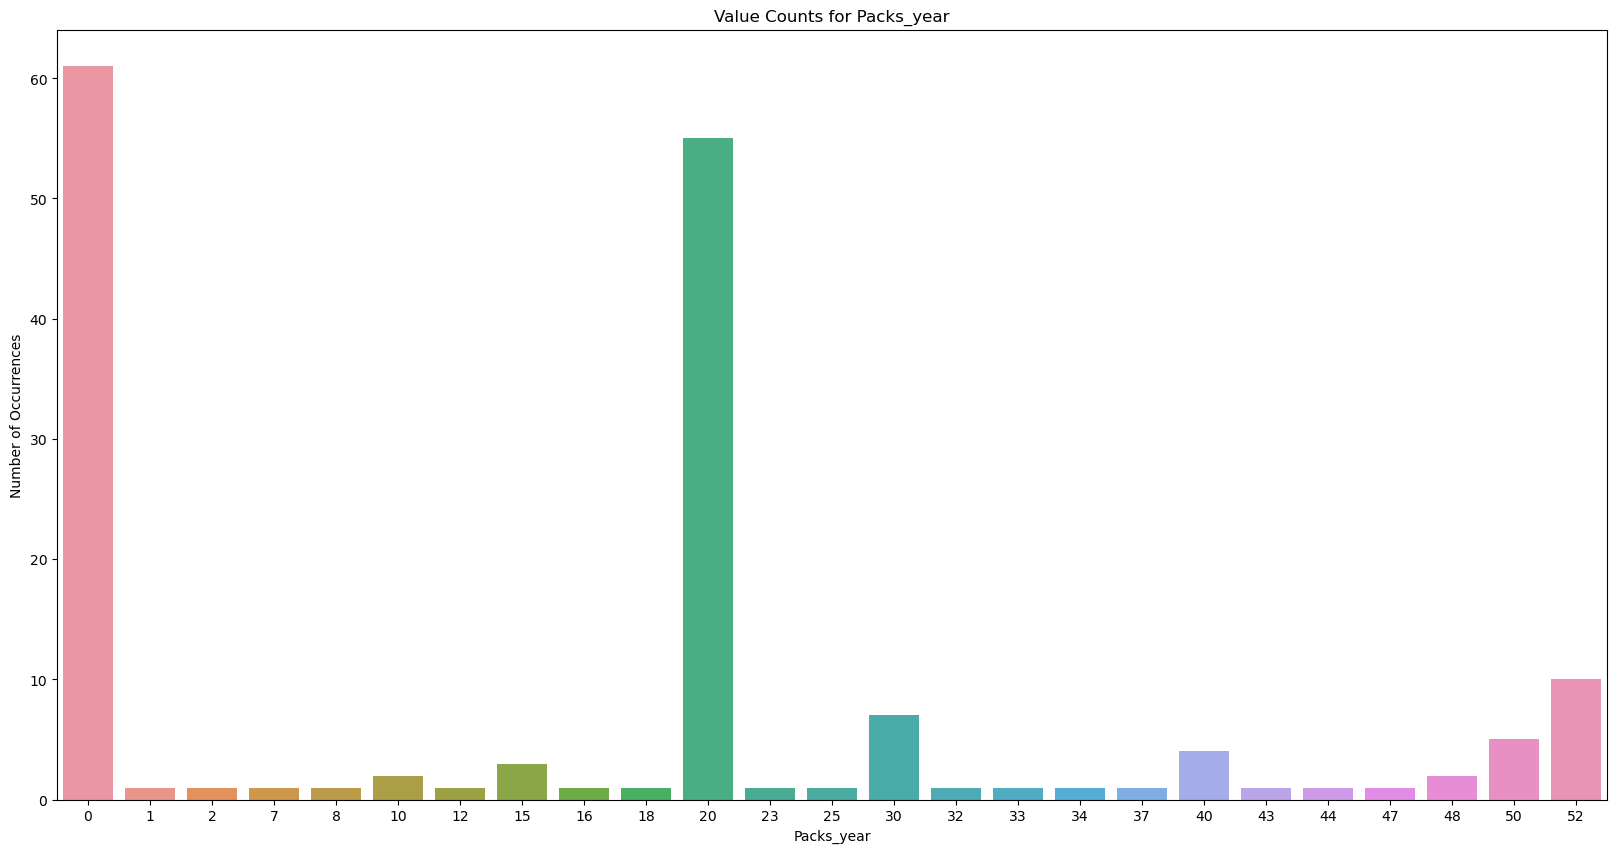

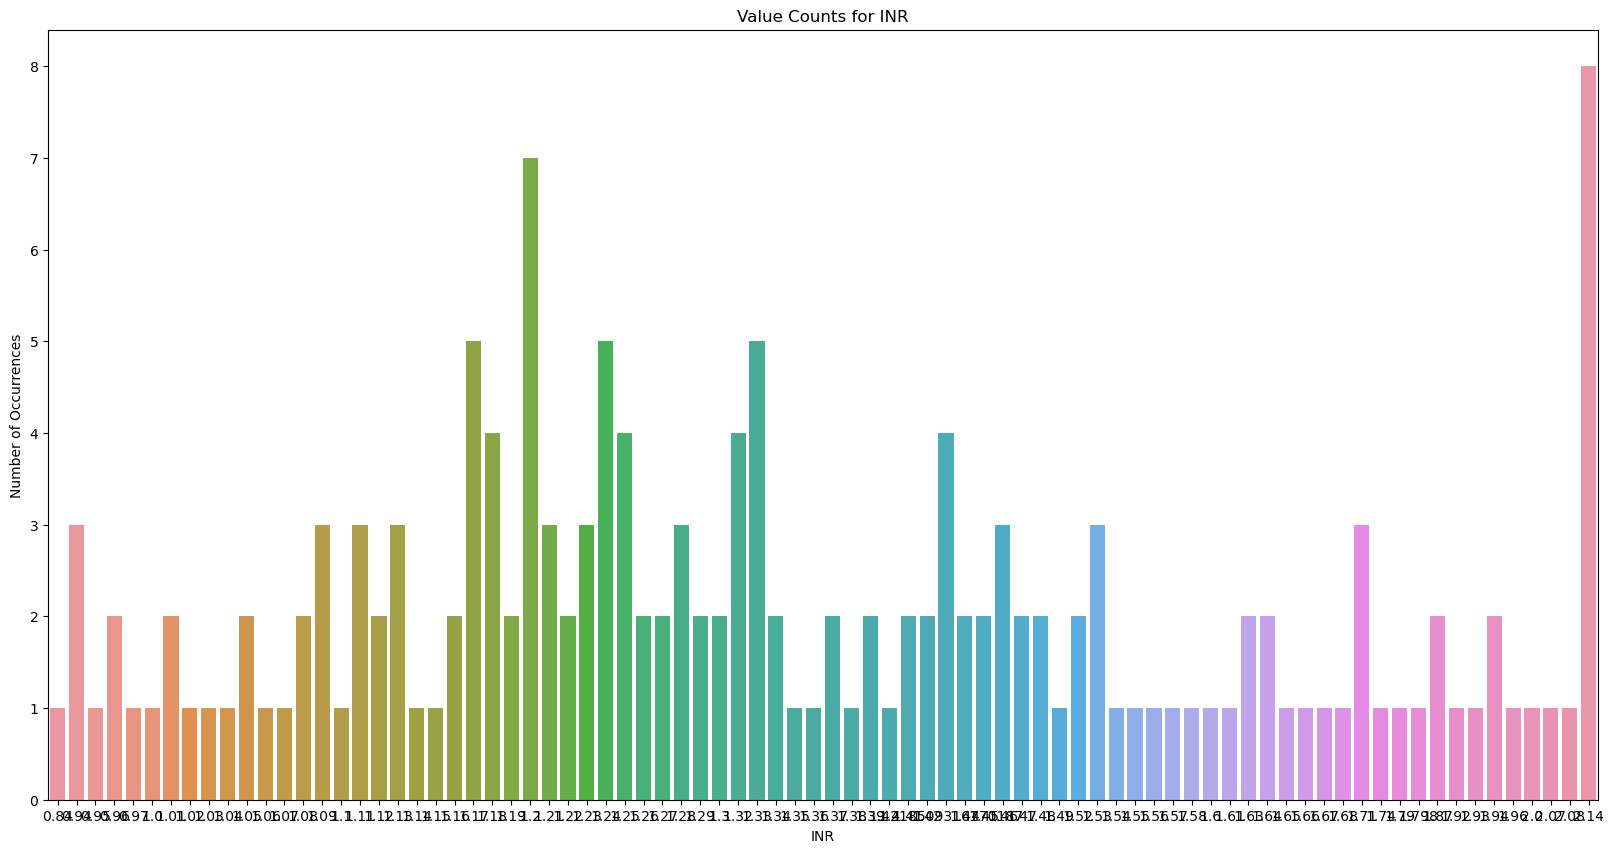

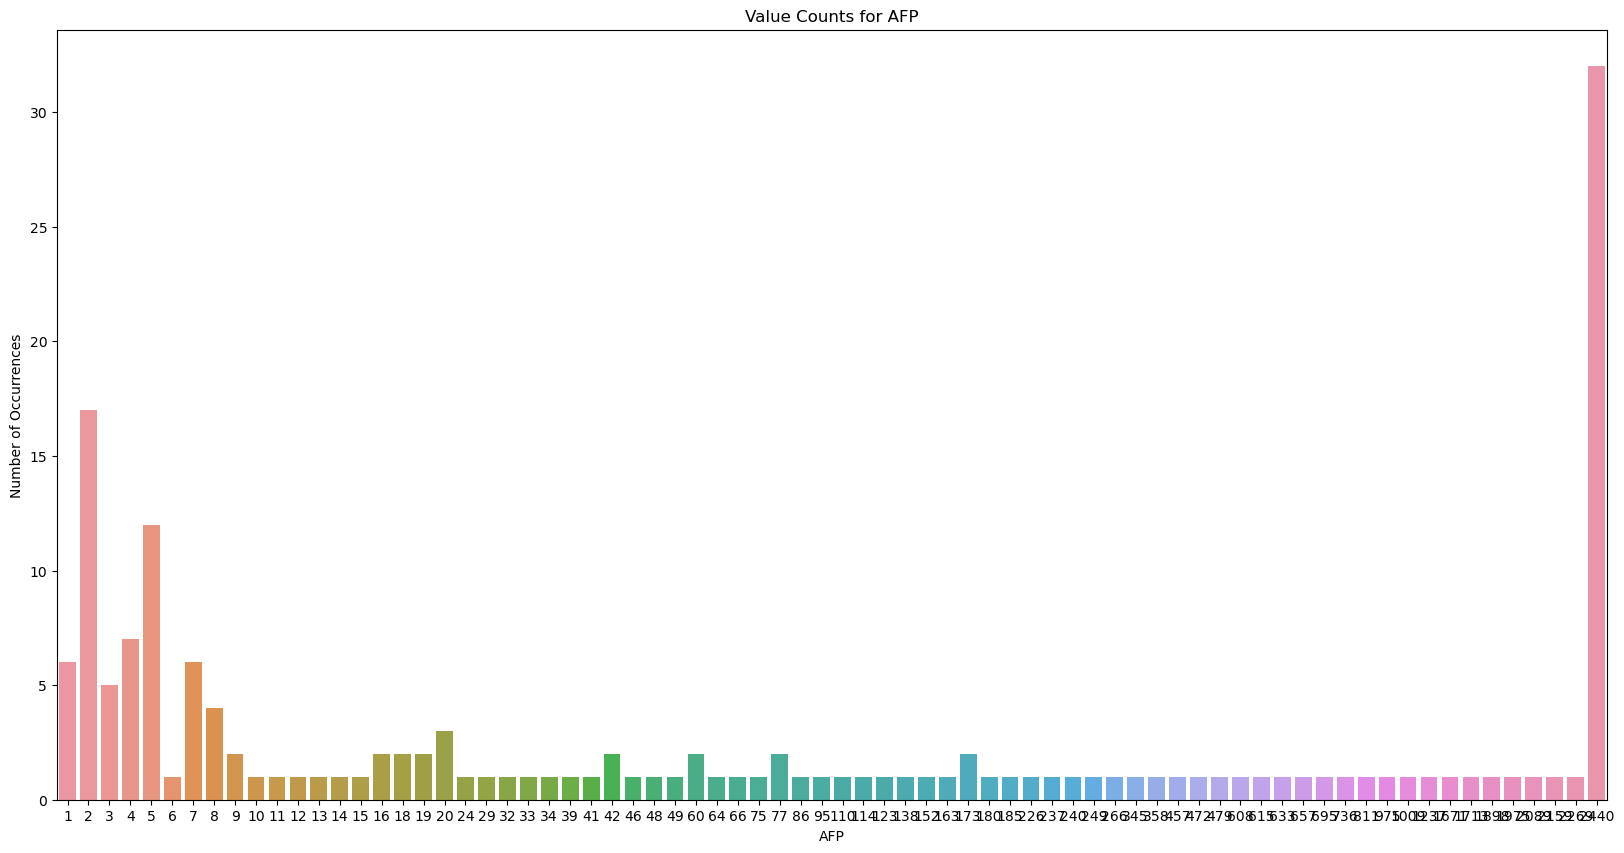

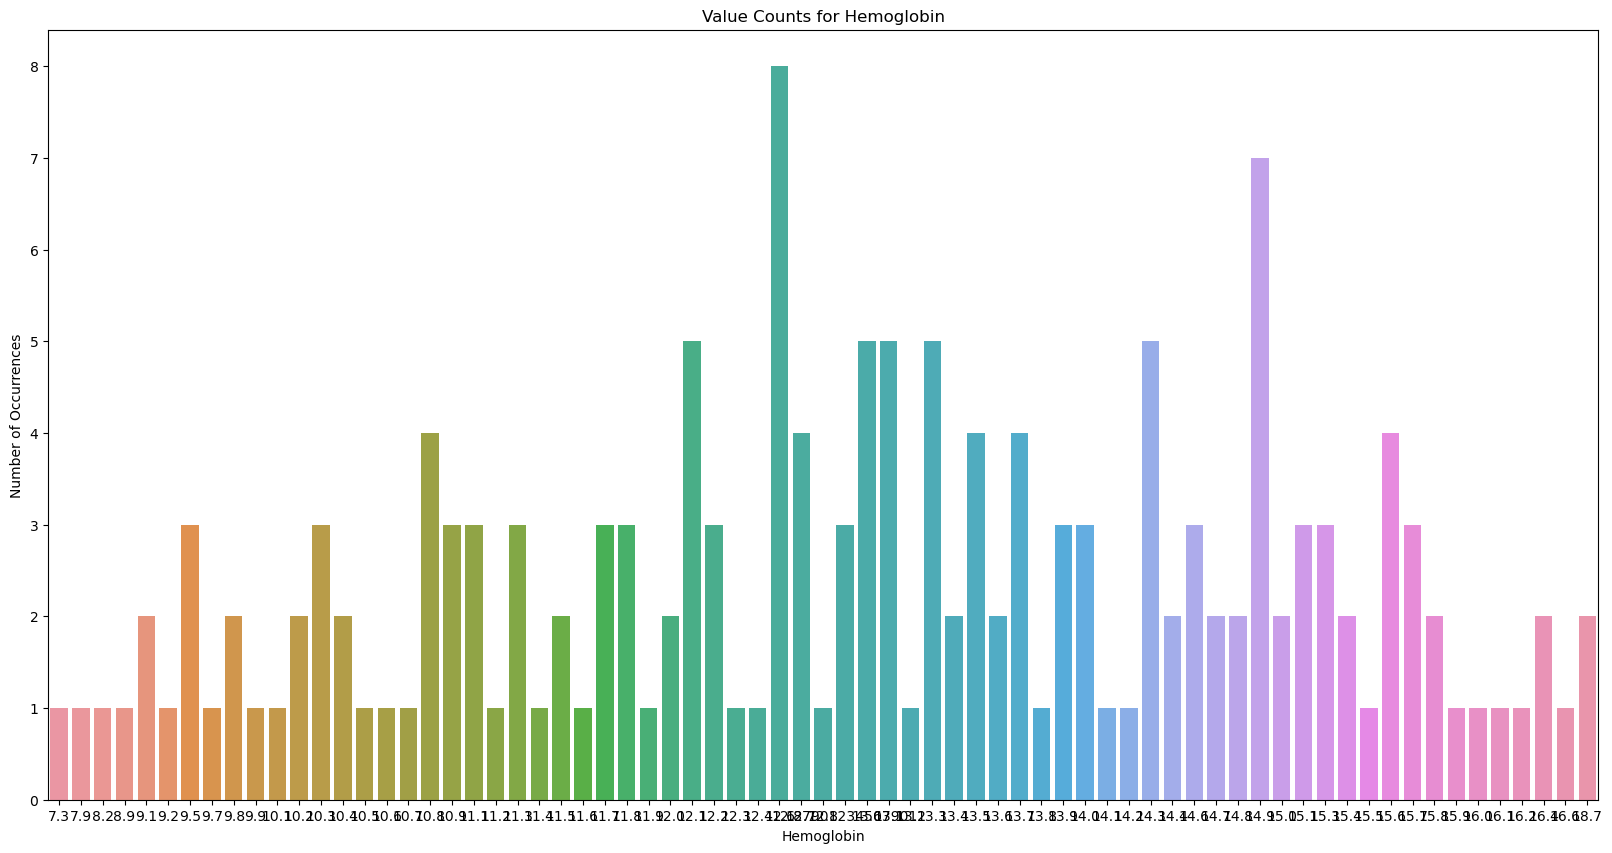

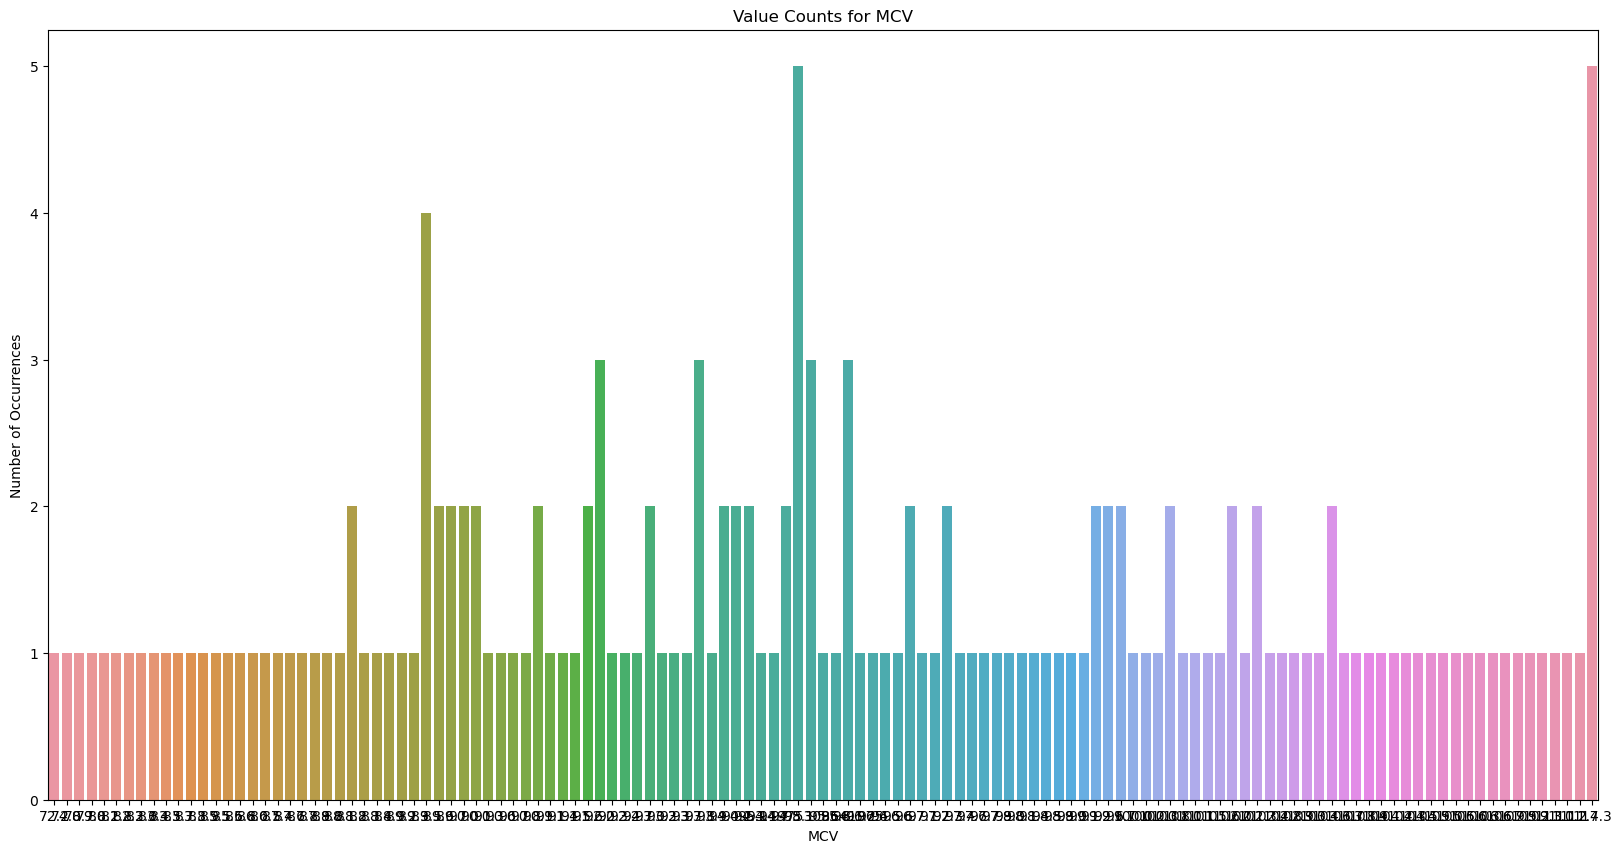

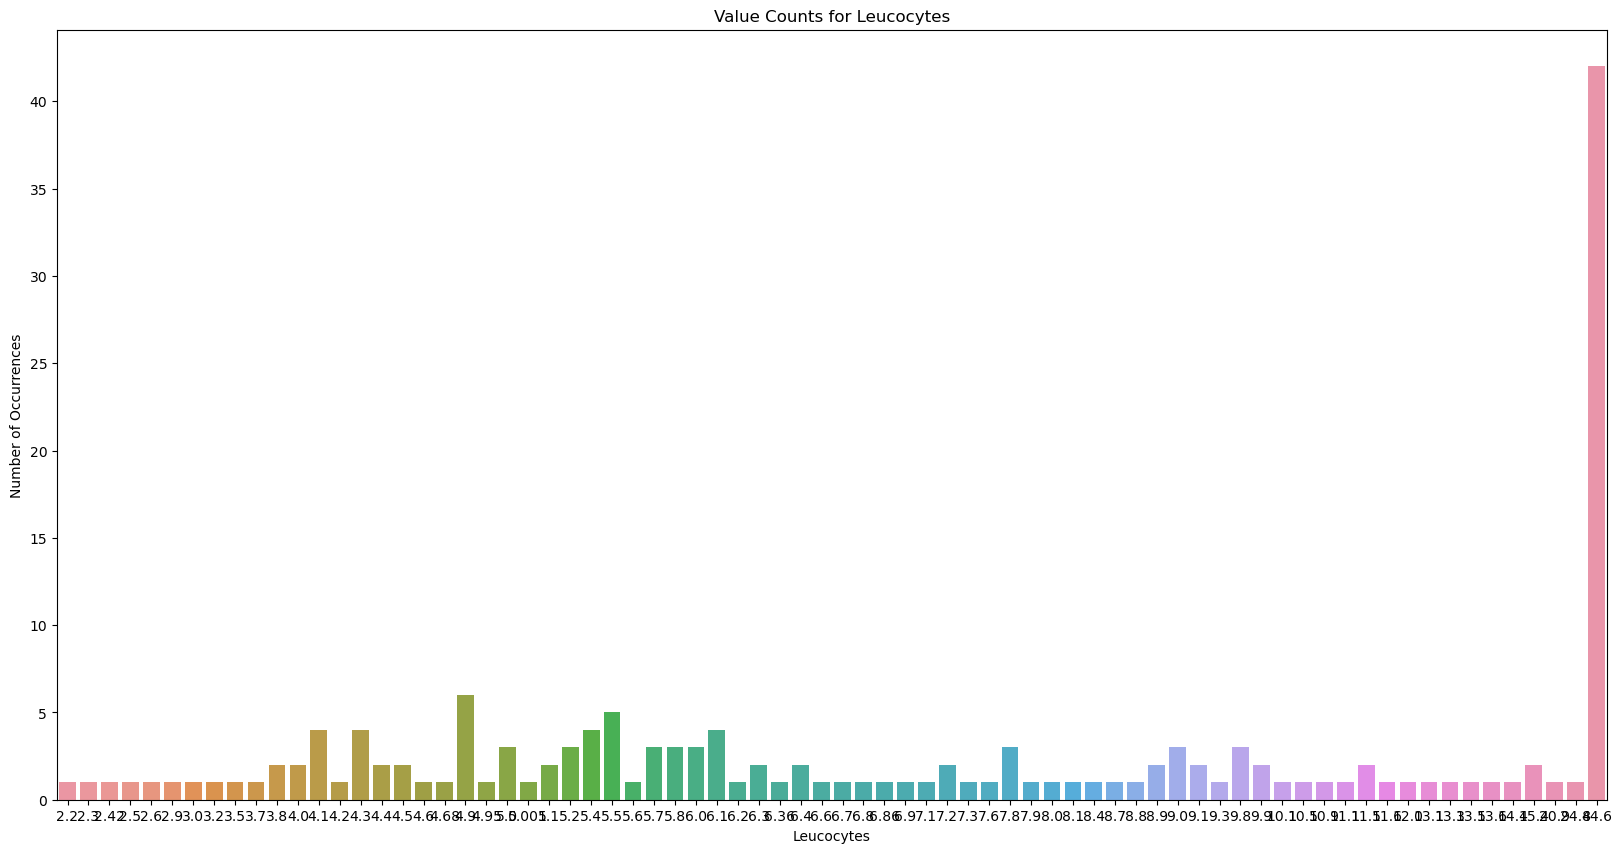

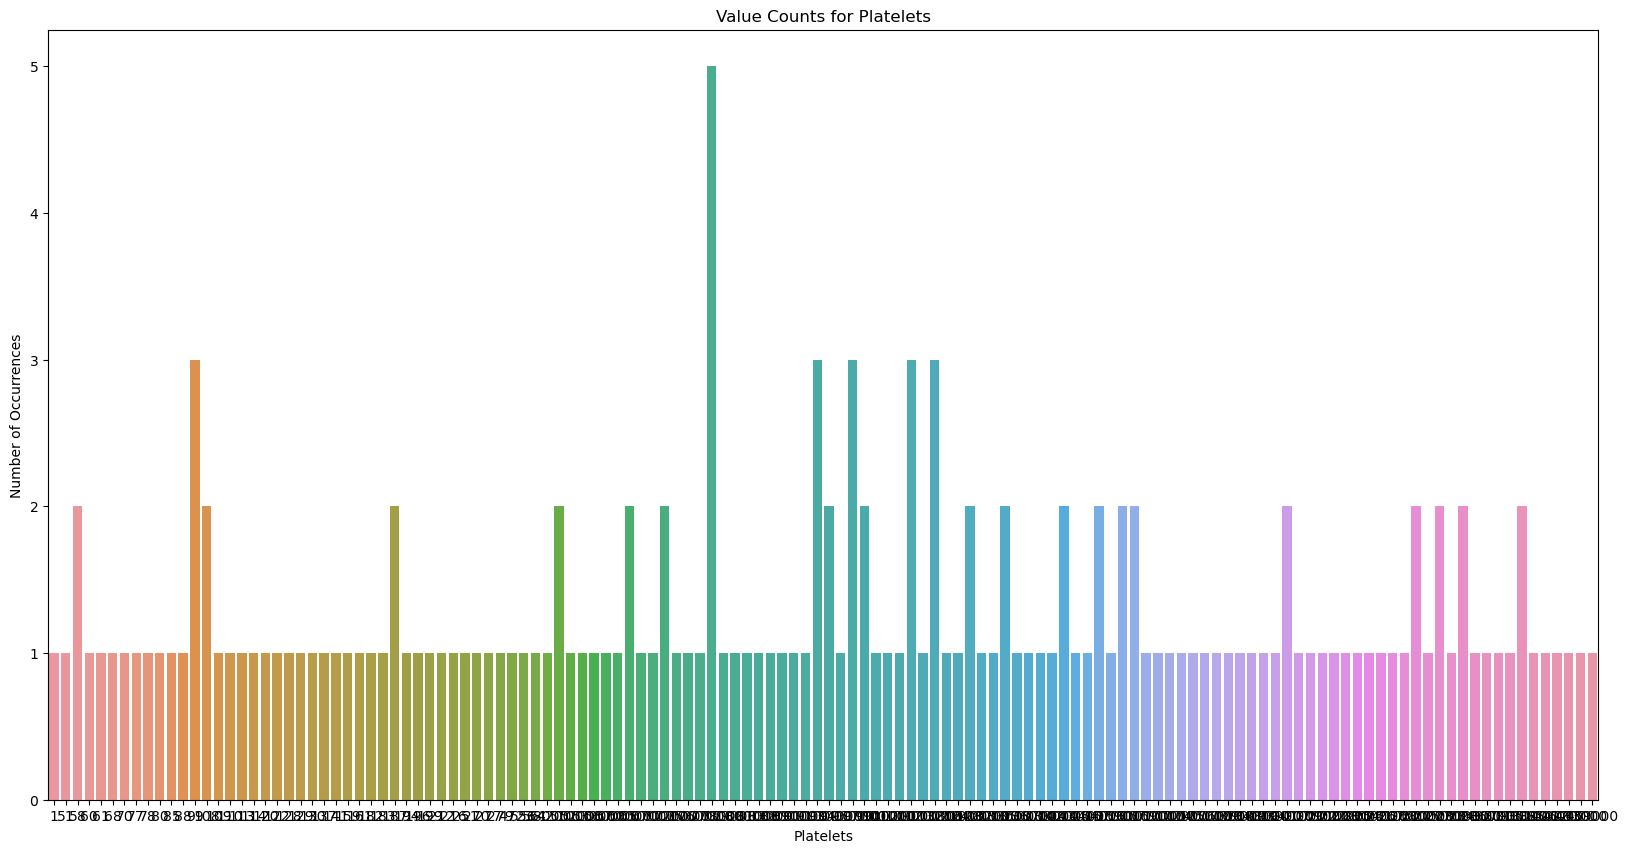

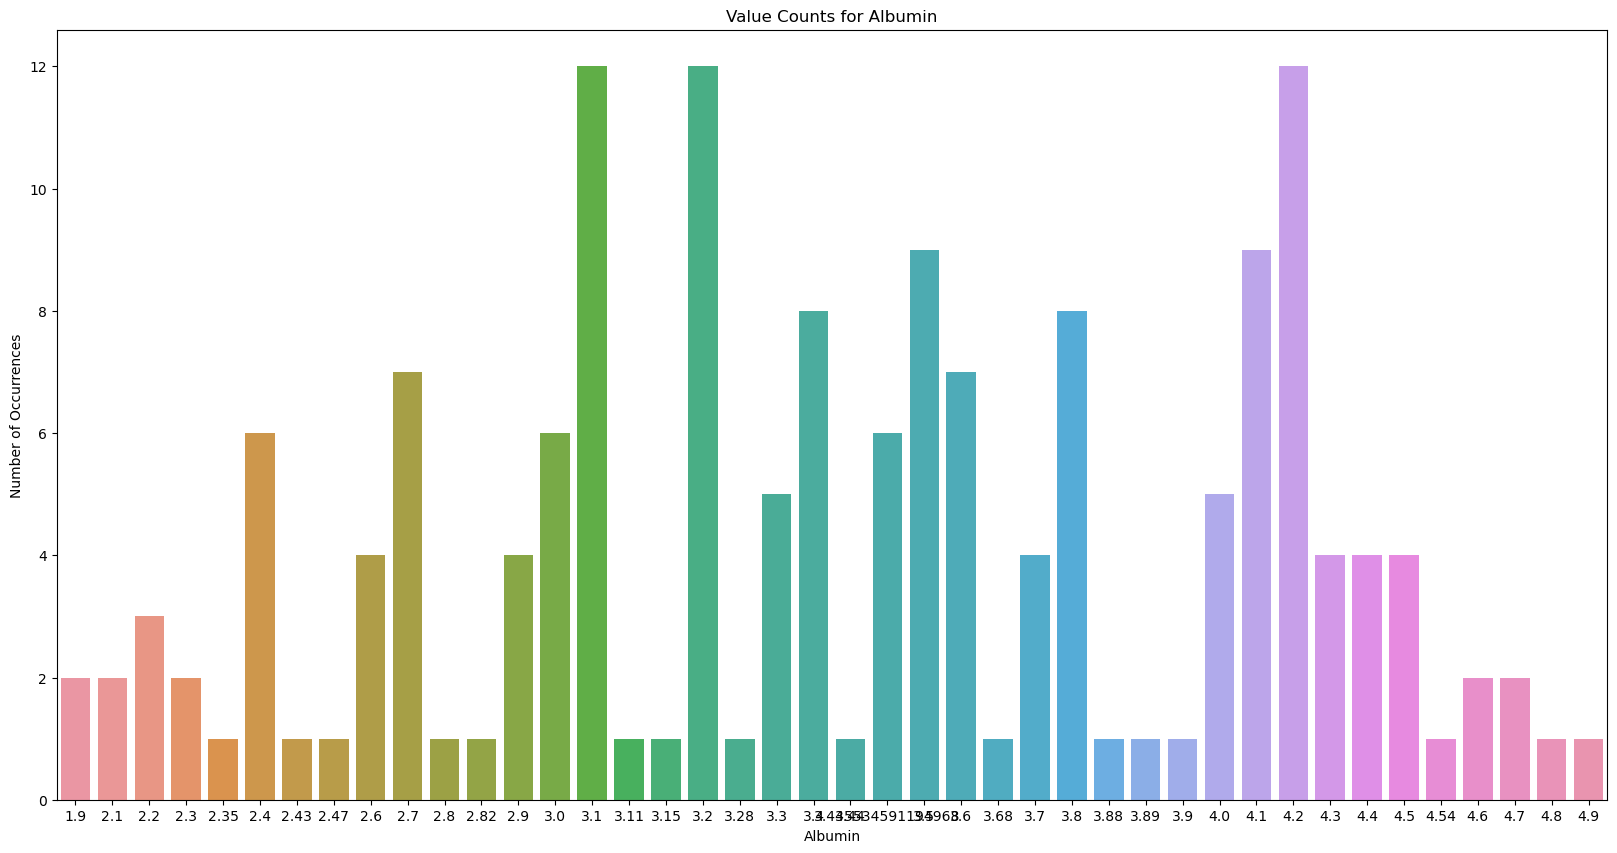

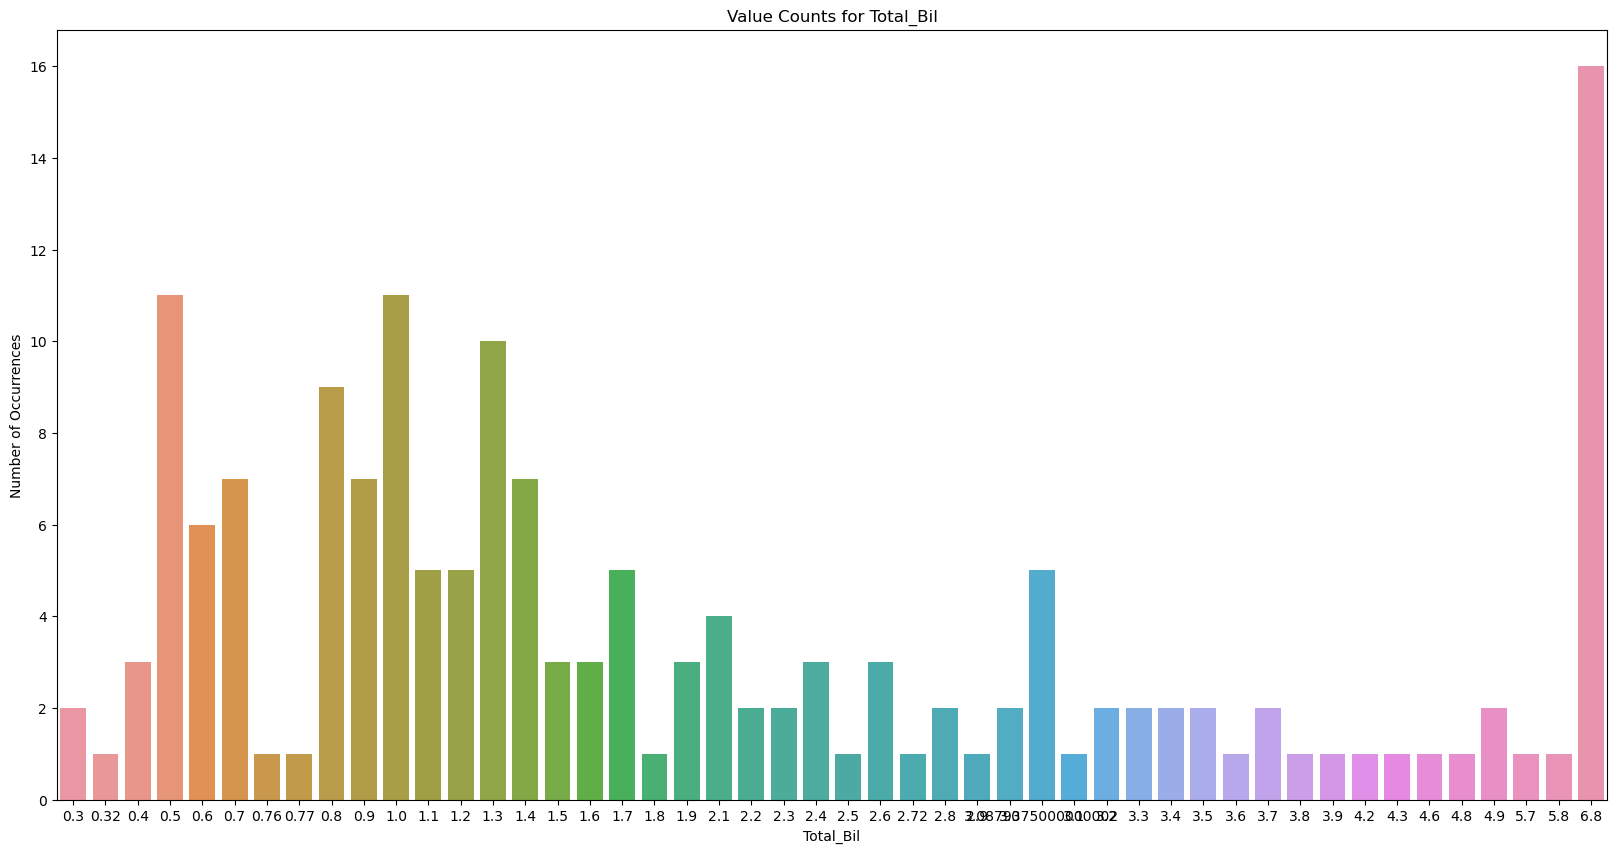

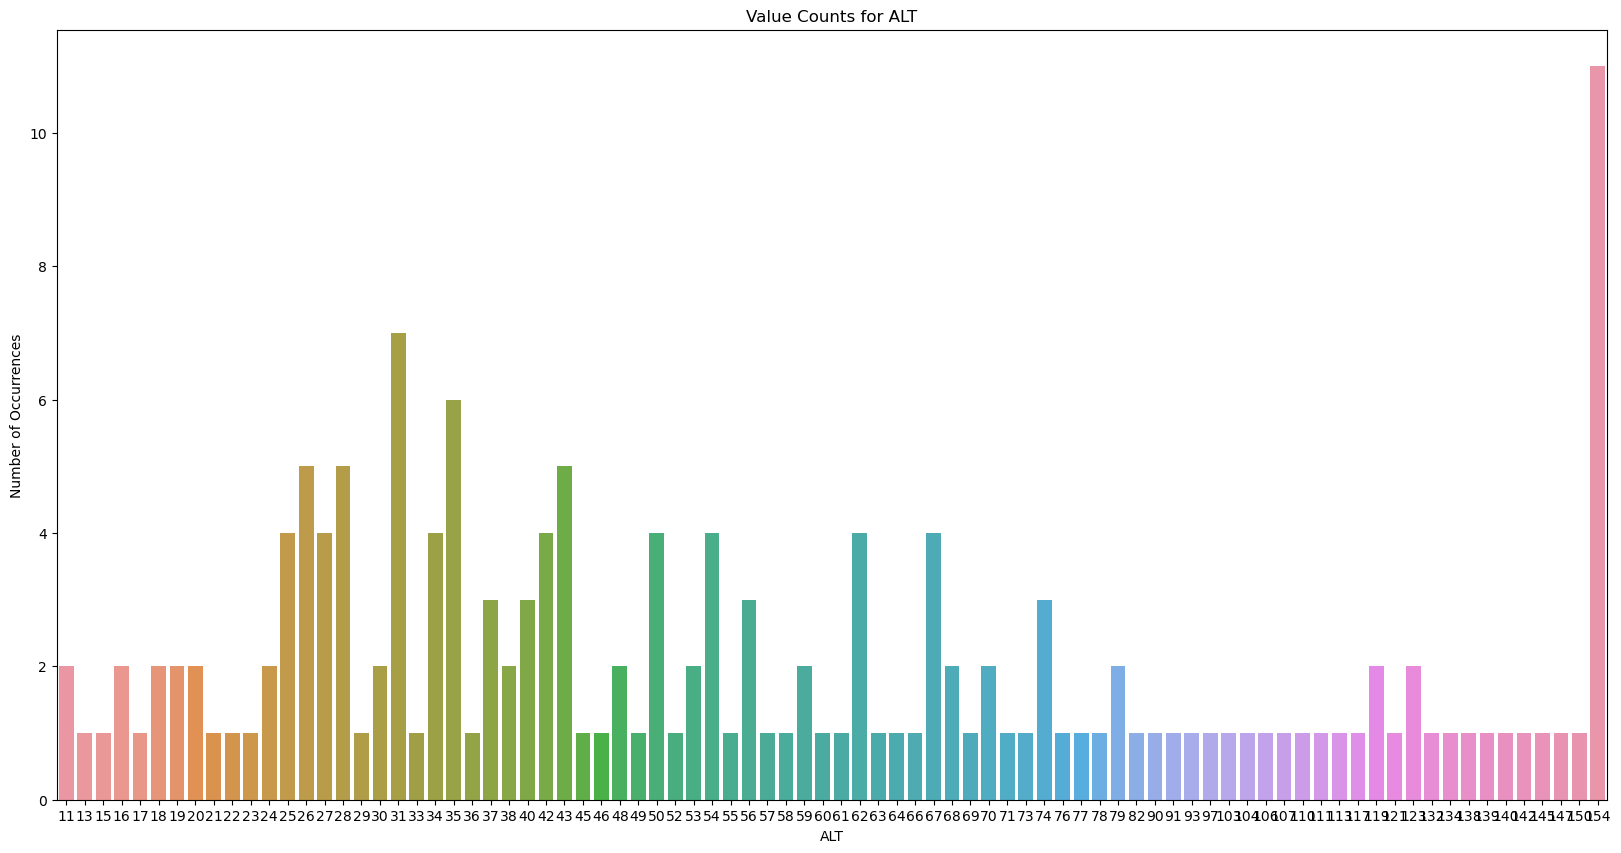

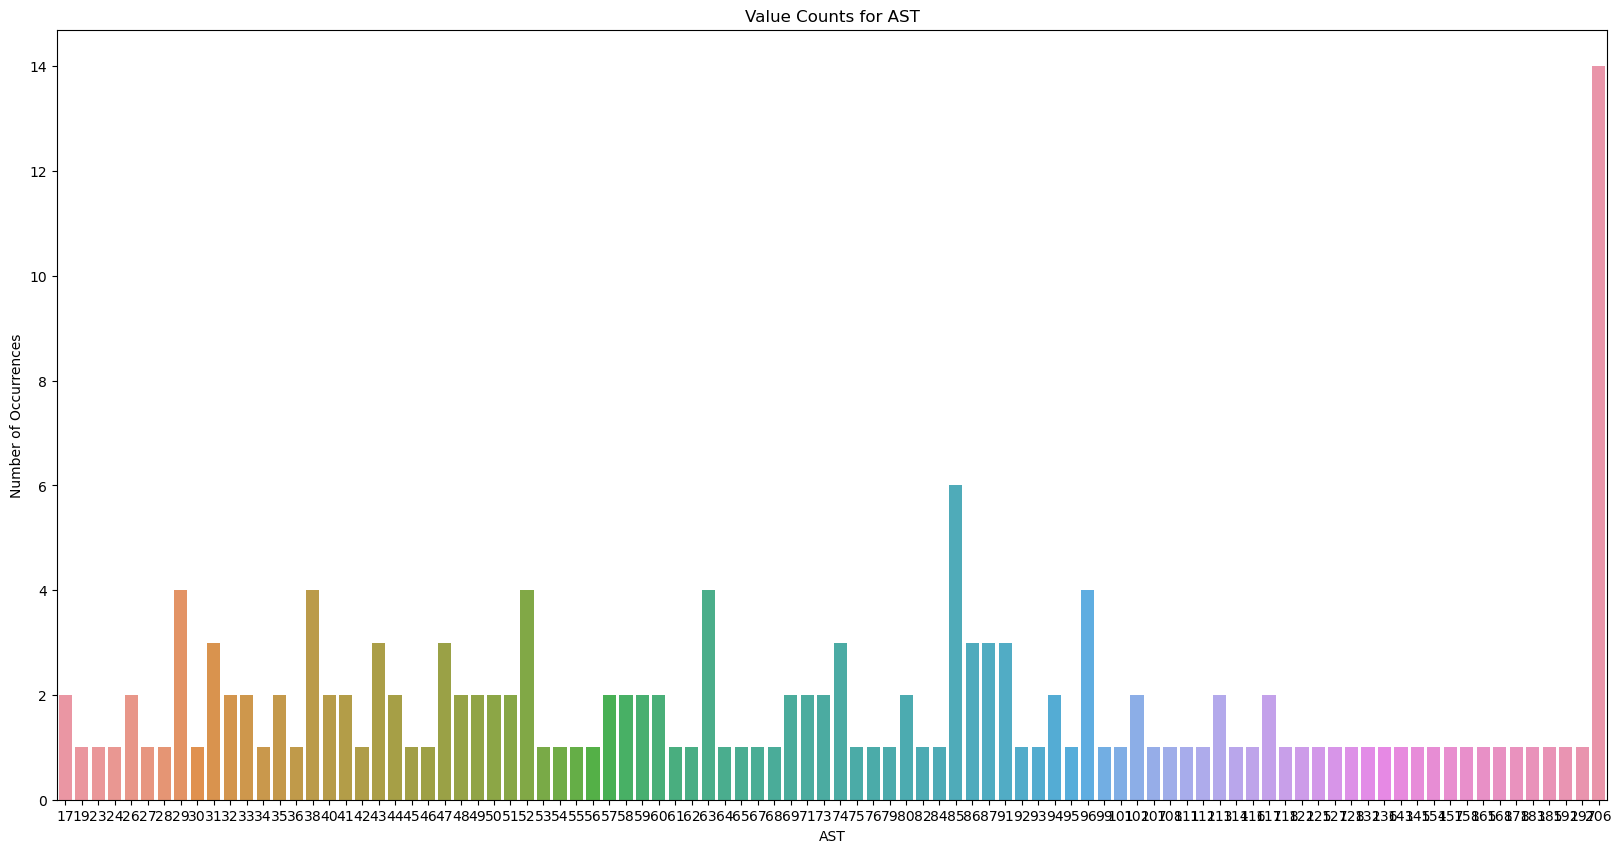

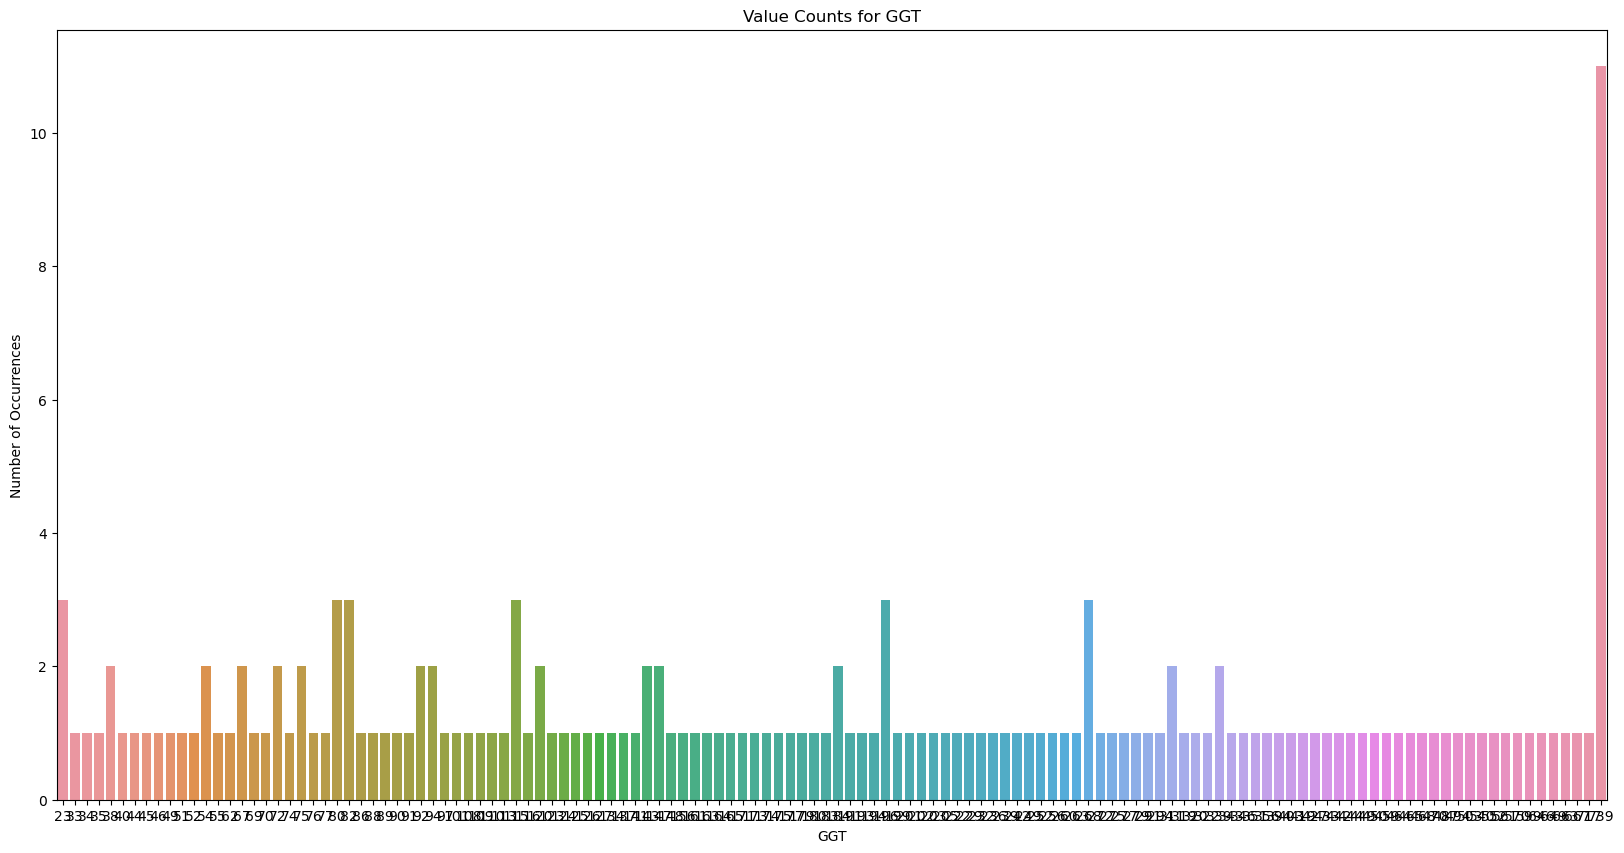

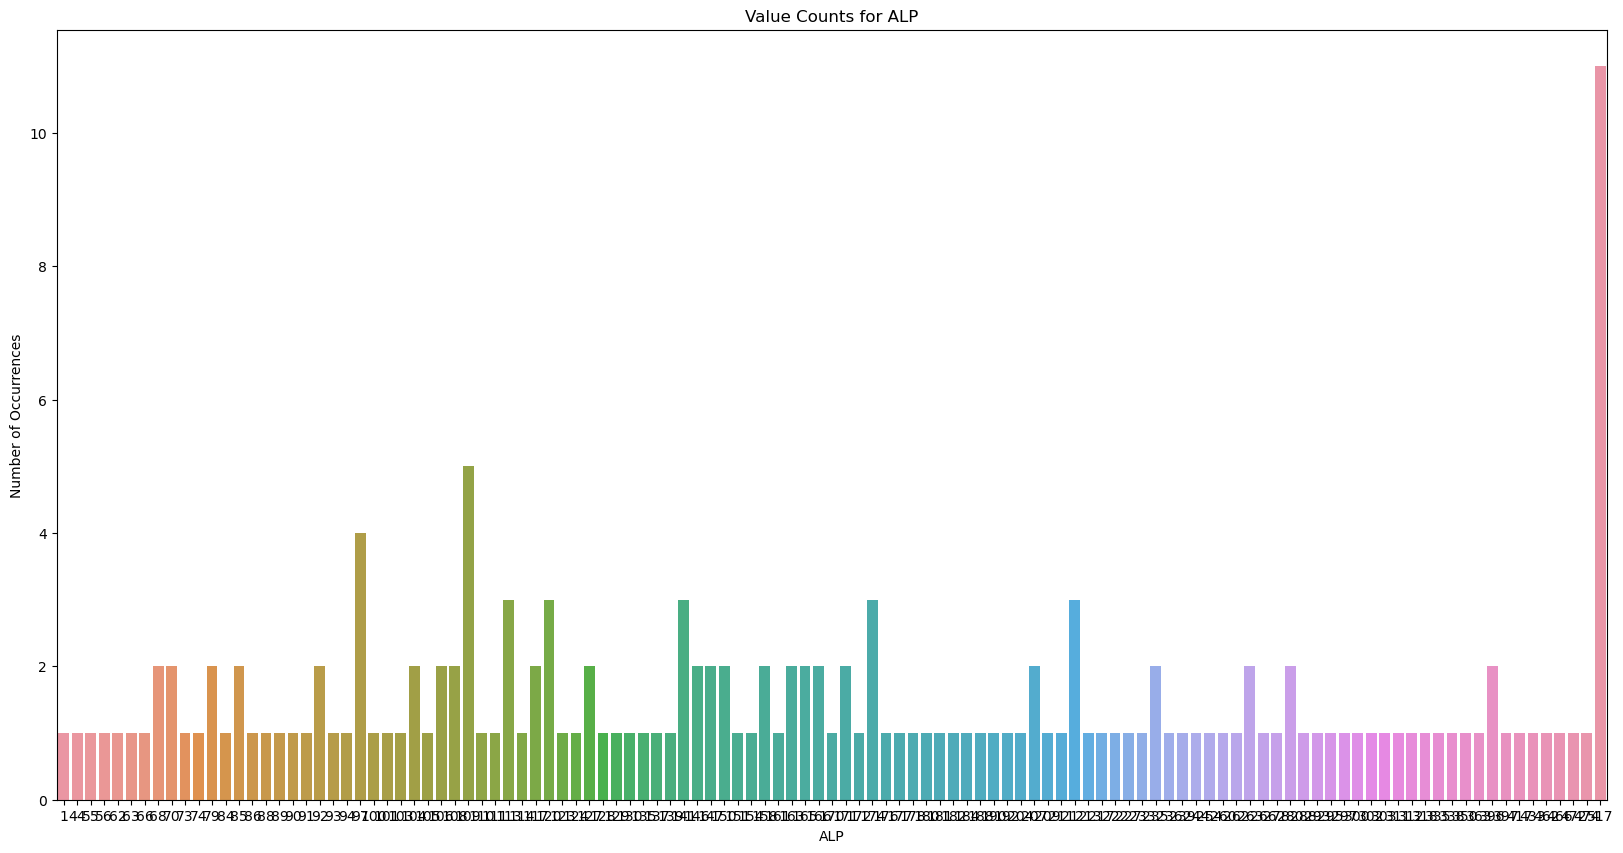

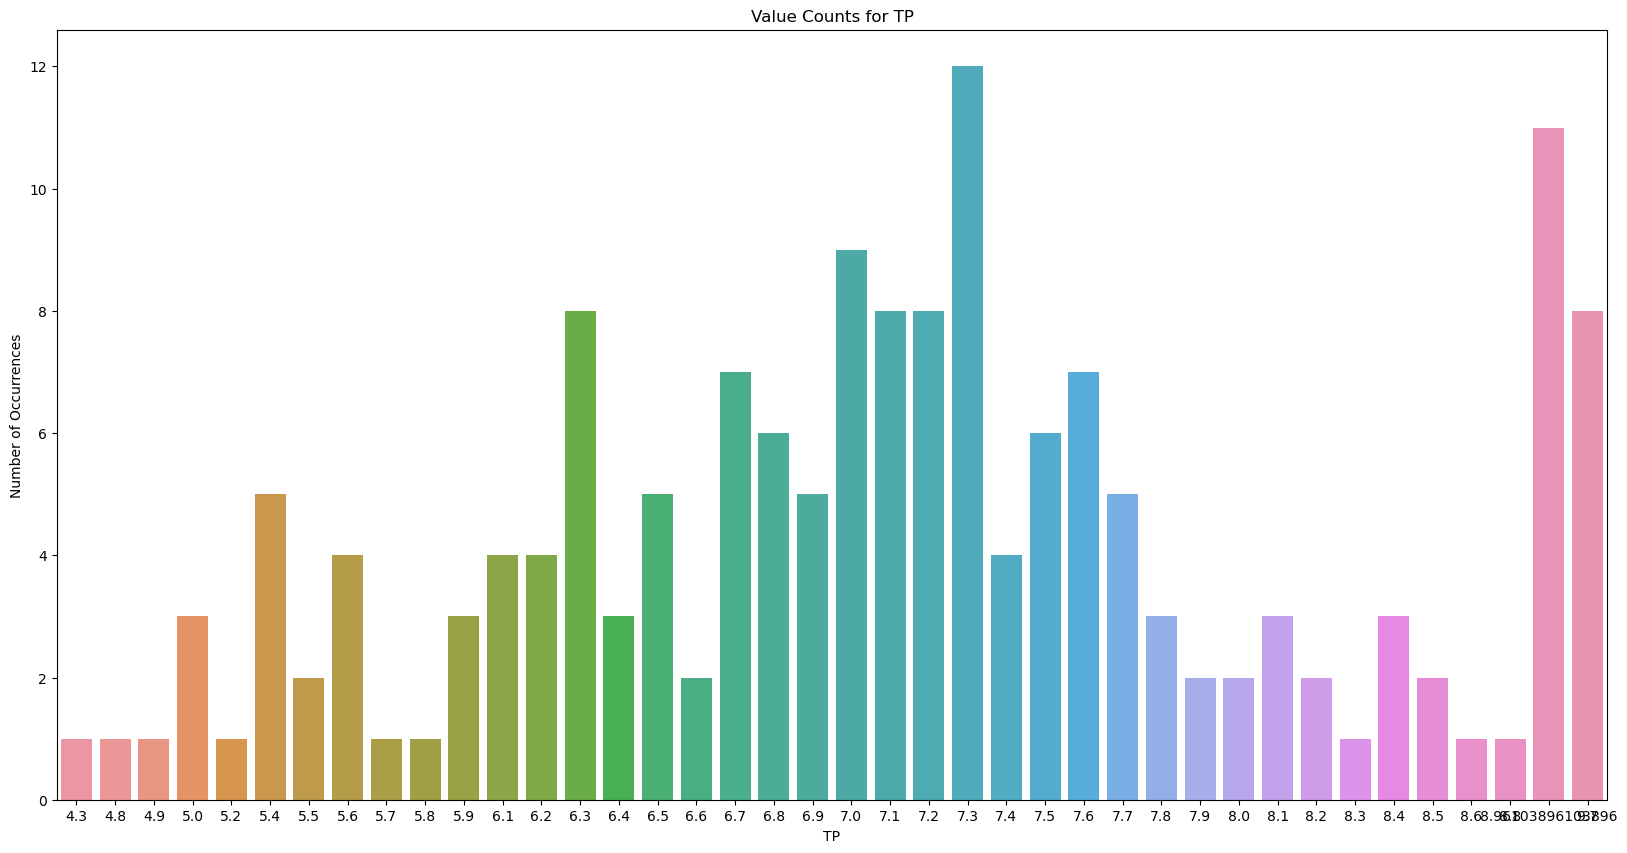

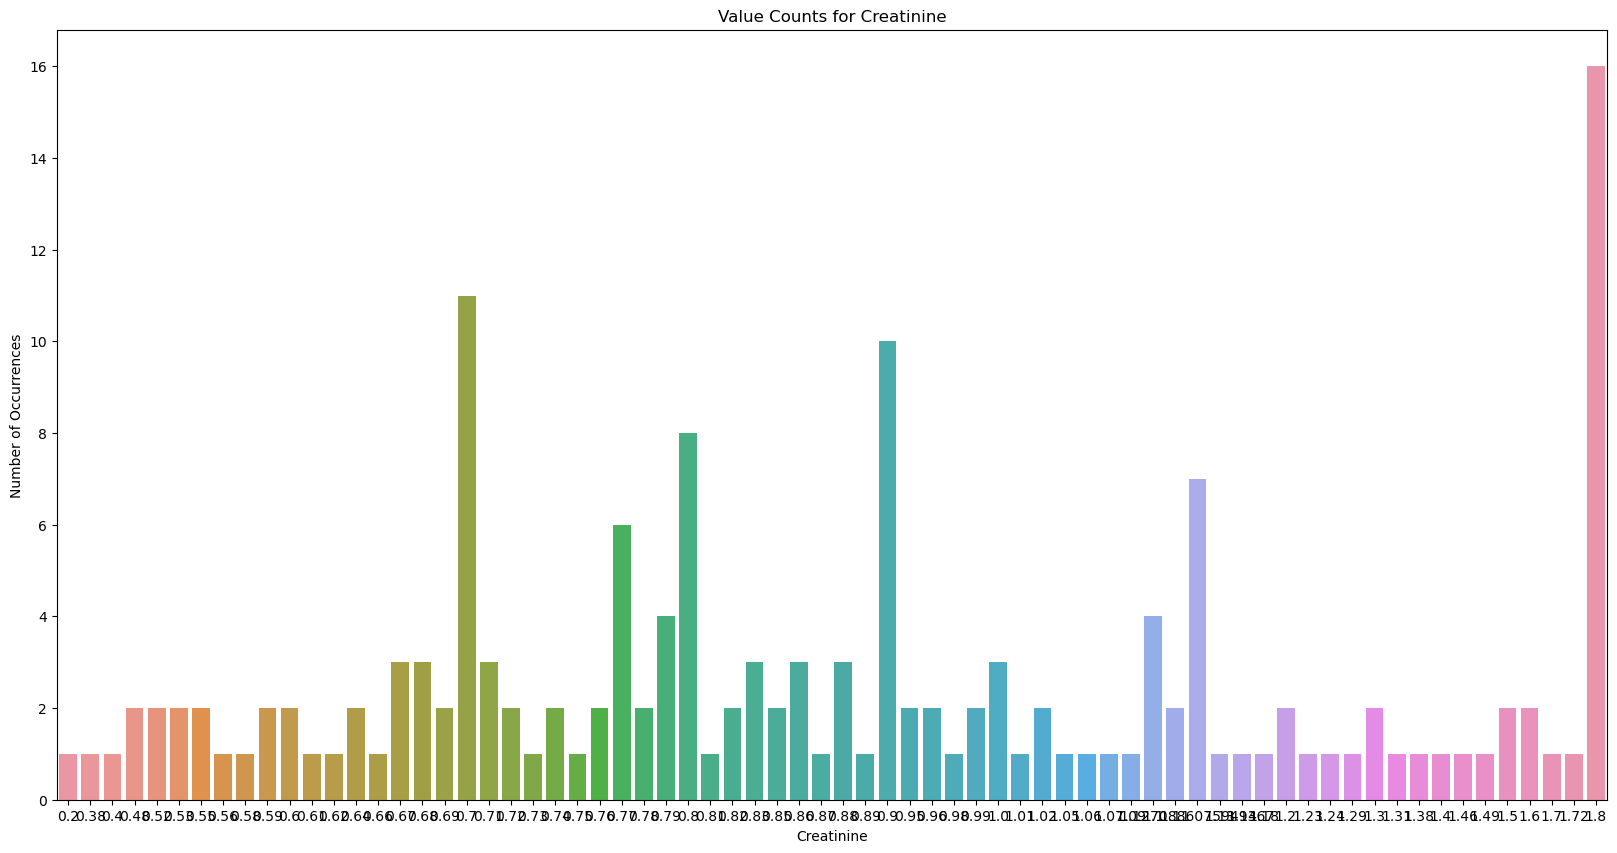

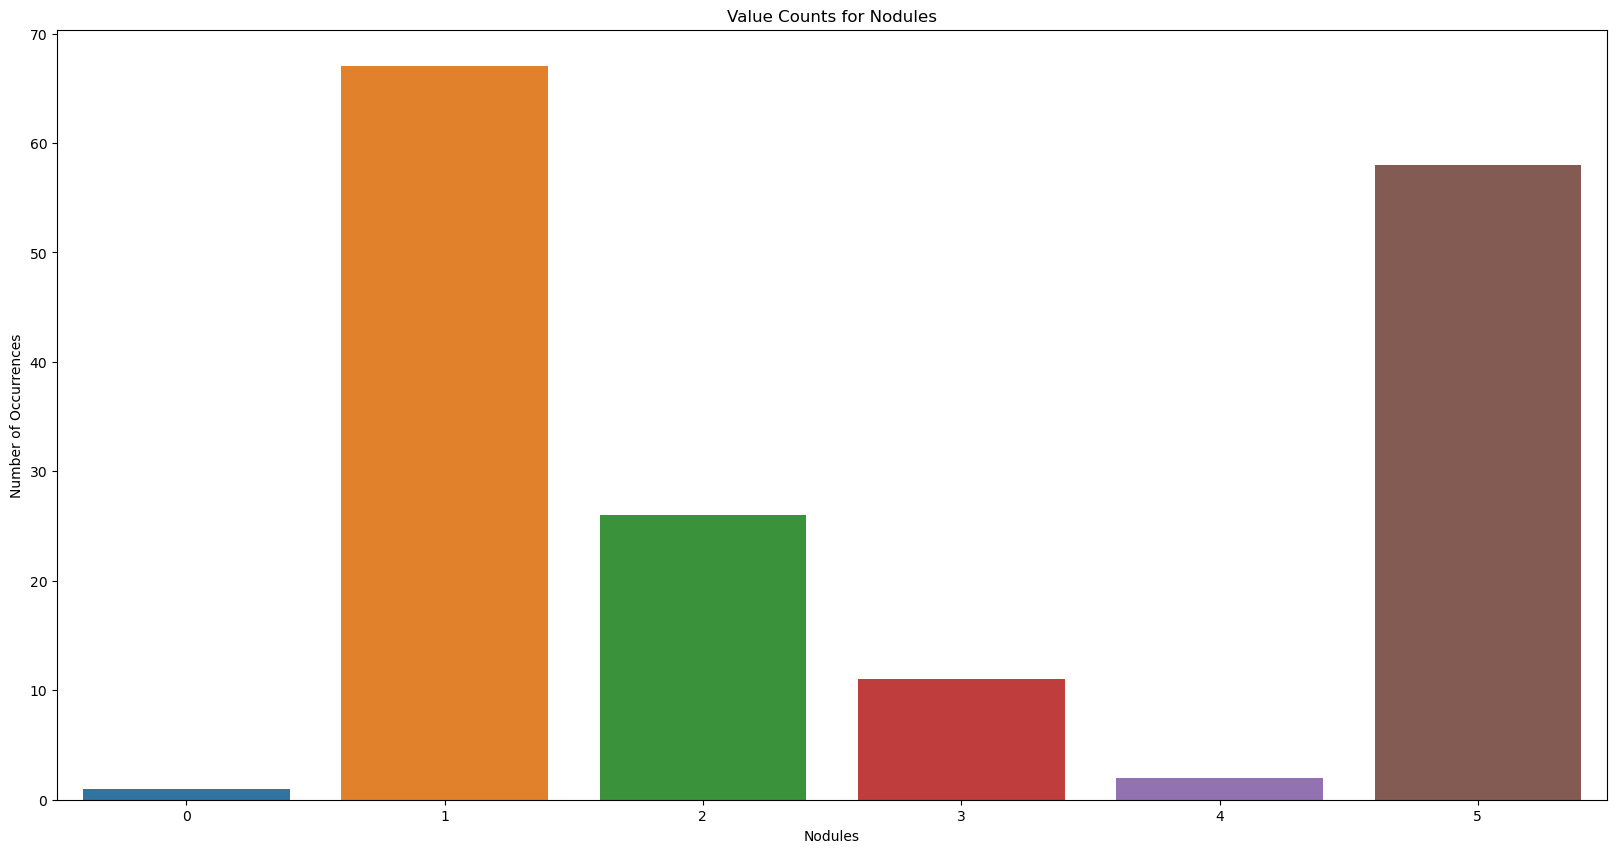

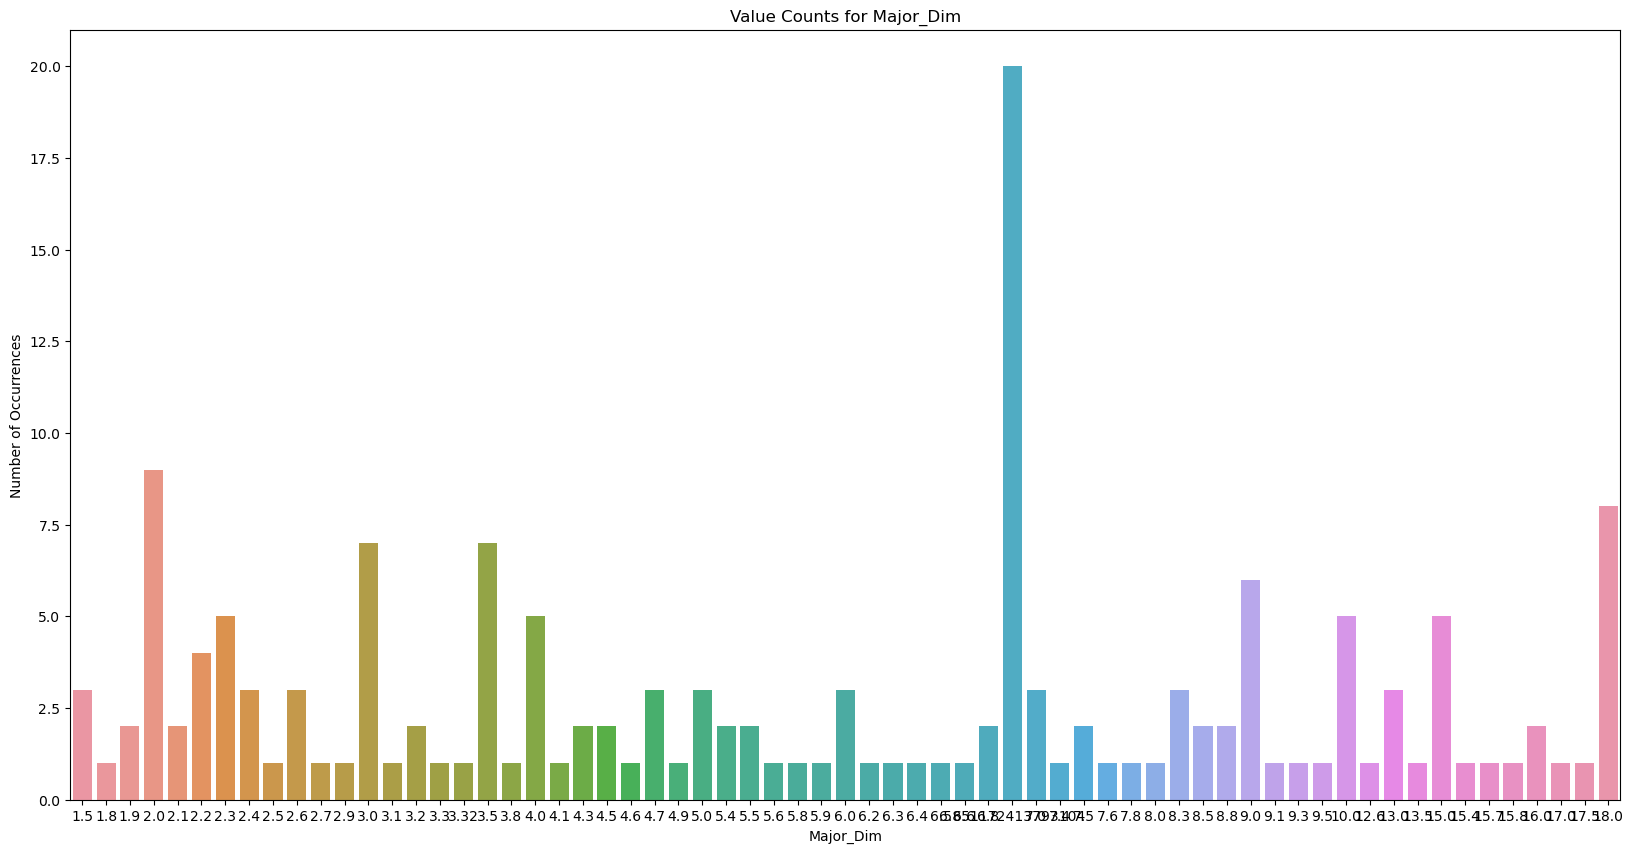

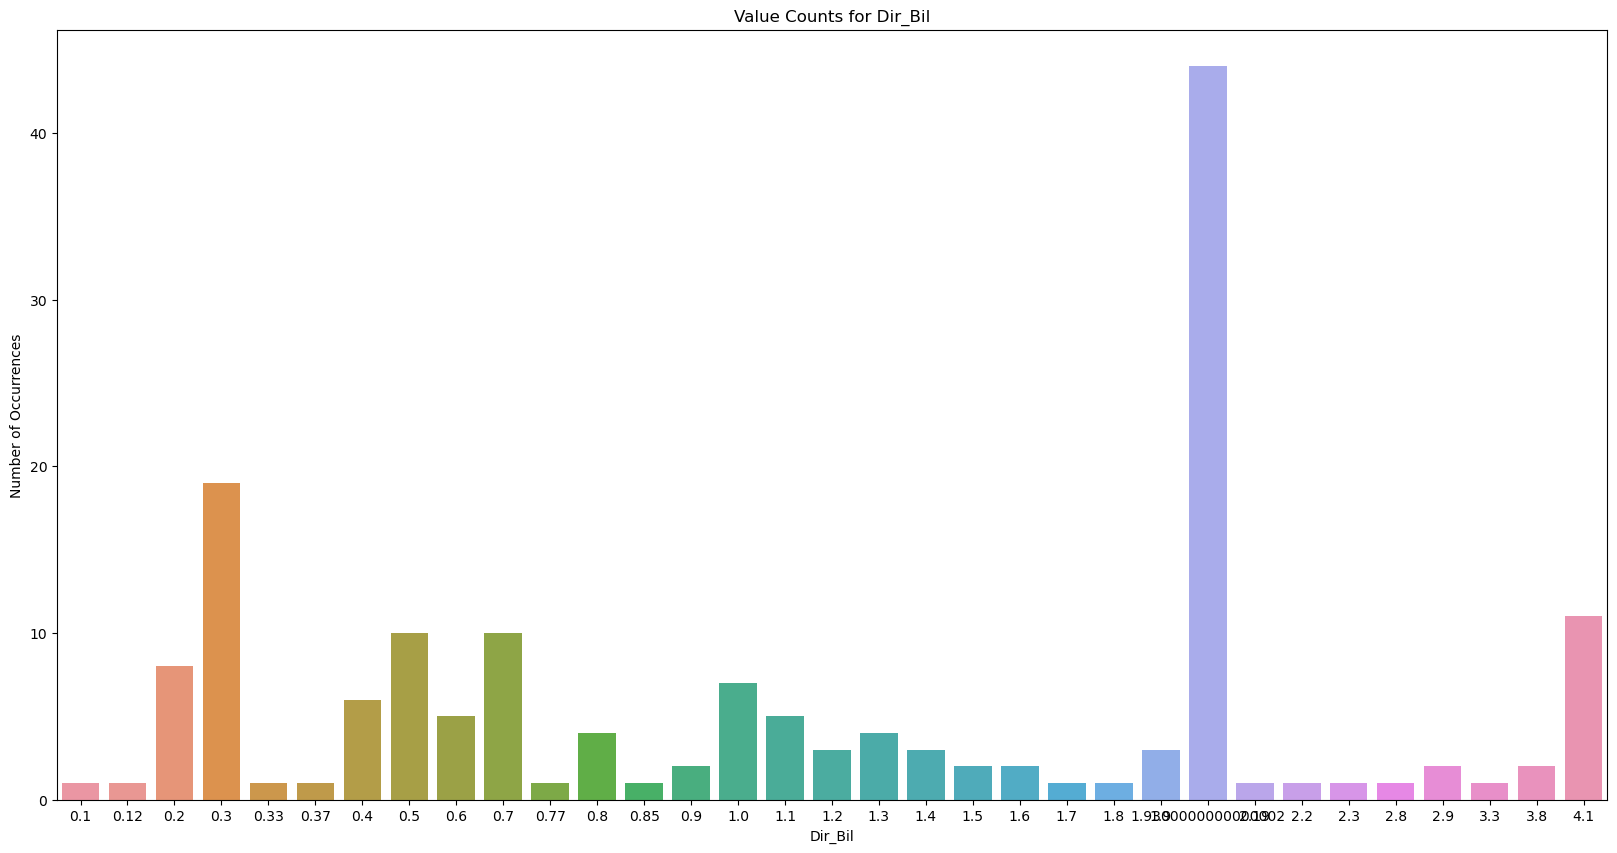

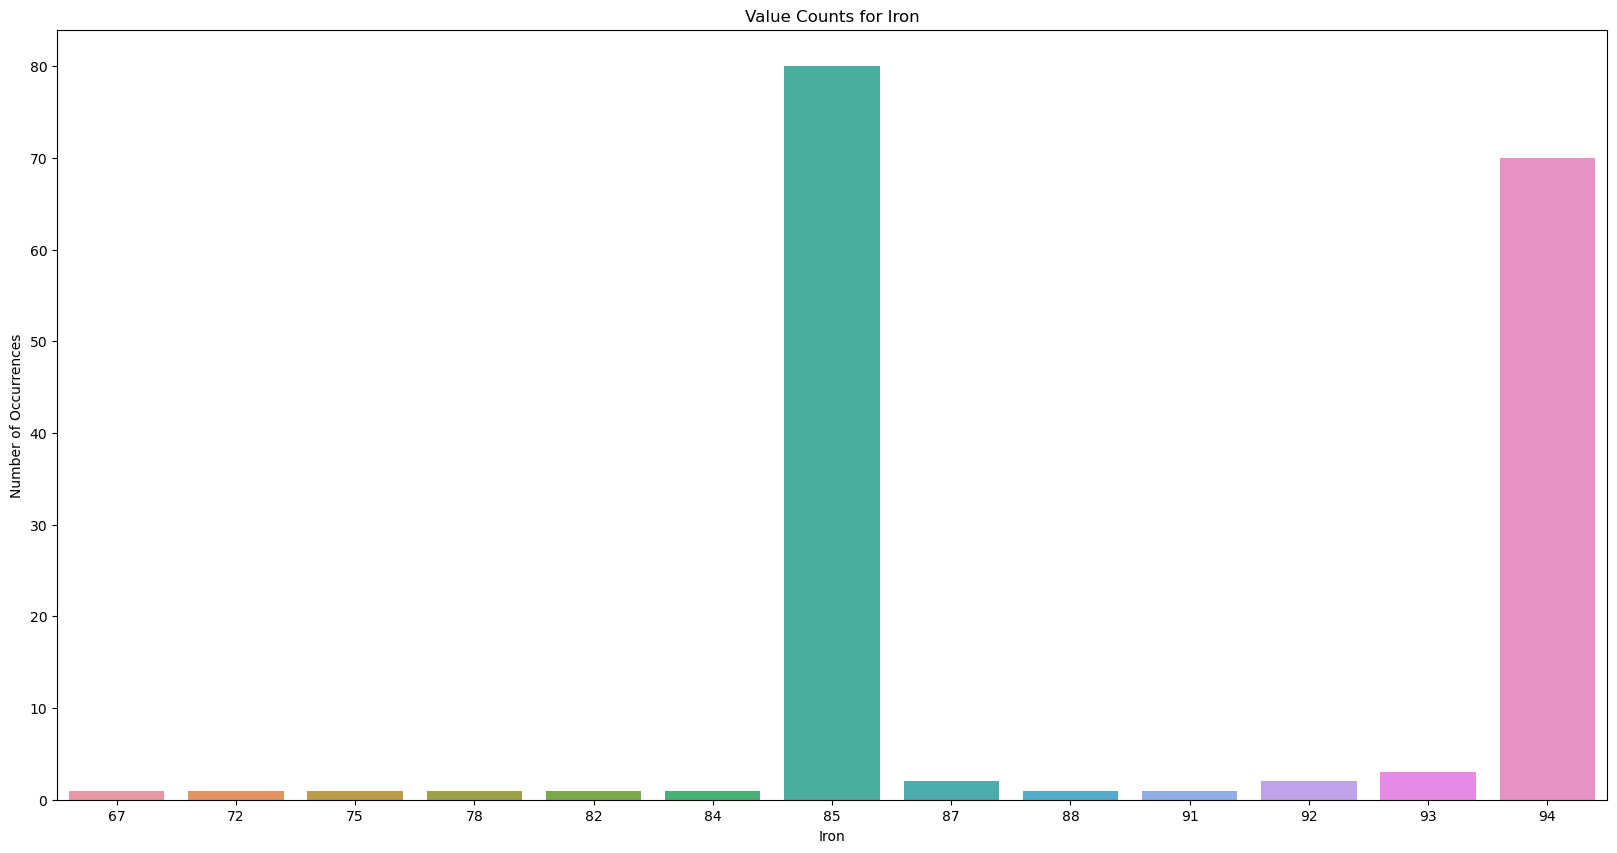

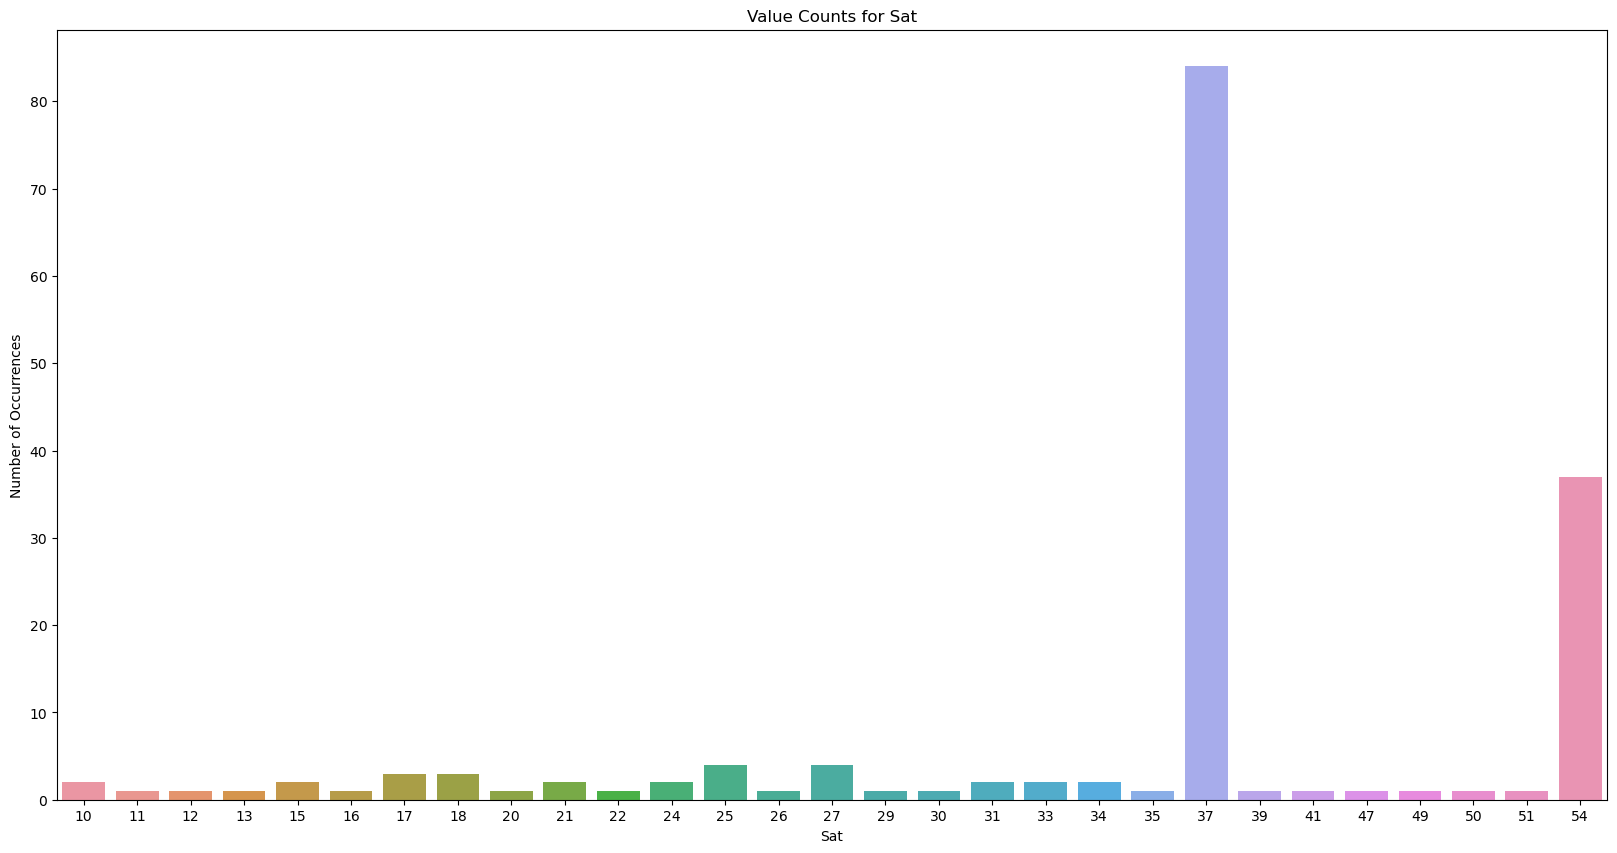

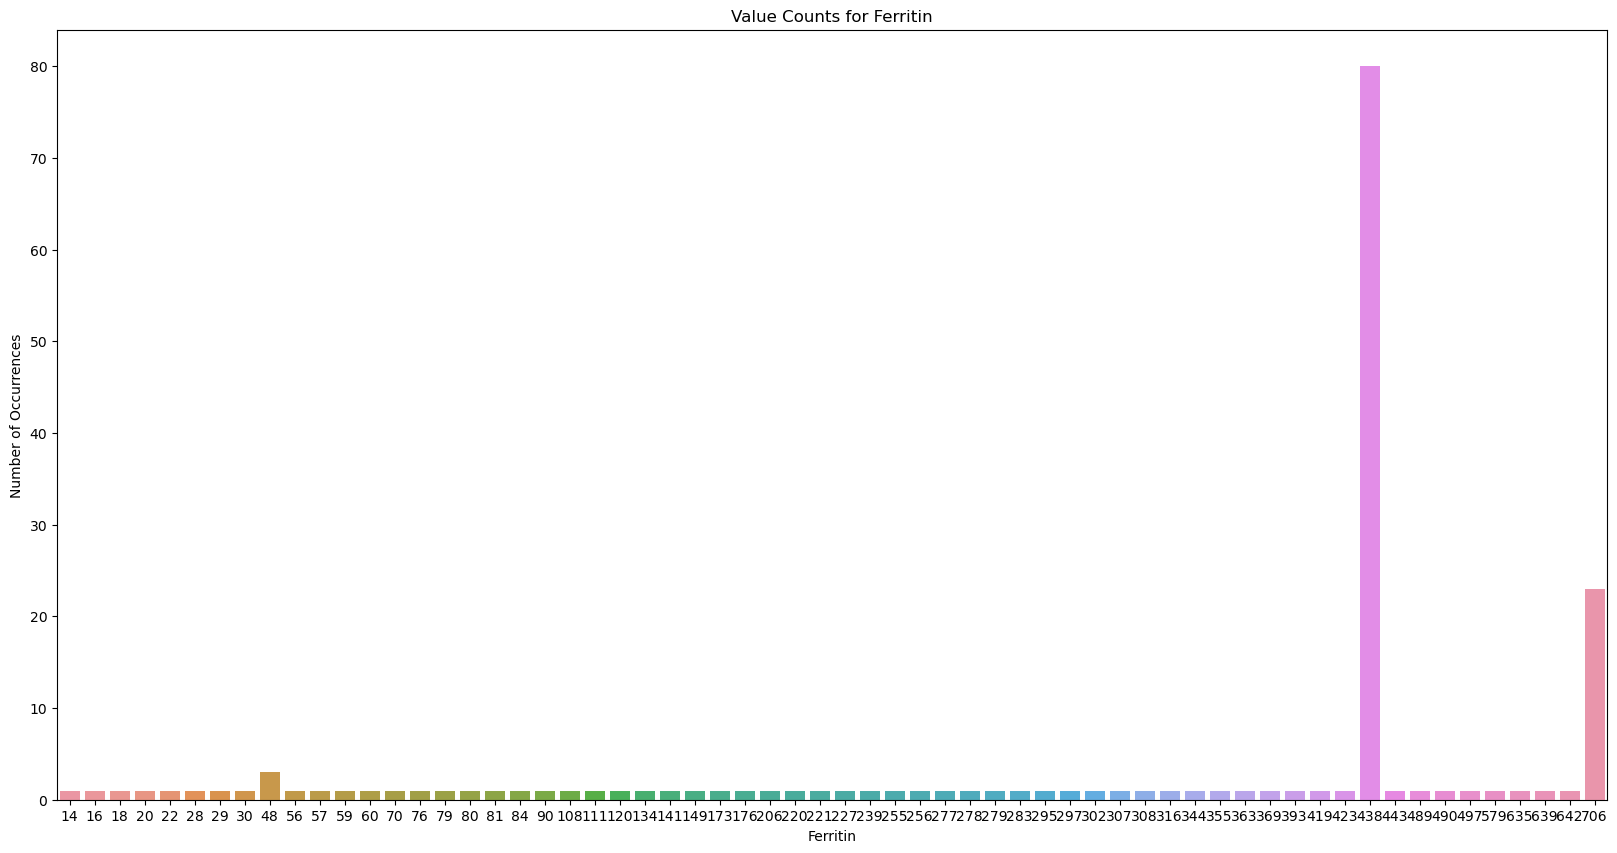

In [13]:
def replace_outliers_with_max(df, column, mult):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - mult * IQR
    upper_bound = Q3 + mult * IQR
    
    # Identify the maximum value among the non-outliers
    max_non_outlier = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column].max()
    
    # Replace outliers with the maximum non-outlier value
    df.loc[df[column] > upper_bound, column] = max_non_outlier
    df.loc[df[column] < lower_bound, column] = max_non_outlier
    # Print the interval
    print(f"{column}:\n  Lower Bound: {lower_bound}\n  Upper Bound: {upper_bound}\n")
# Apply the function to each column in the DataFrame
for column in nf_clean.columns:
    replace_outliers_with_max(nf_clean, column, 1.75)

# Display the updated DataFrame
nf_clean.hist(figsize=(20,10), bins=60)

for column in nf_clean.columns:
    value_counts = nf_clean[column].value_counts().sort_index()

    # Plot the value counts
    plt.figure(figsize=(20, 10))
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f"Value Counts for {column}")
    plt.xlabel(column)
    plt.ylabel("Number of Occurrences")
    plt.show()

In [14]:
sf = pd.DataFrame(string_data)
sf = sf.replace("?",np.nan)

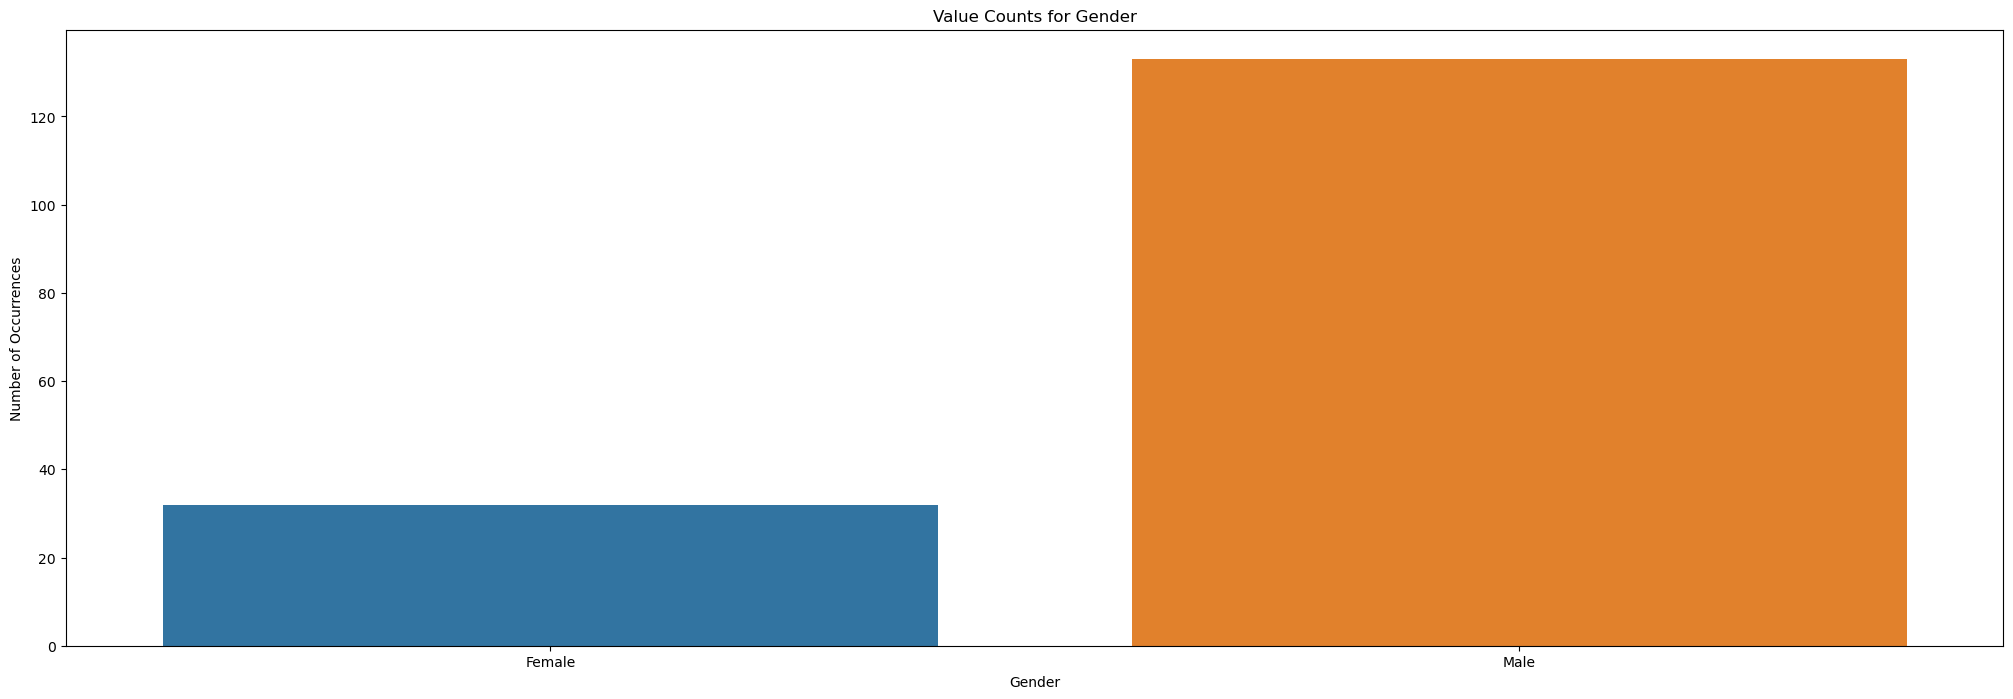

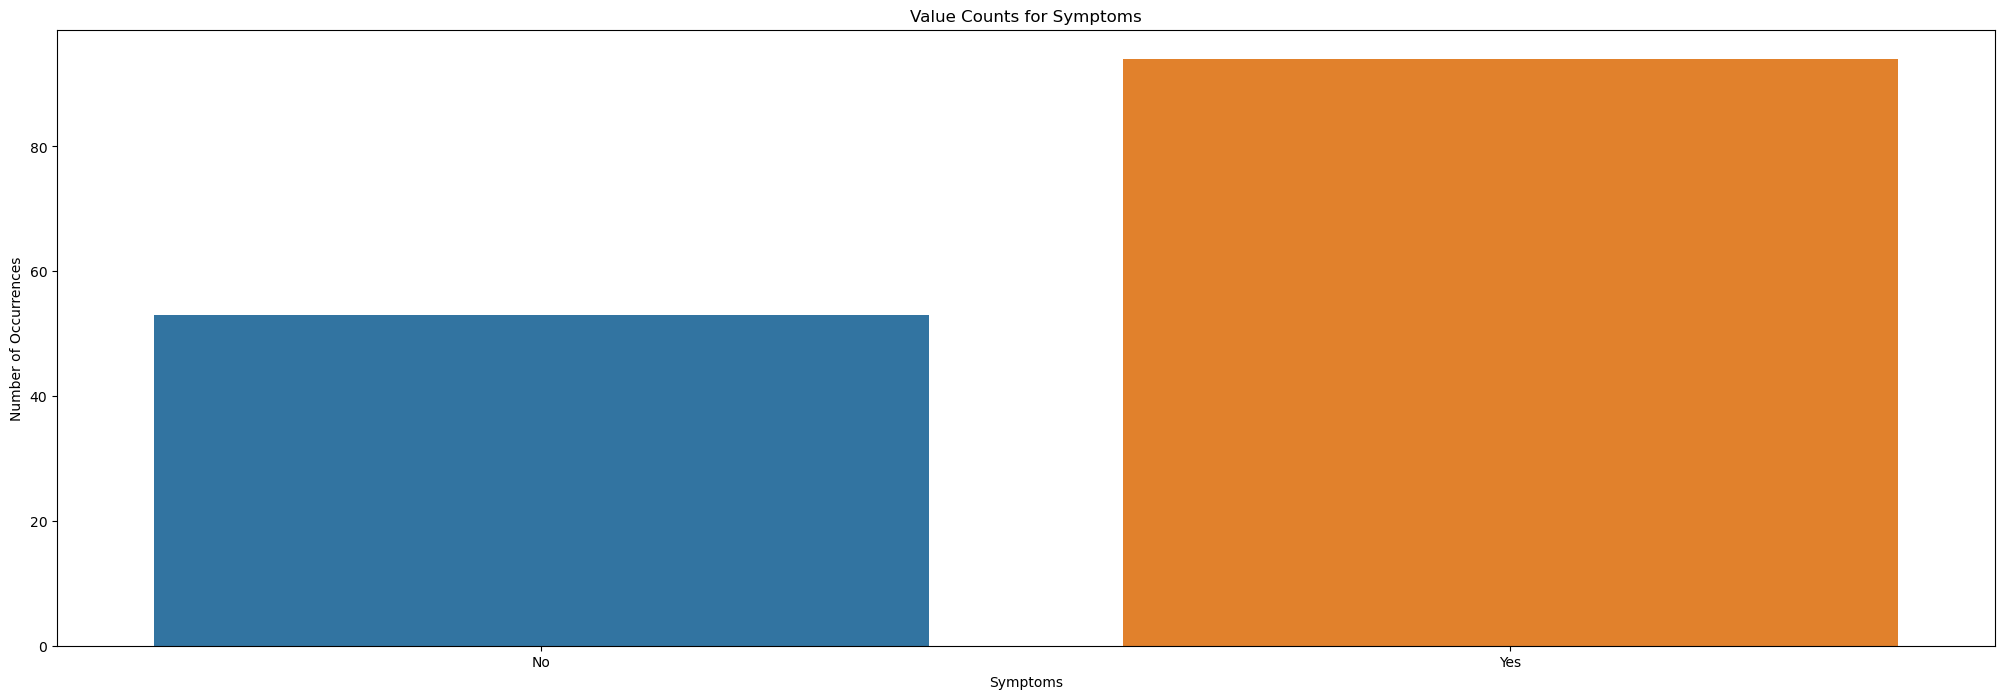

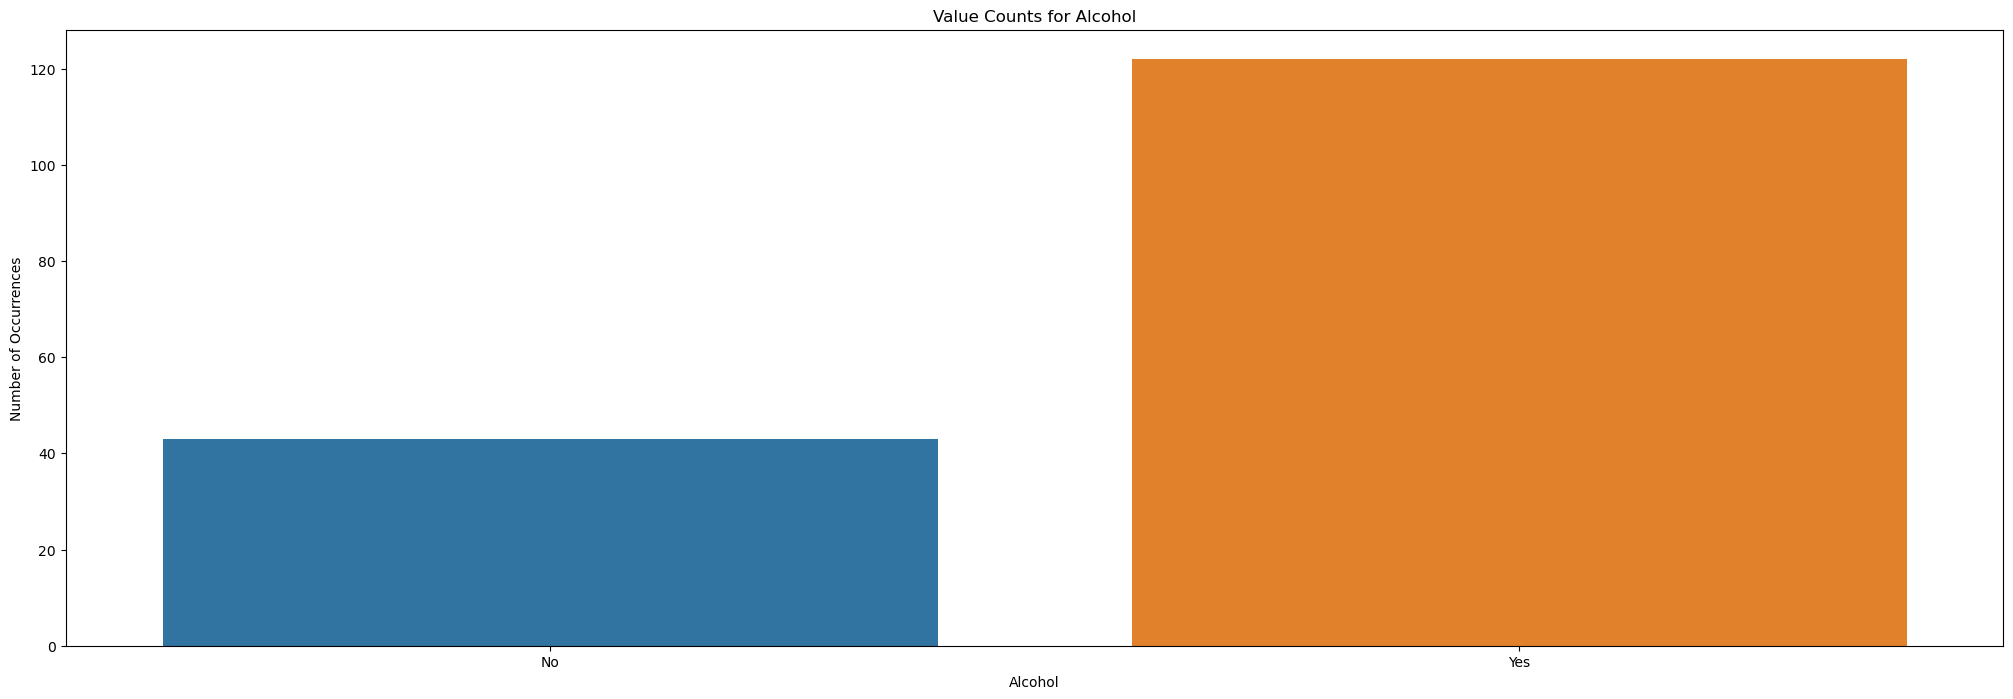

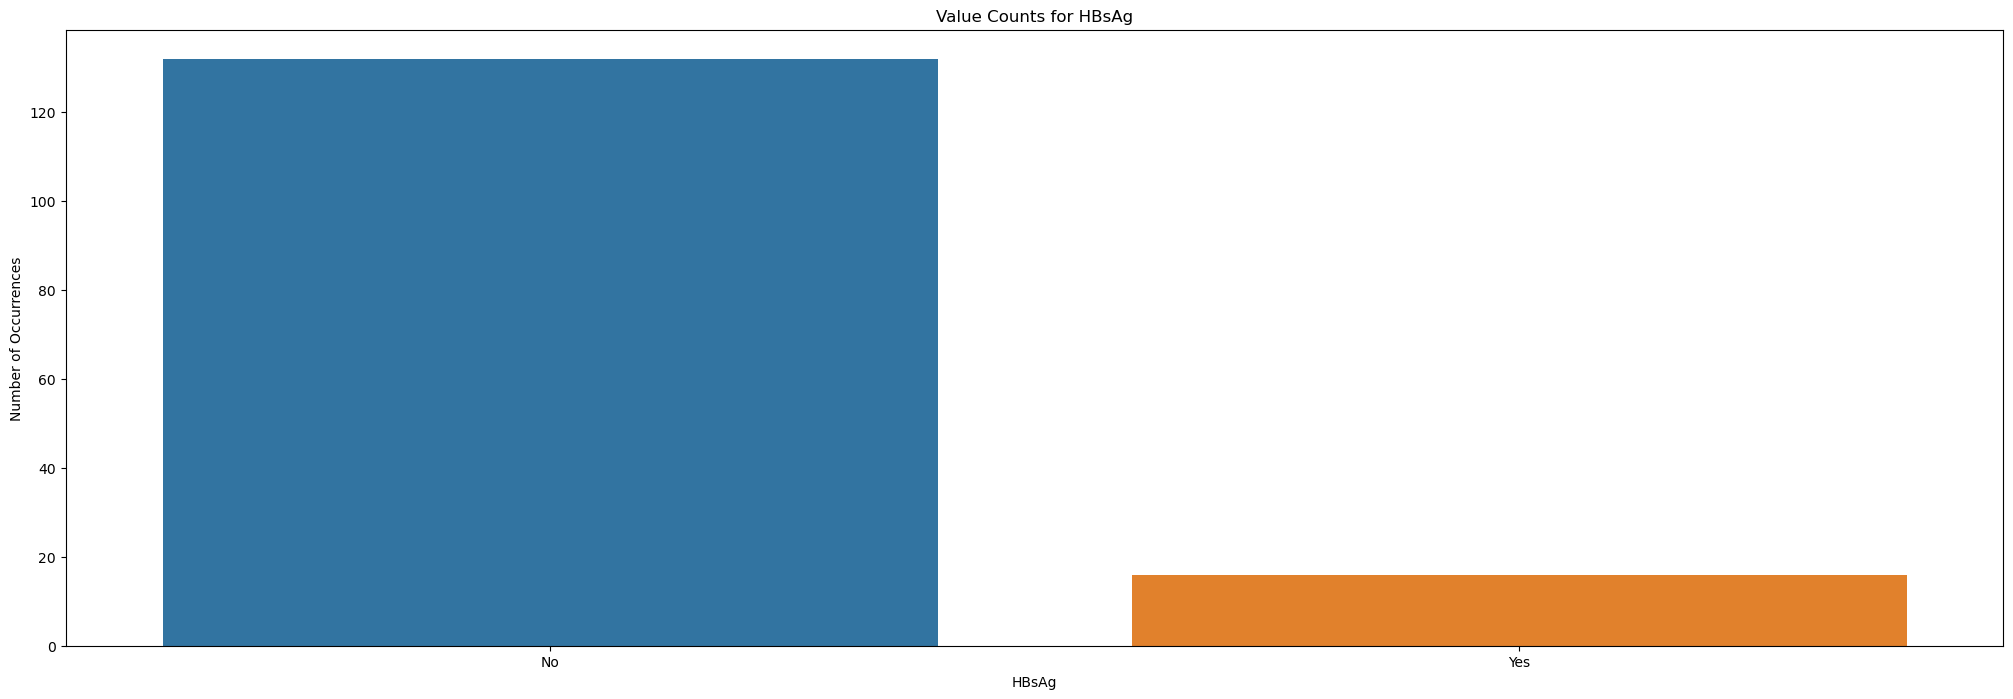

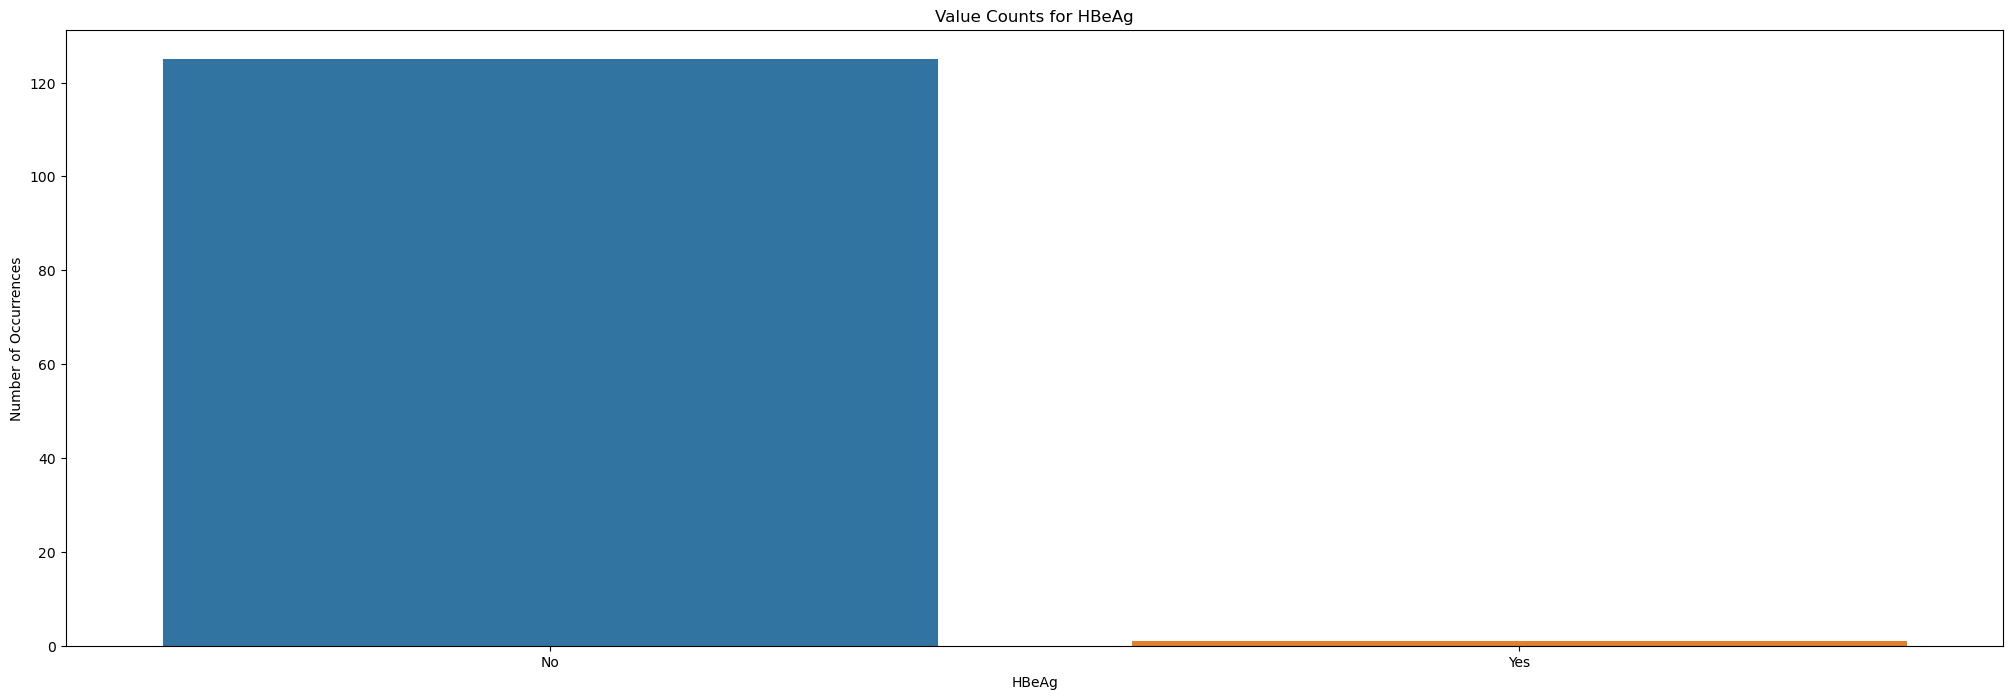

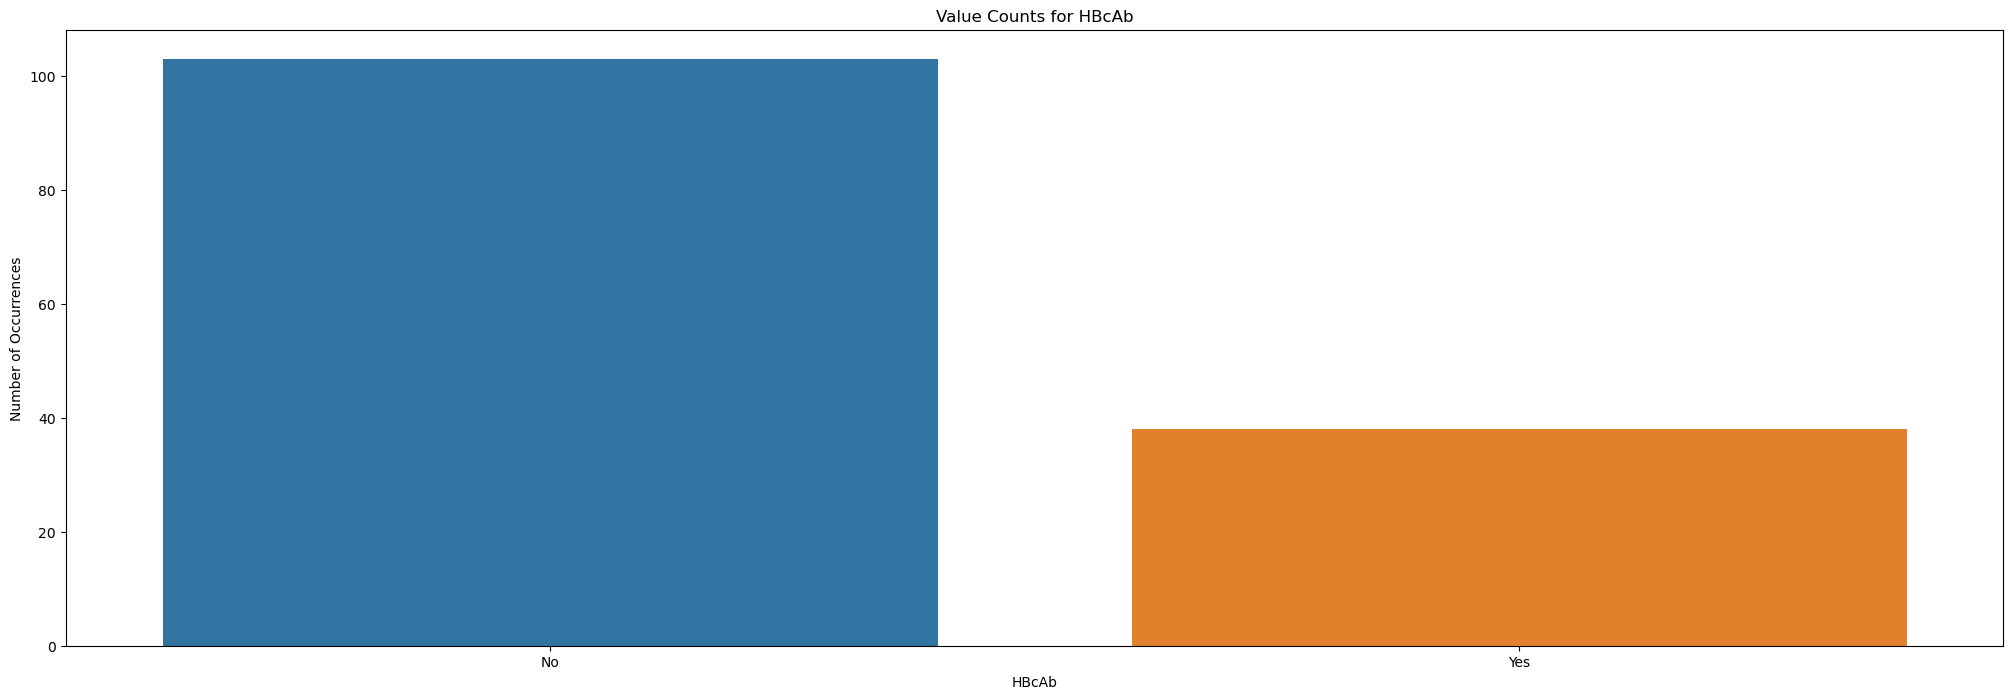

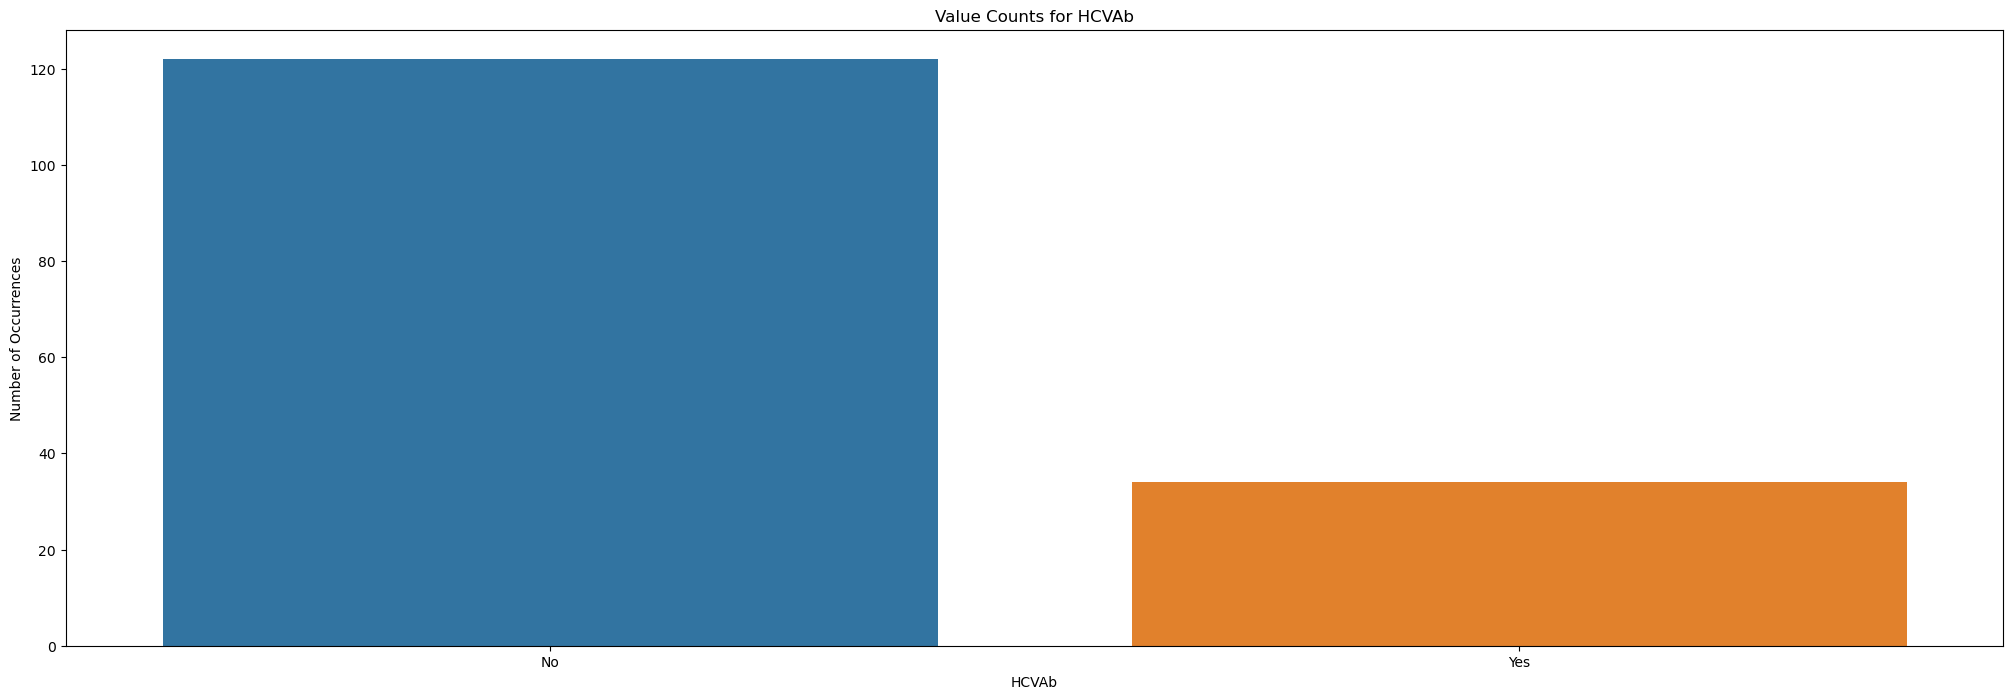

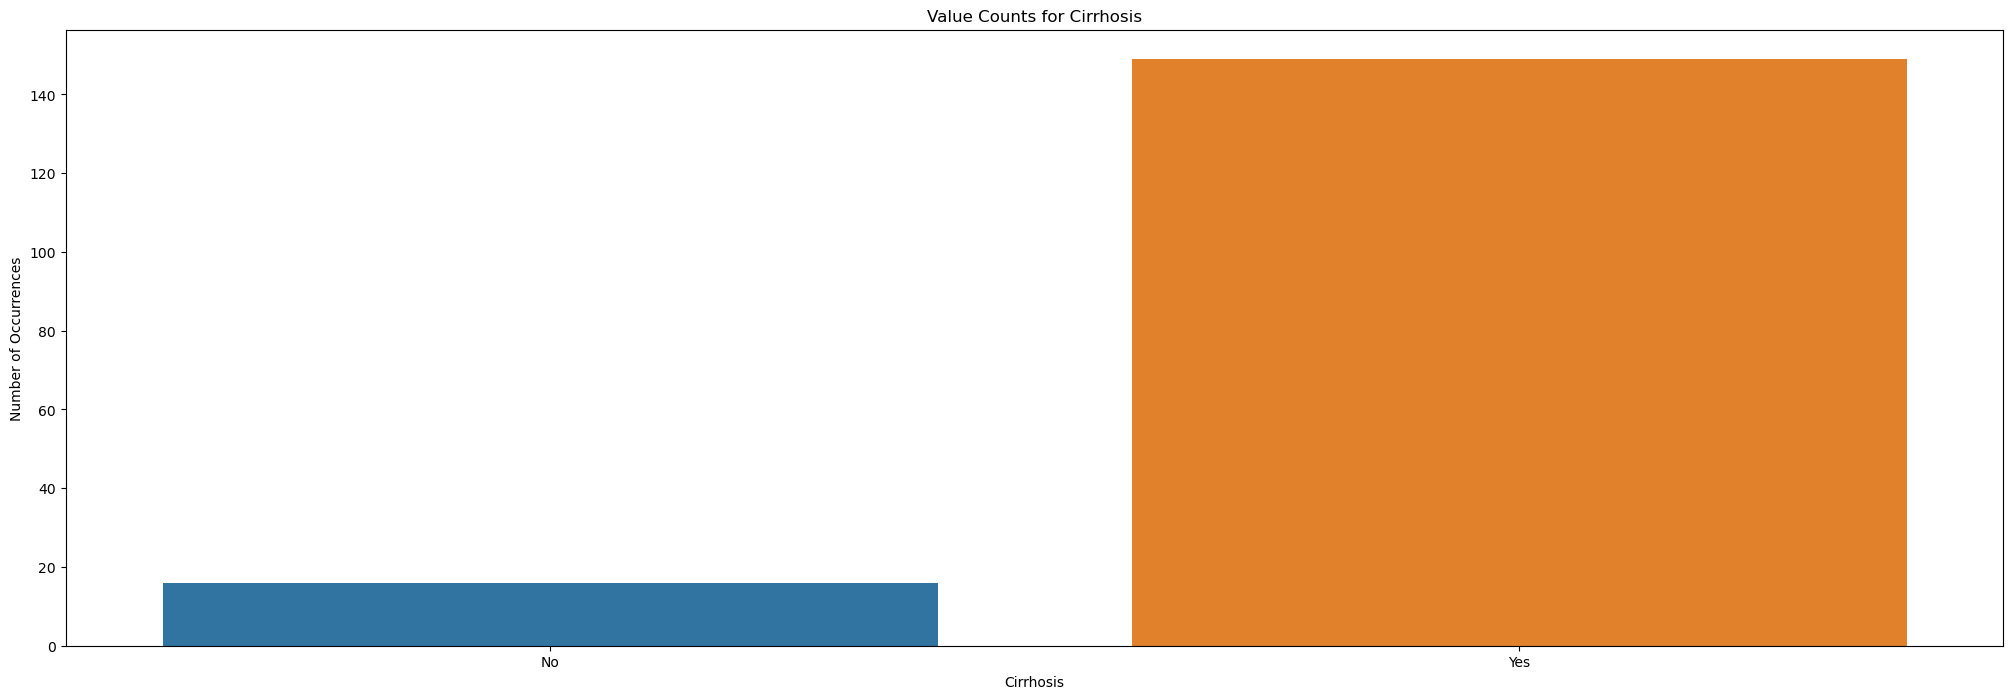

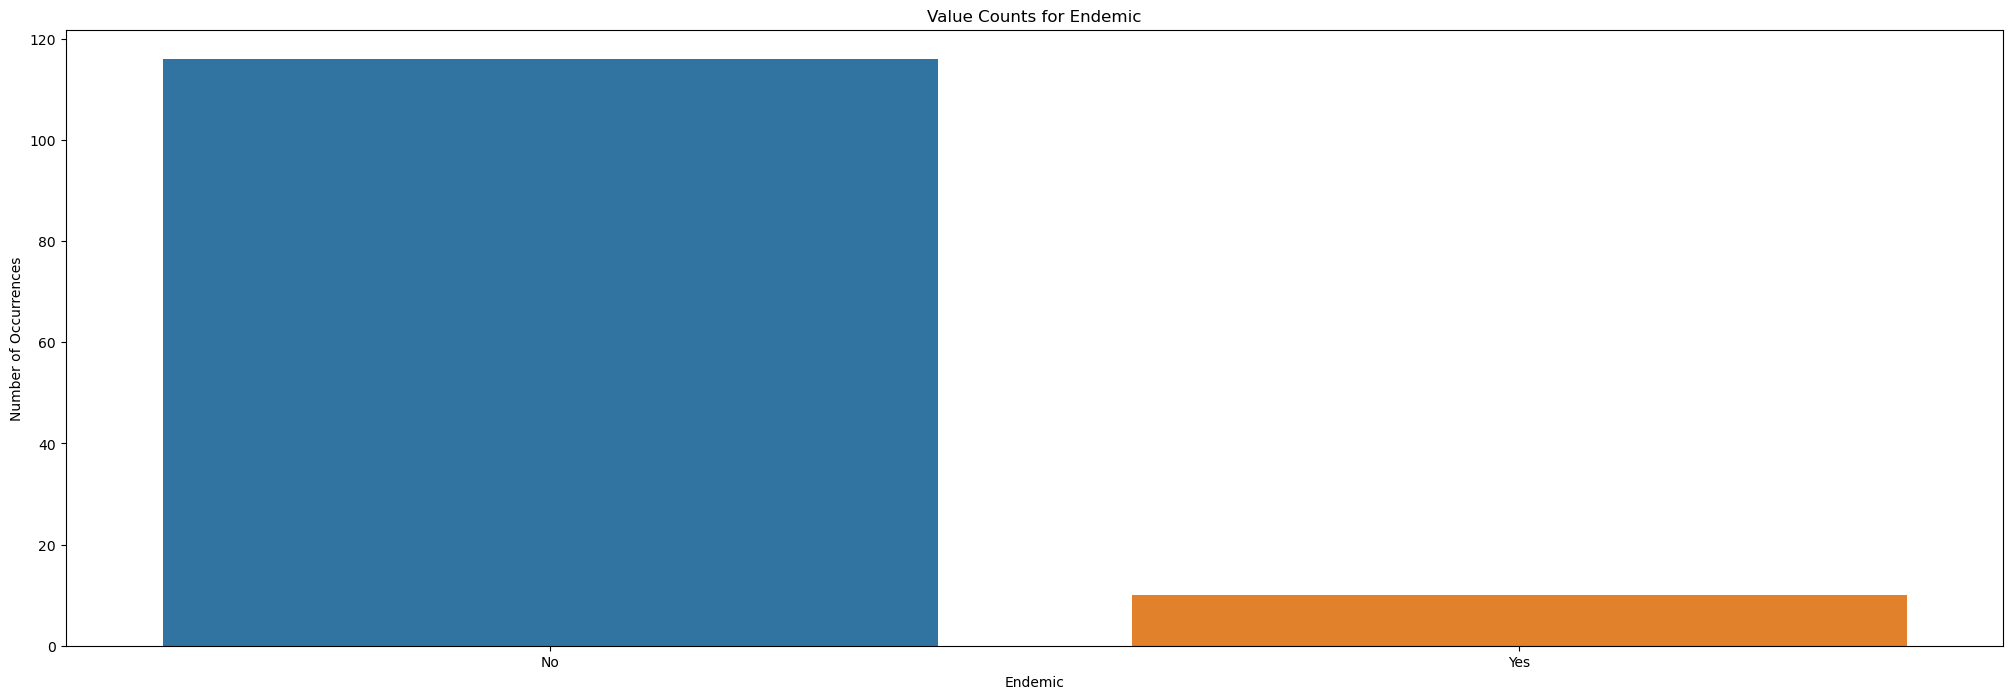

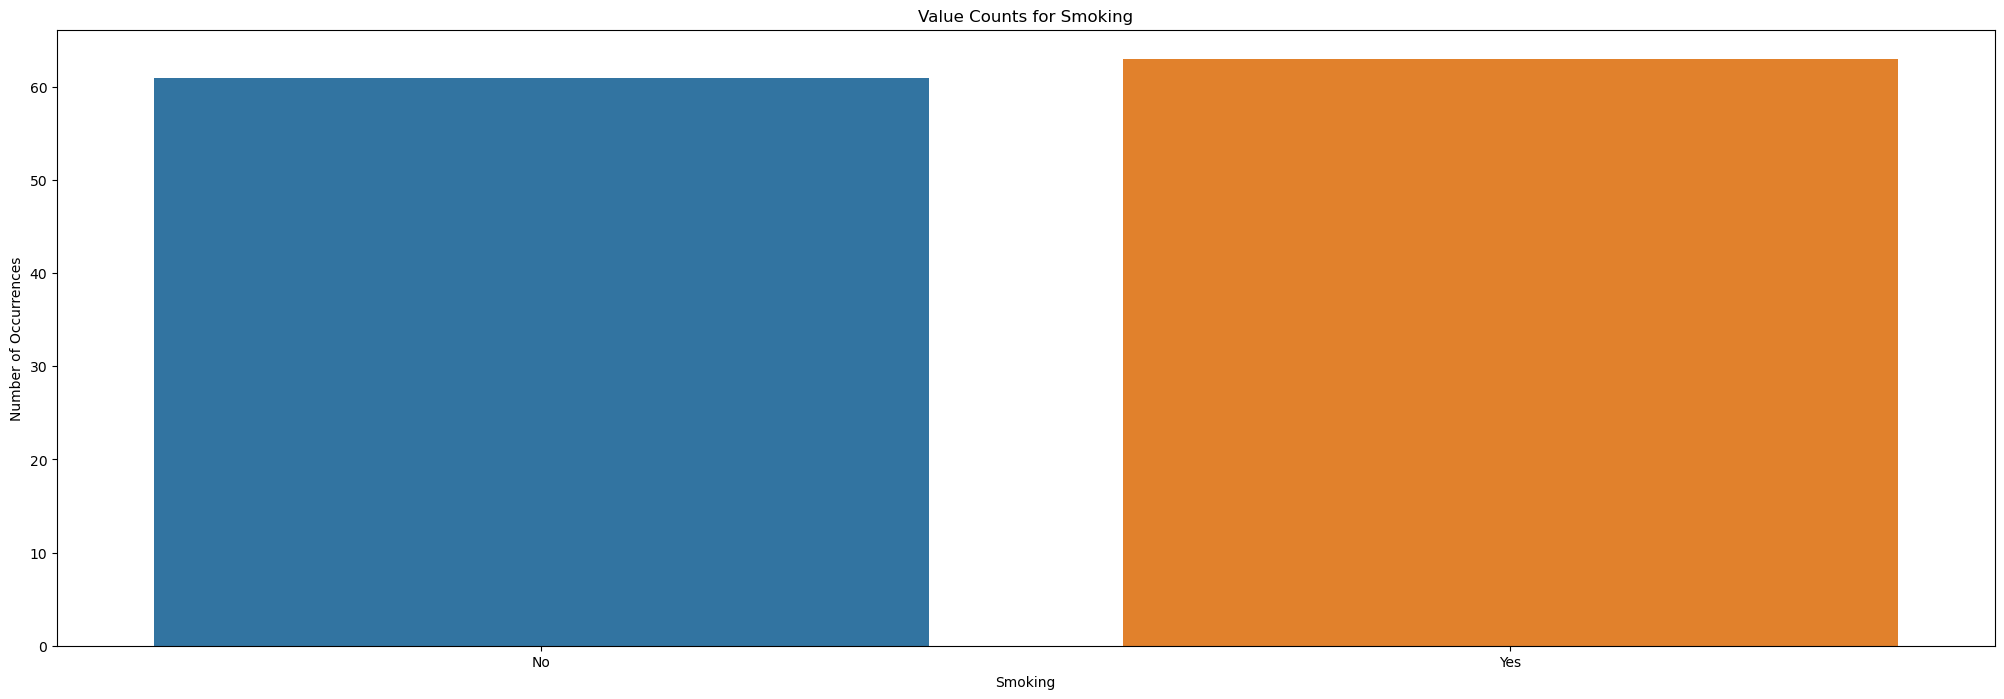

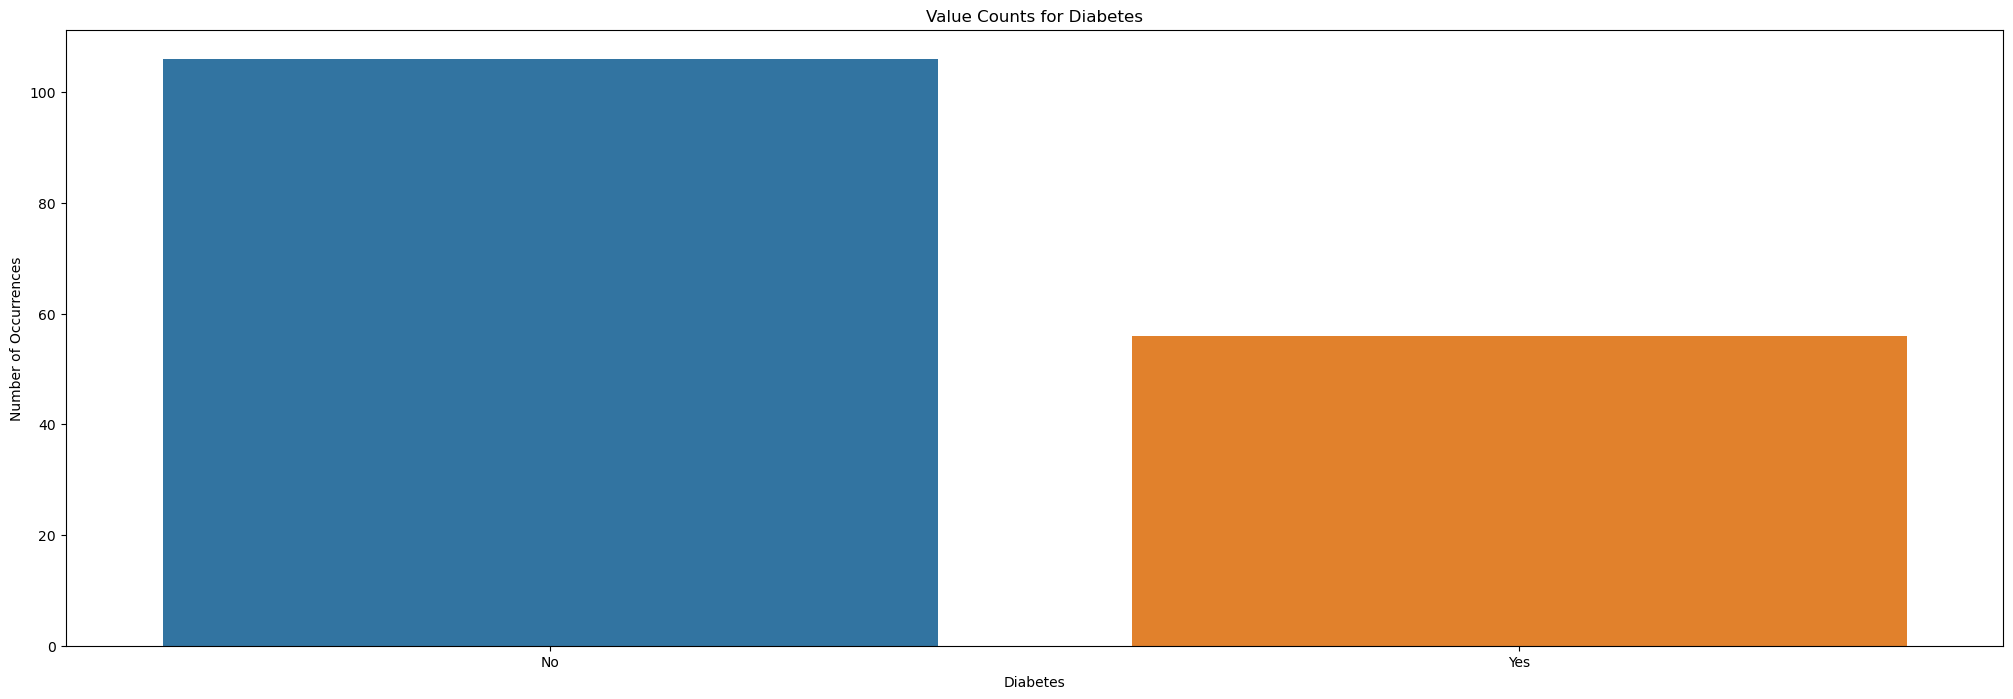

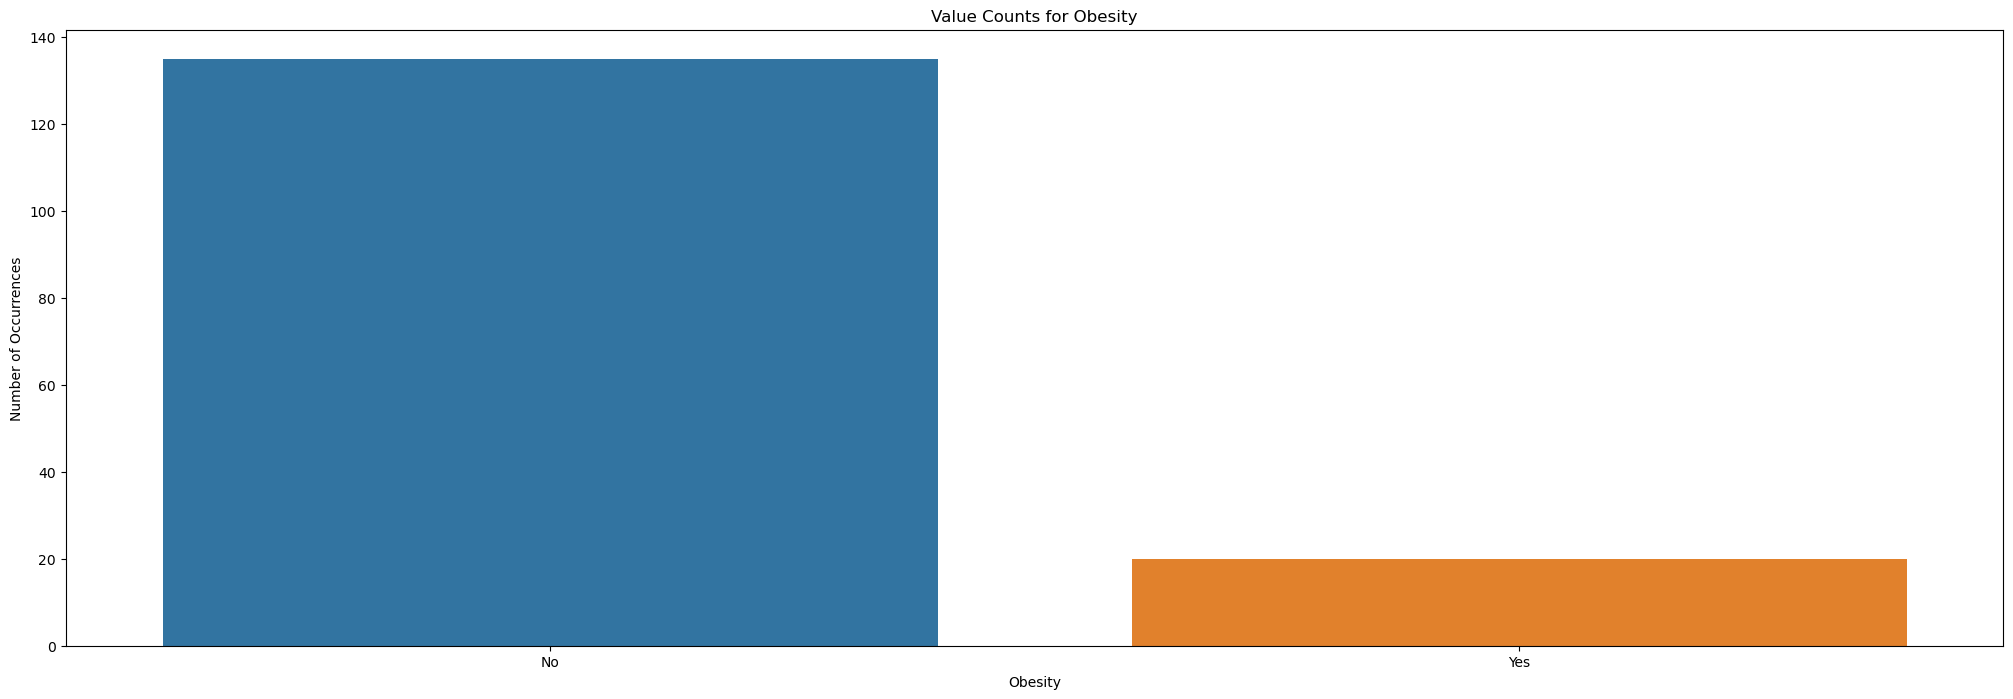

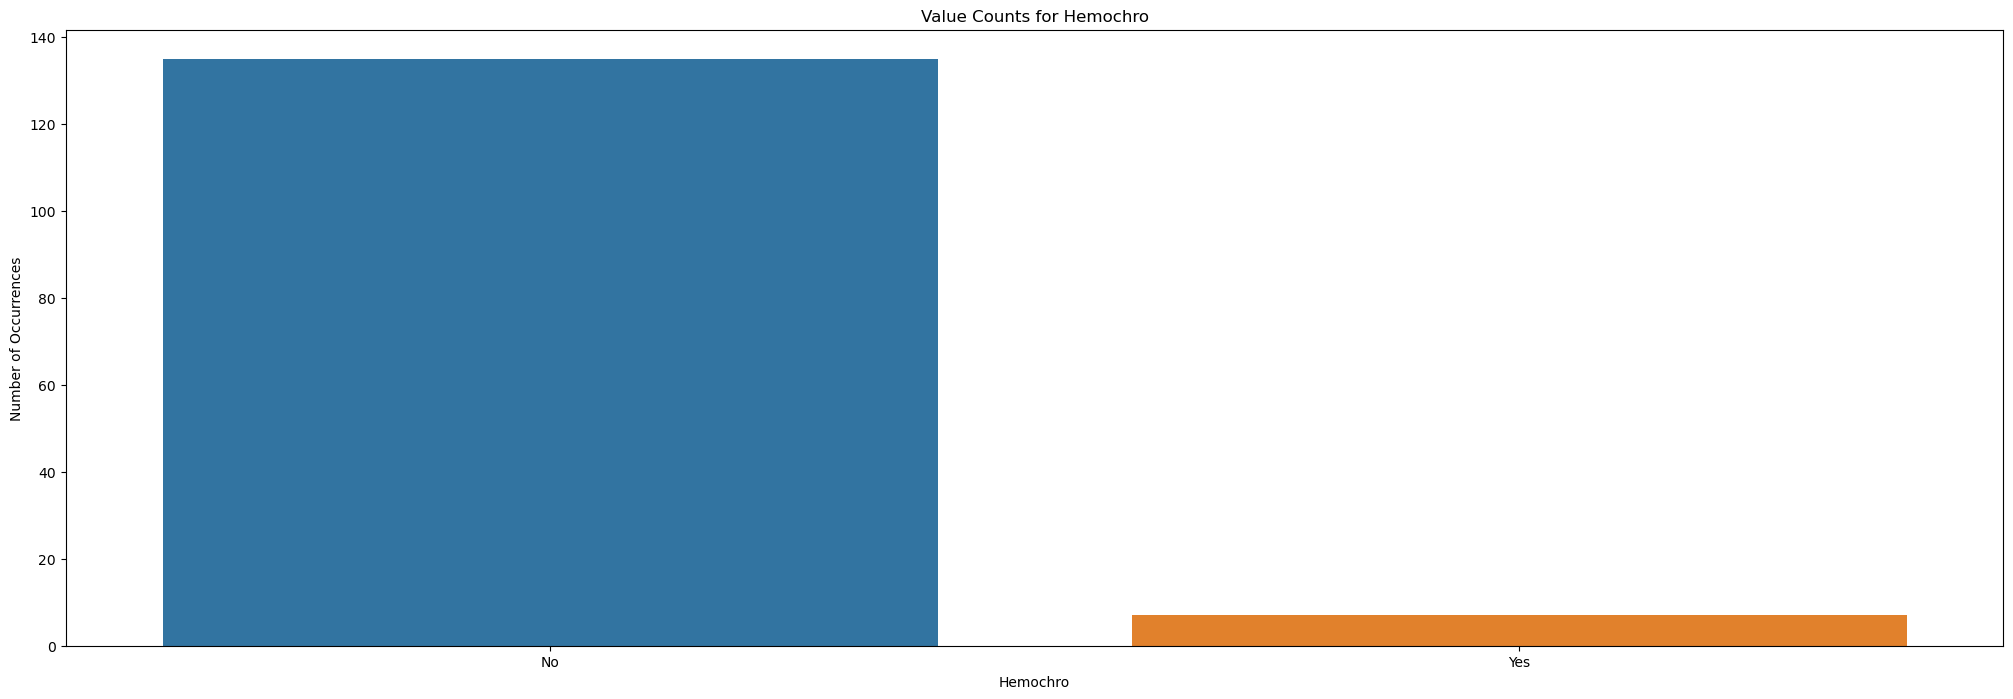

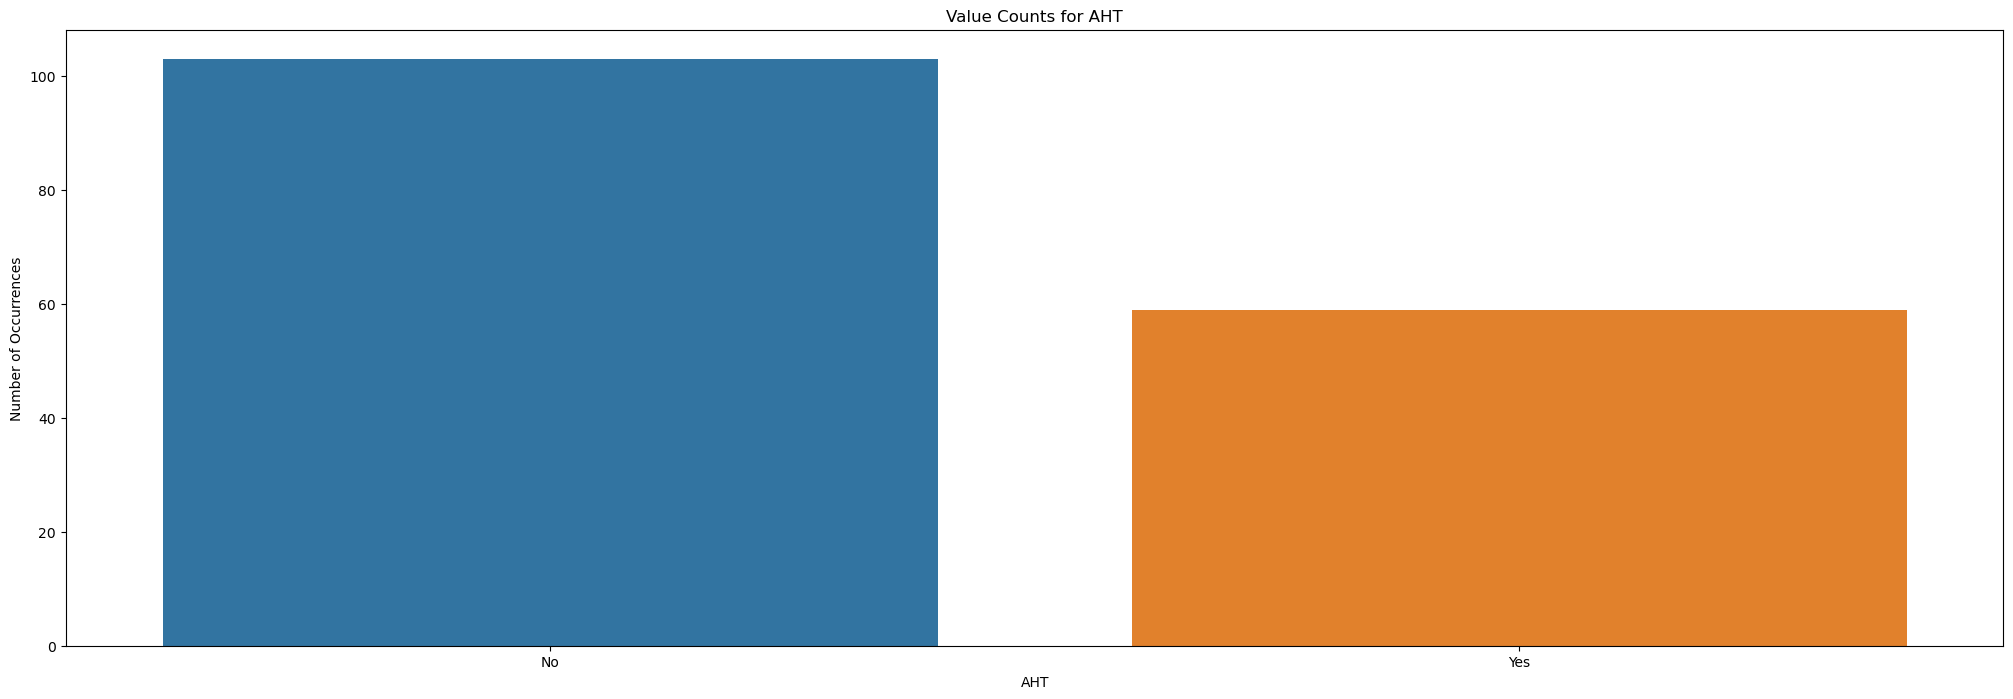

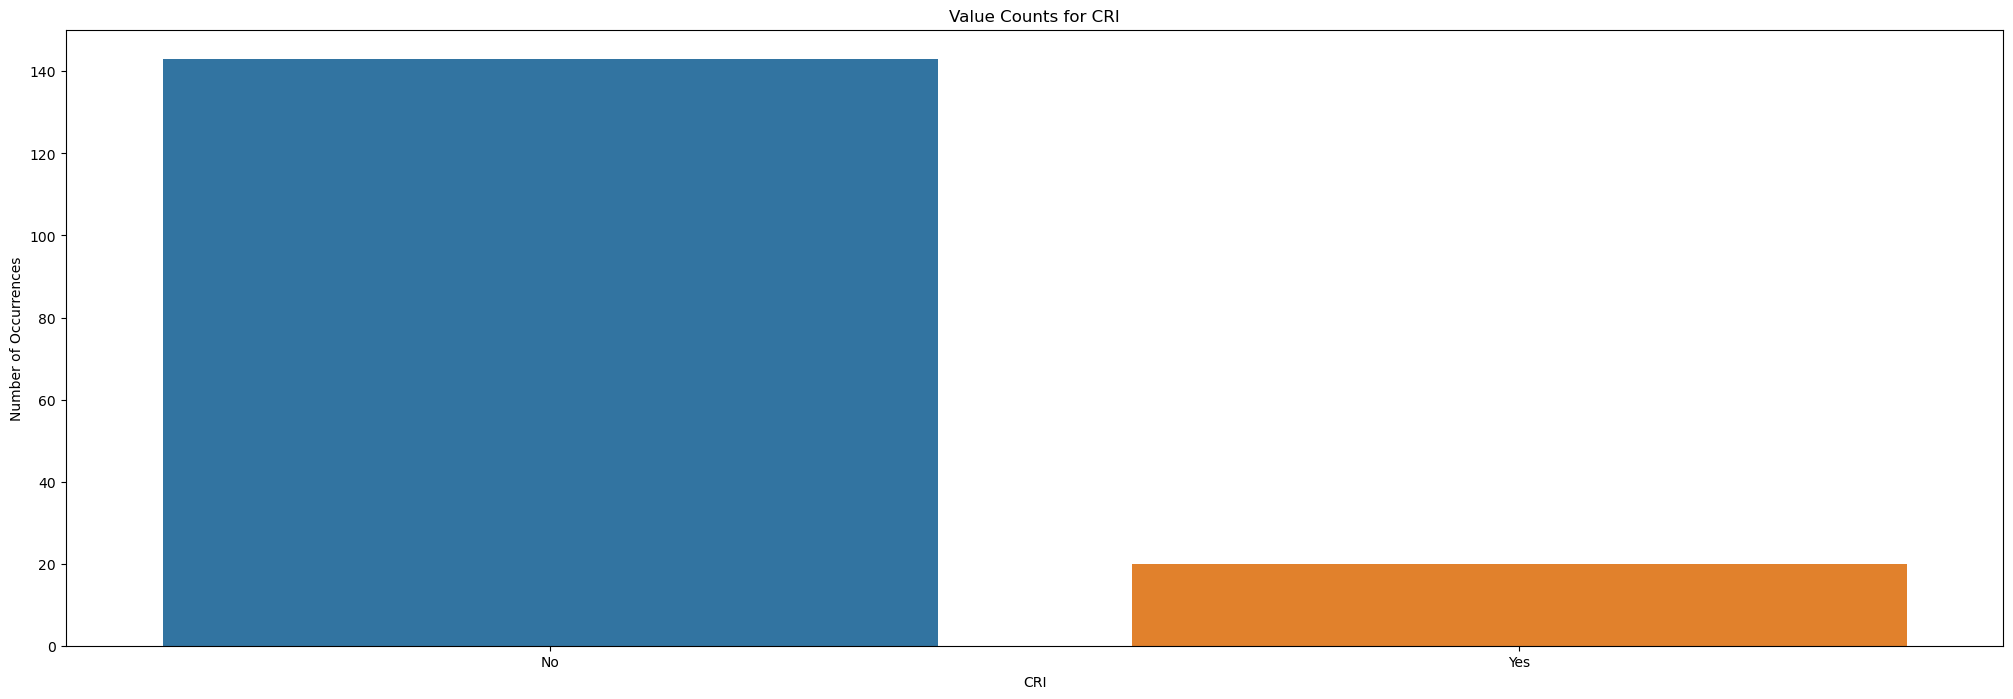

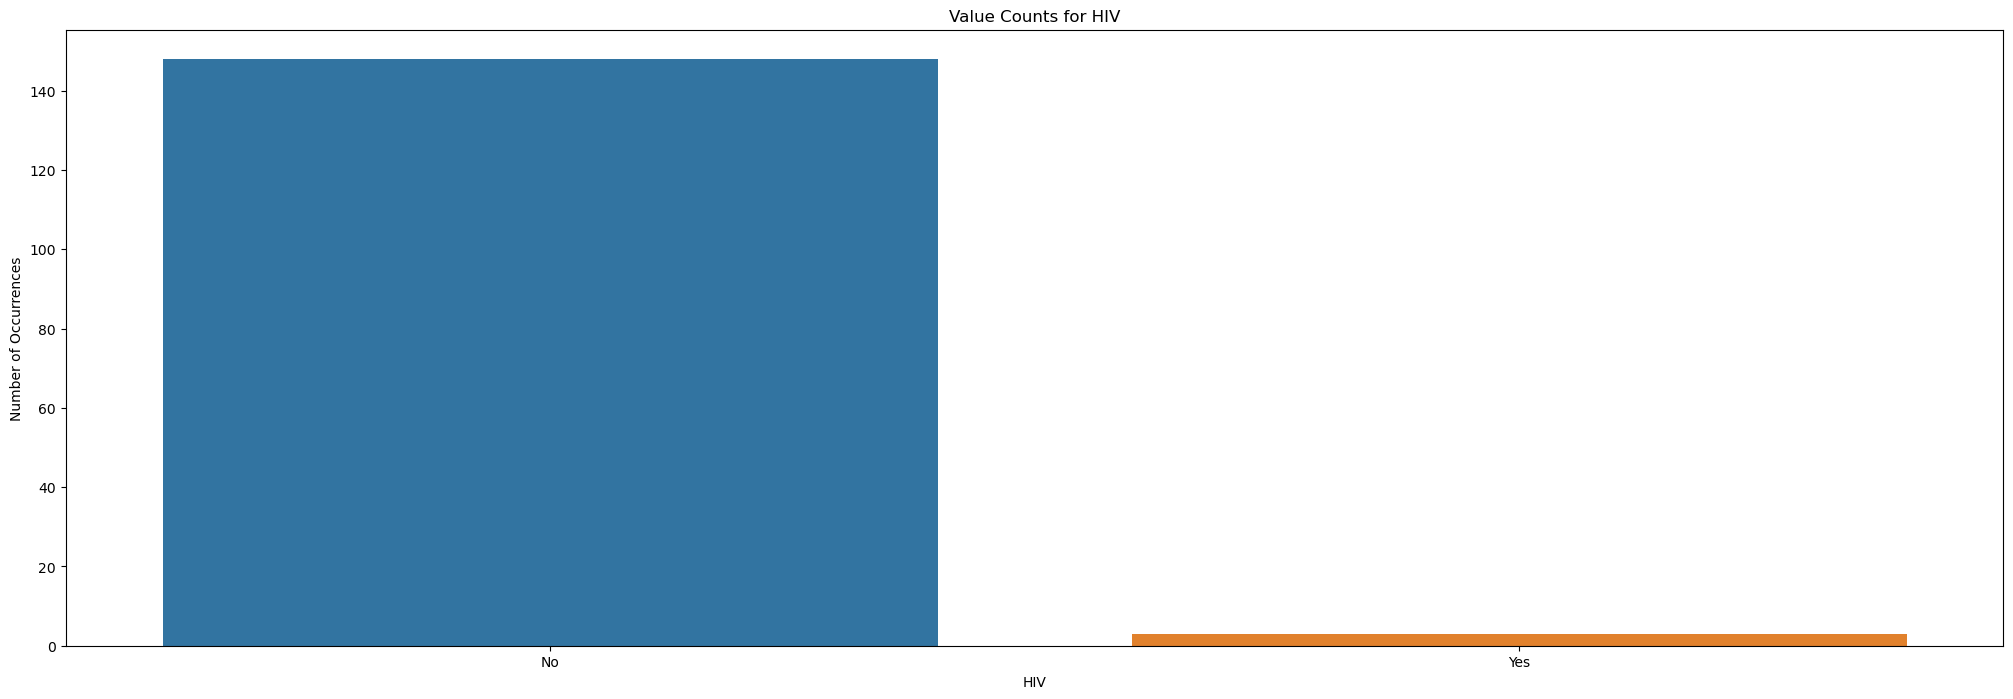

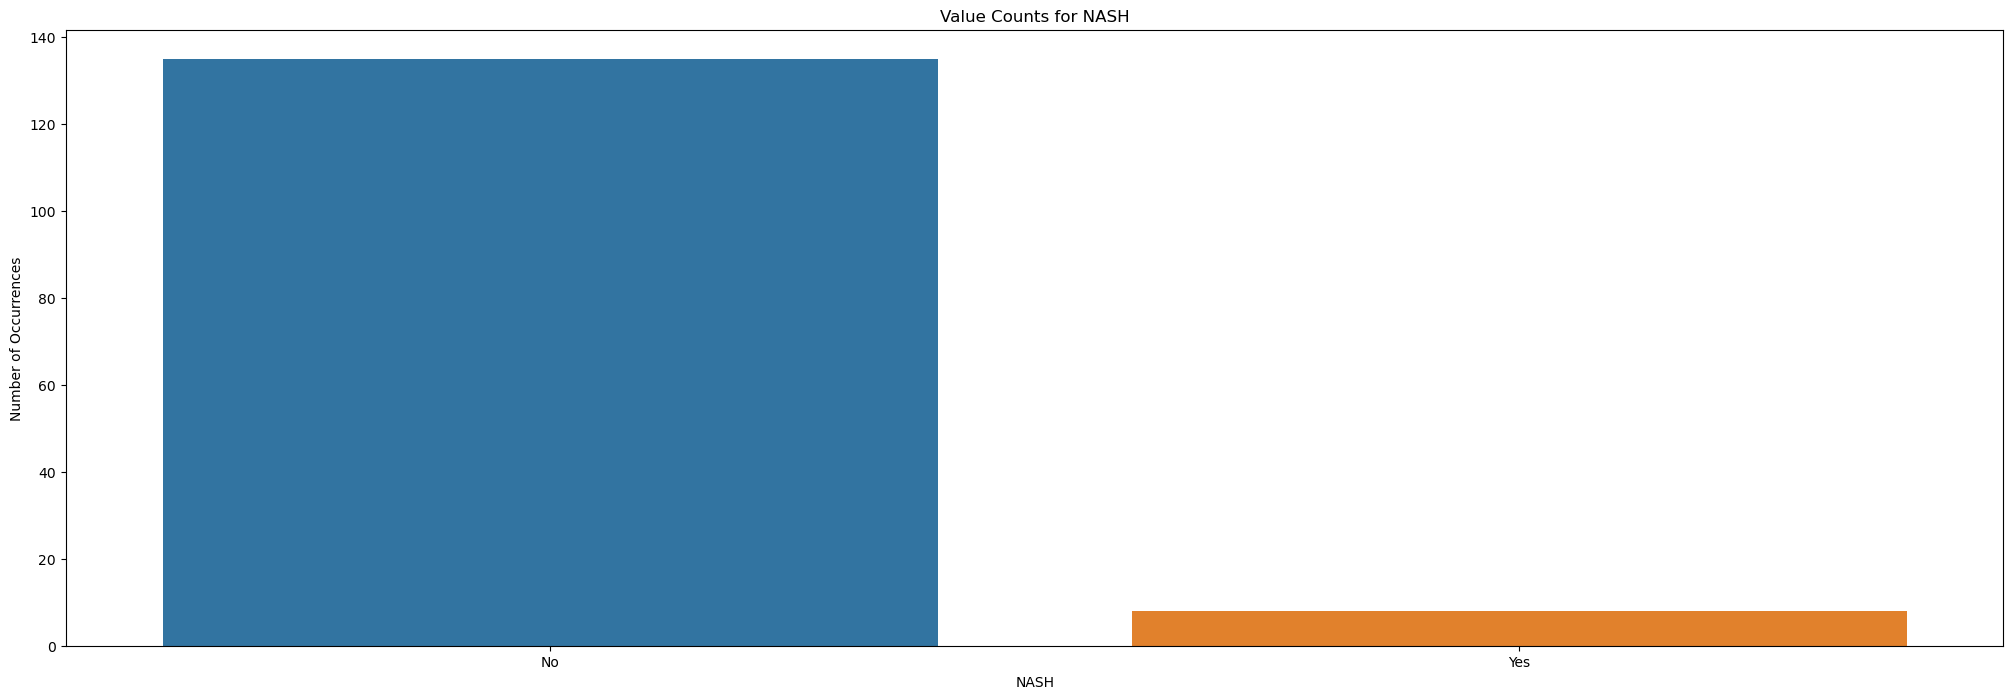

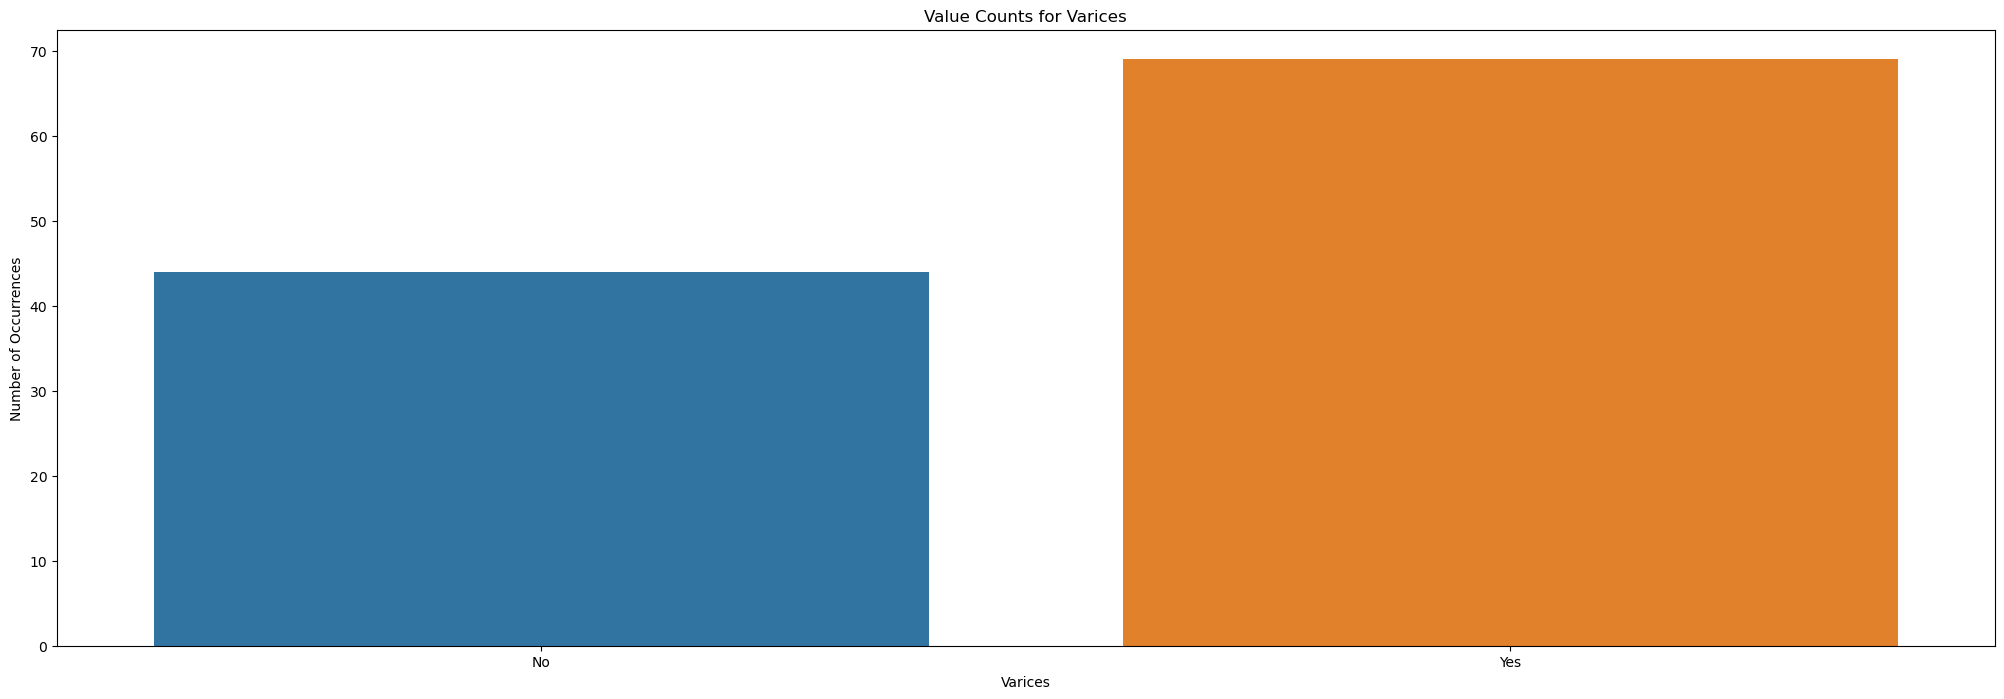

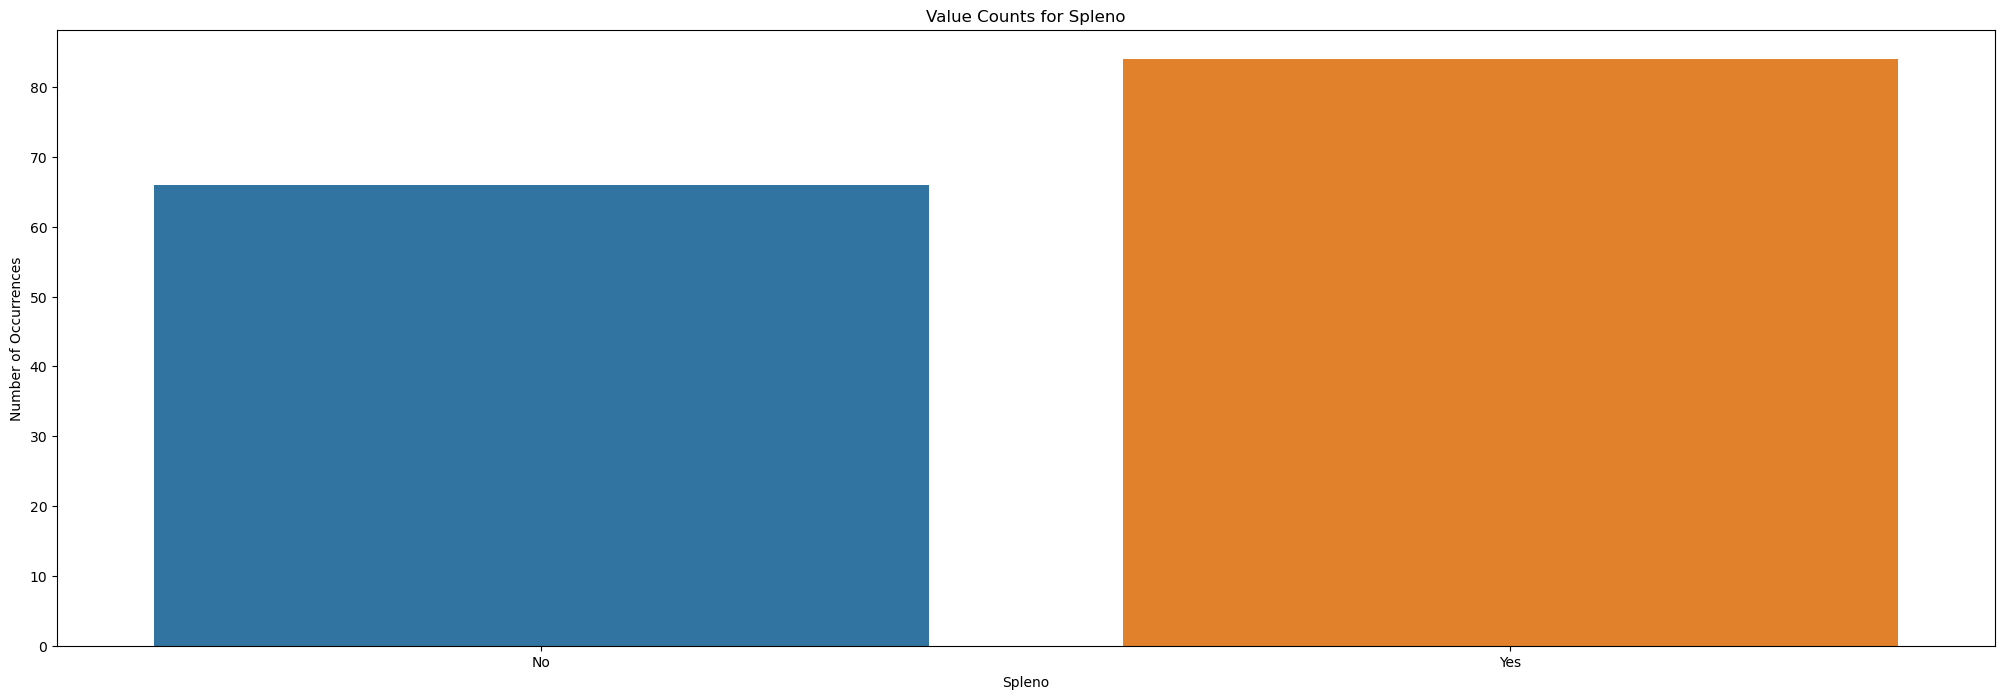

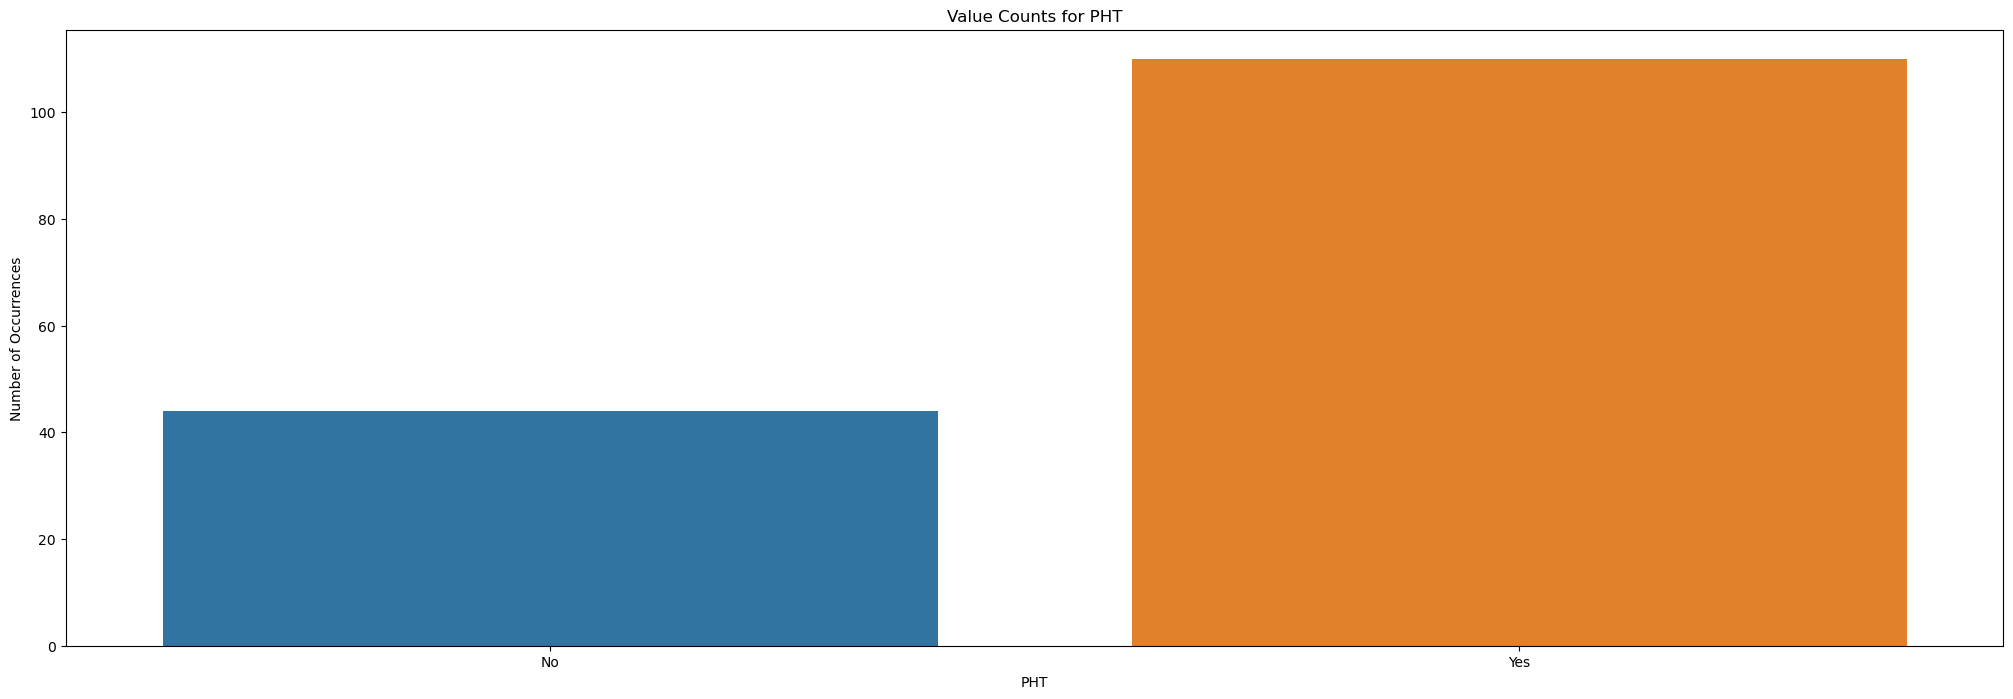

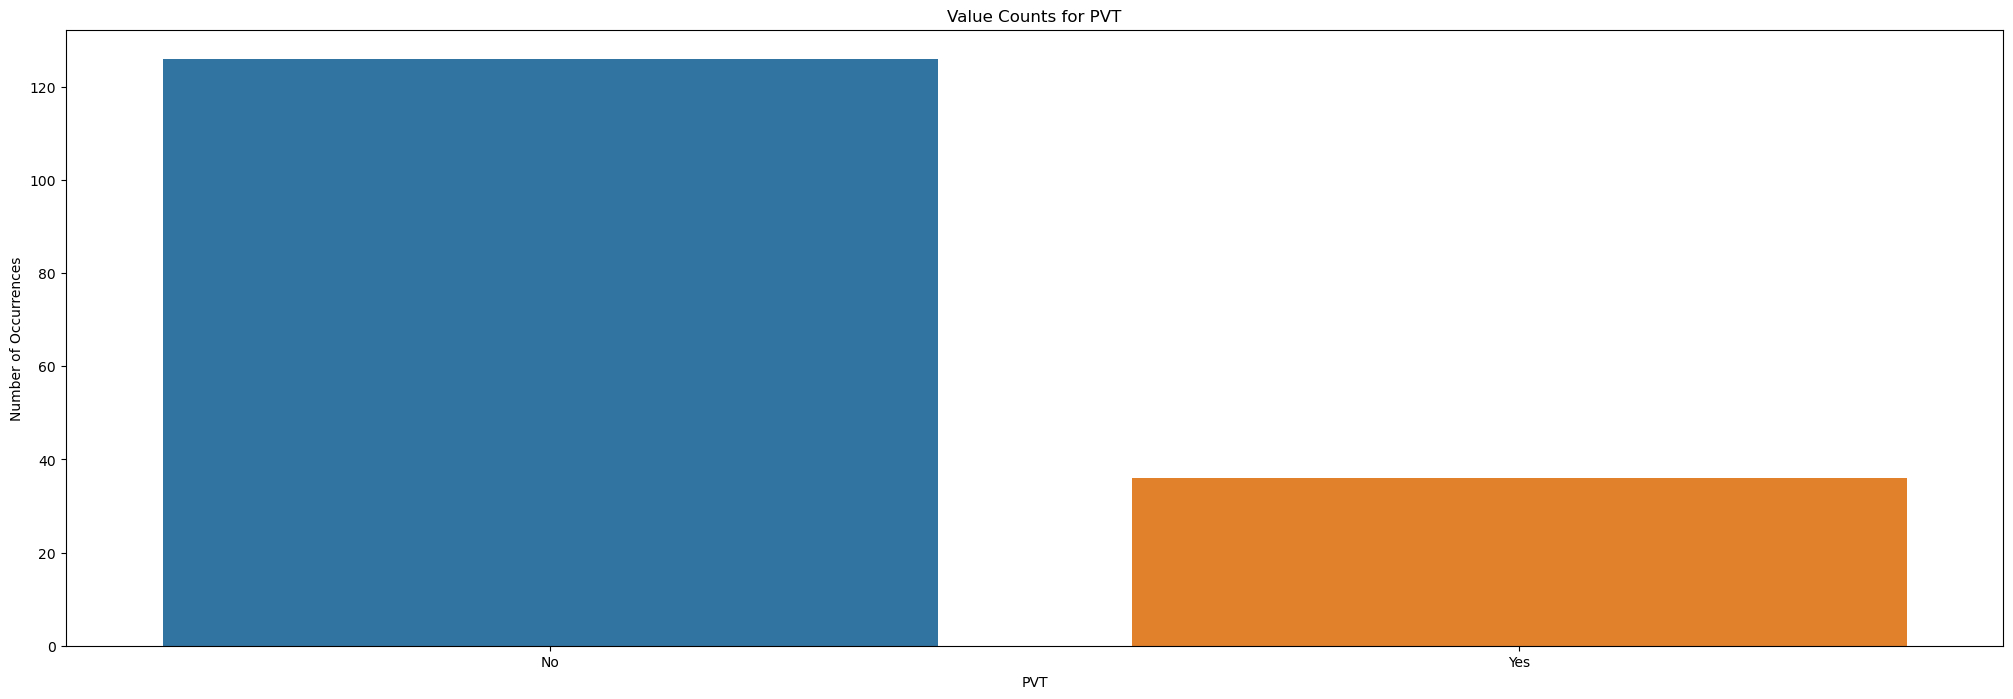

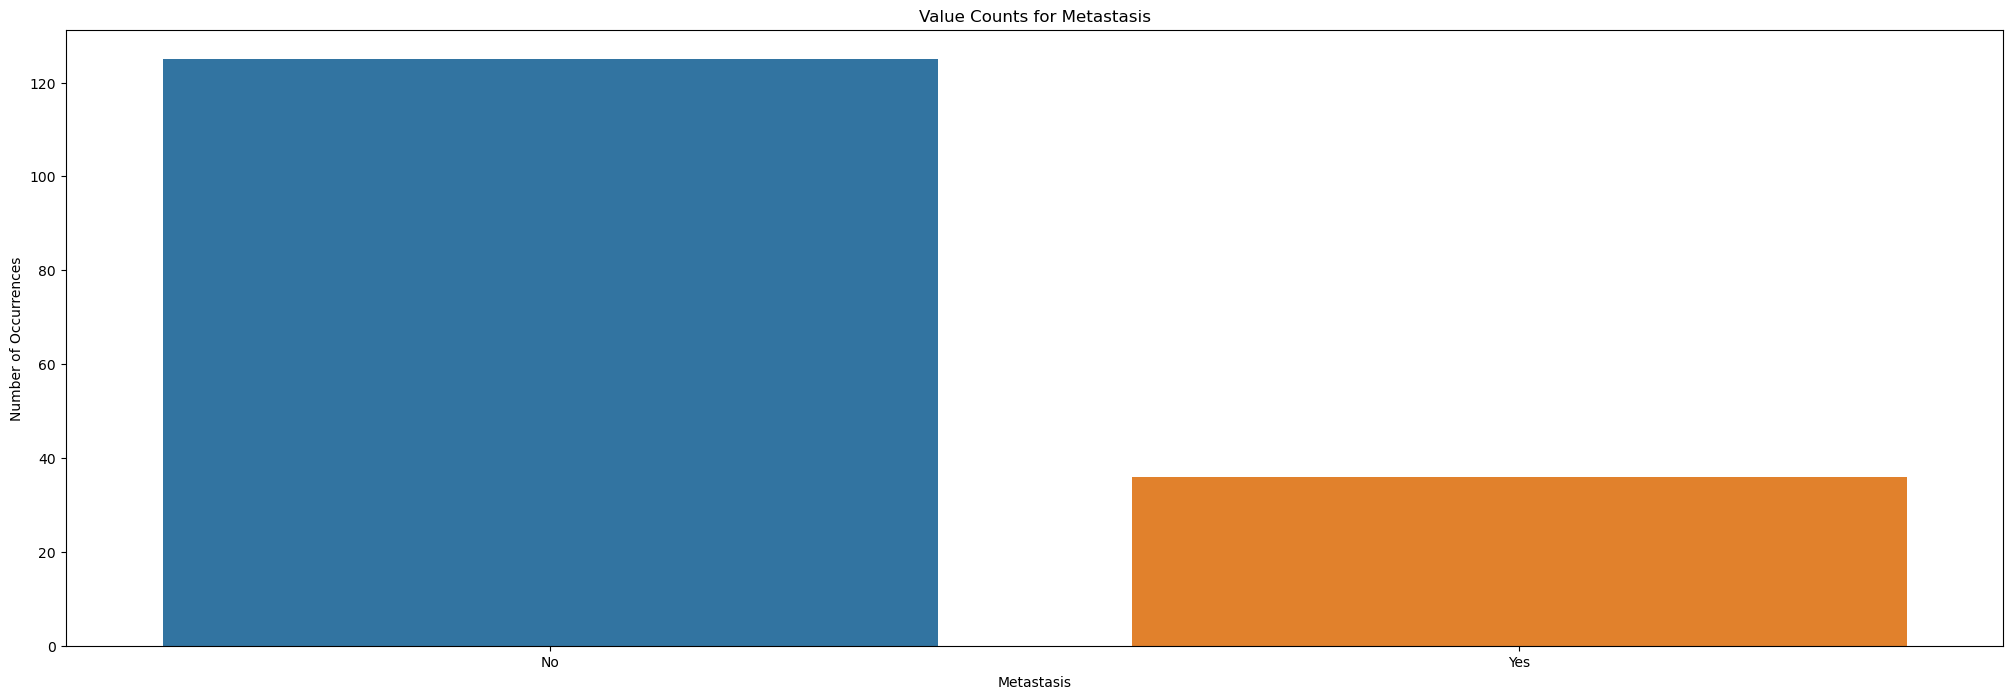

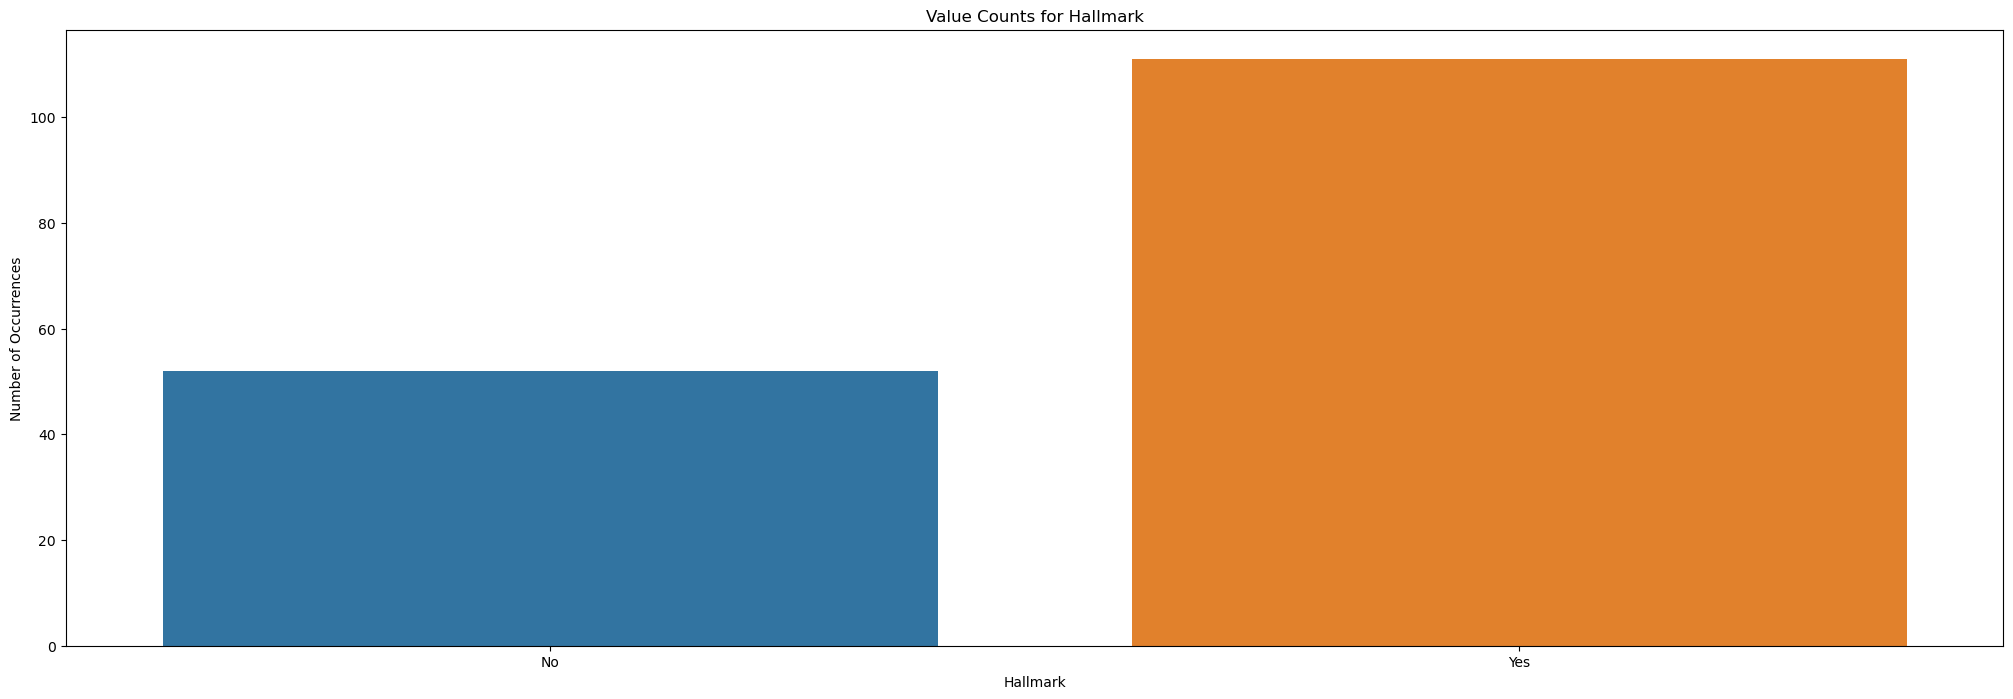

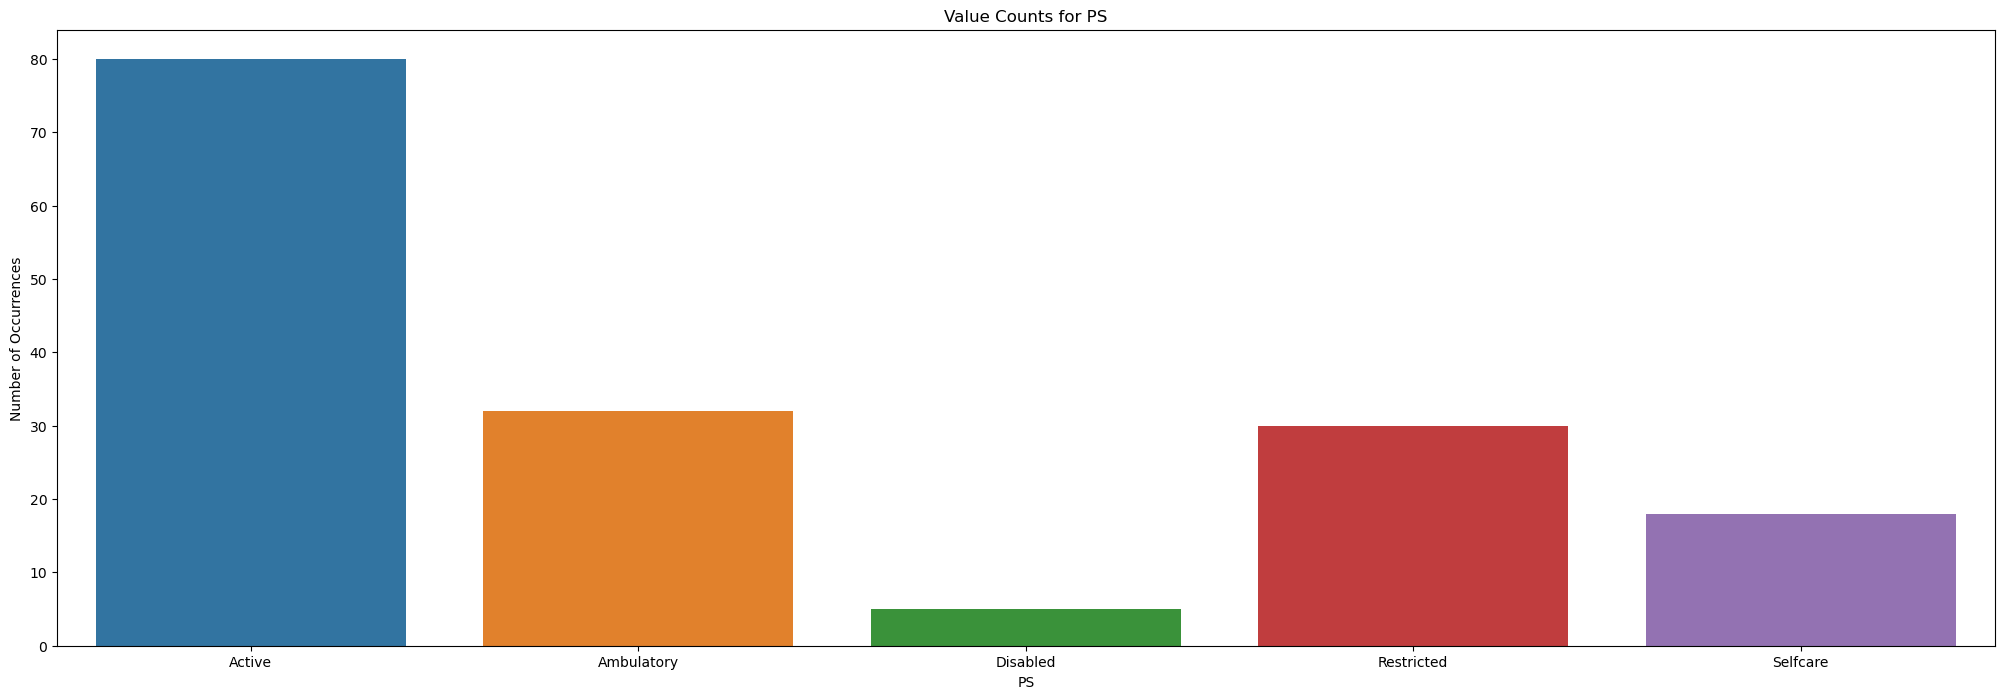

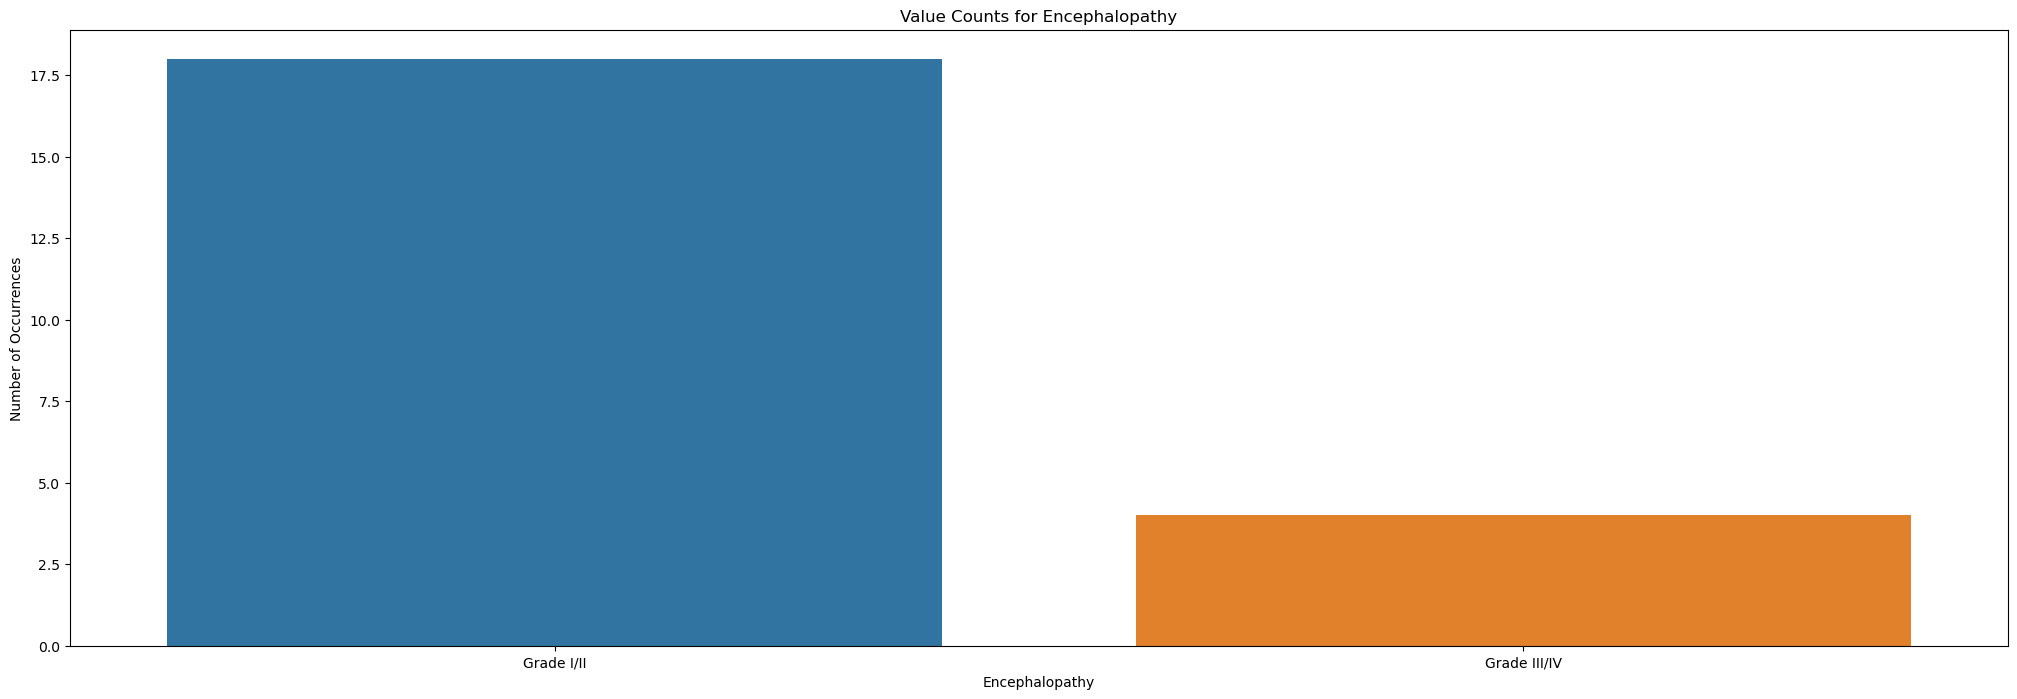

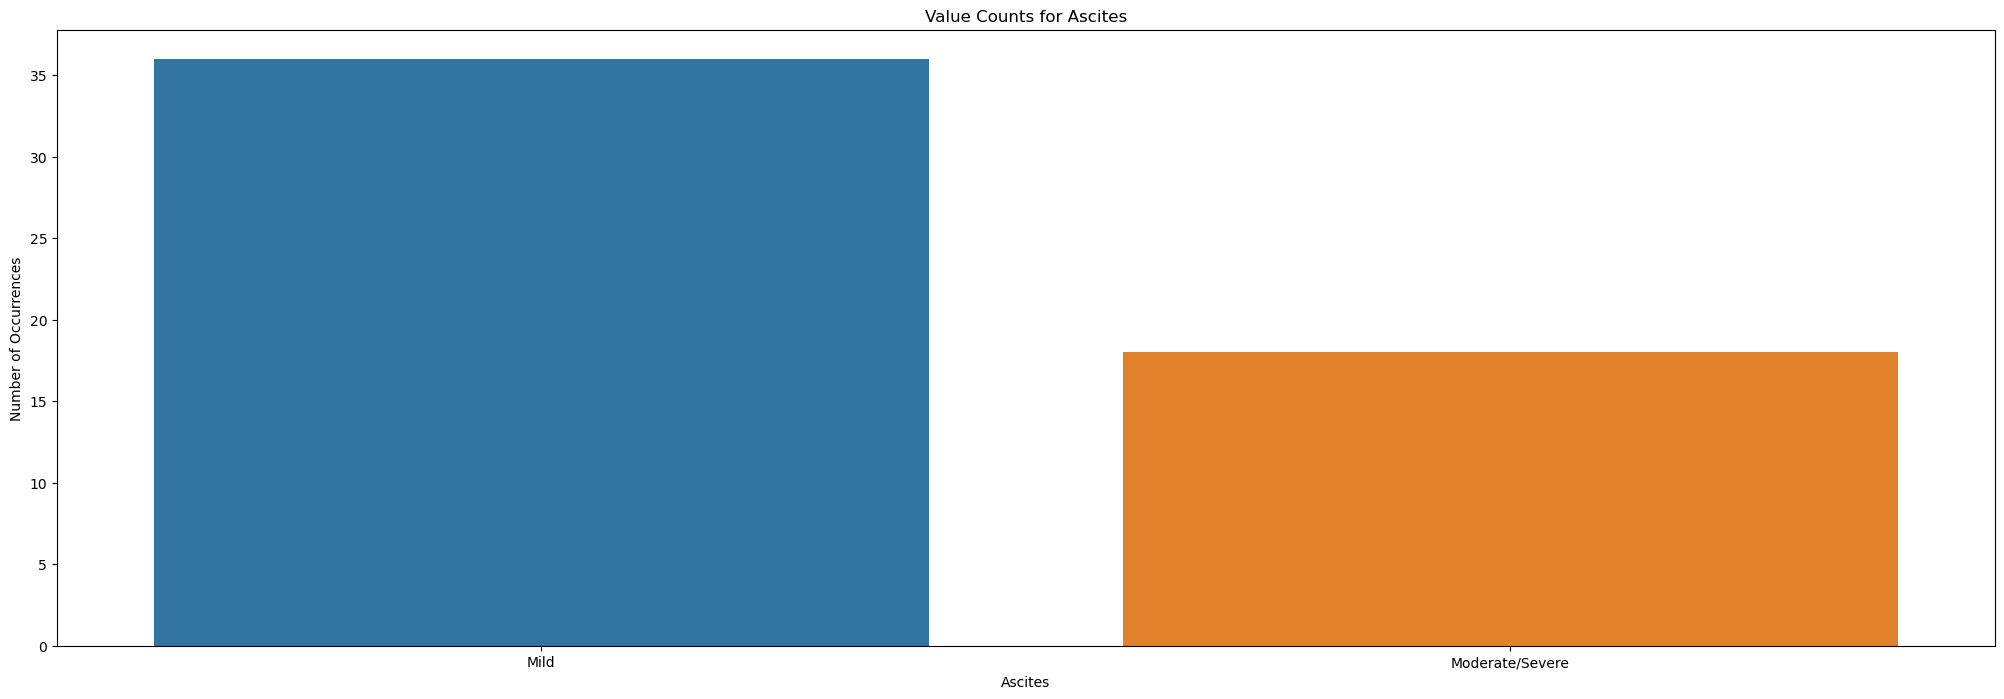

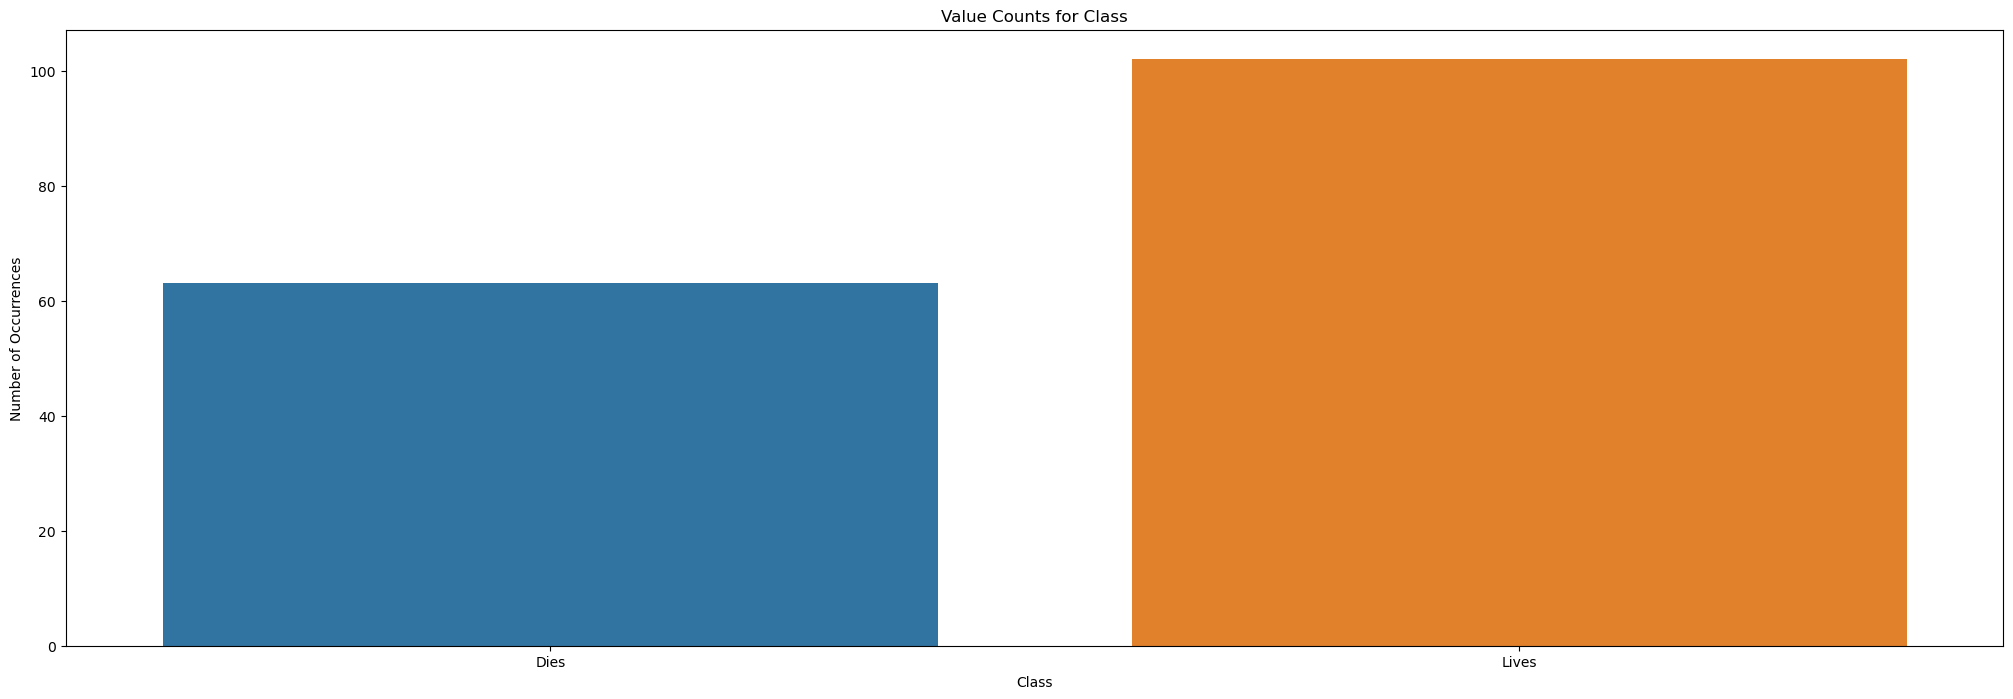

In [15]:
for column in sf.columns:
    value_counts = sf[column].value_counts().sort_index()

    # Plot the value counts
    plt.figure(figsize=(25, 8))
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f"Value Counts for {column}")
    plt.xlabel(column)
    plt.ylabel("Number of Occurrences")
    plt.show()

In [17]:
def fill_missing_with_mode(df):
    for column in df.columns:
        mode_value = df[column].mode()[0]  # Get the most frequent value
        print(f"Mode of {column}: {mode_value}")
        df[column].fillna(mode_value, inplace=True)
sf_clean = copy.deepcopy(sf)
fill_missing_with_mode(sf_clean)


Mode of Gender: Male
Mode of Symptoms: Yes
Mode of Alcohol: Yes
Mode of HBsAg: No
Mode of HBeAg: No
Mode of HBcAb: No
Mode of HCVAb: No
Mode of Cirrhosis: Yes
Mode of Endemic: No
Mode of Smoking: Yes
Mode of Diabetes: No
Mode of Obesity: No
Mode of Hemochro: No
Mode of AHT: No
Mode of CRI: No
Mode of HIV: No
Mode of NASH: No
Mode of Varices: Yes
Mode of Spleno: Yes
Mode of PHT: Yes
Mode of PVT: No
Mode of Metastasis: No
Mode of Hallmark: Yes
Mode of PS: Active
Mode of Encephalopathy: Grade I/II
Mode of Ascites: Mild
Mode of Class: Lives


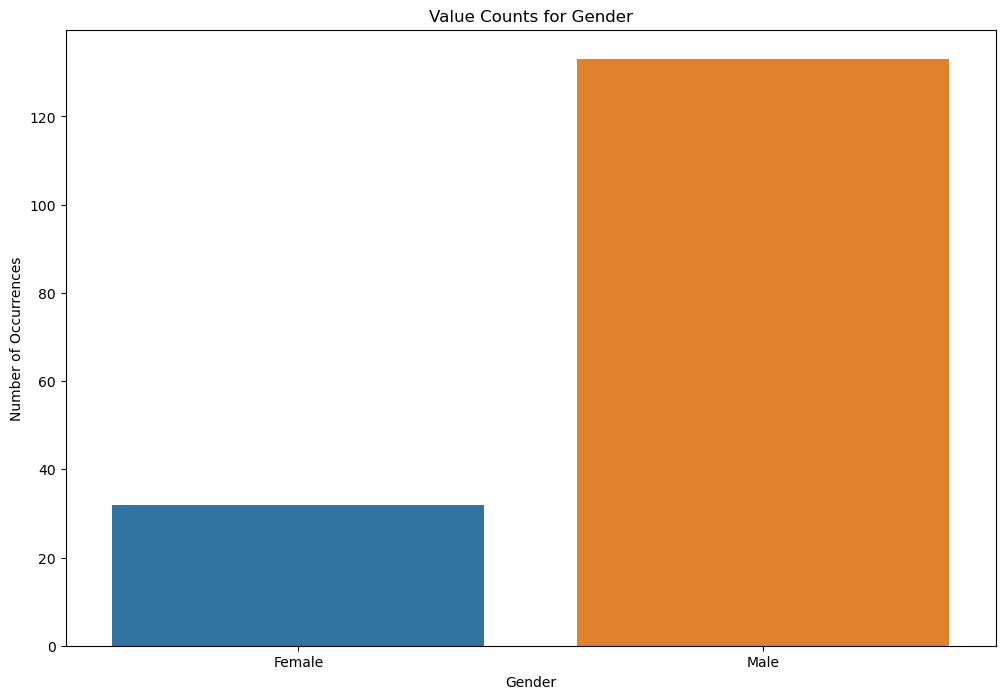

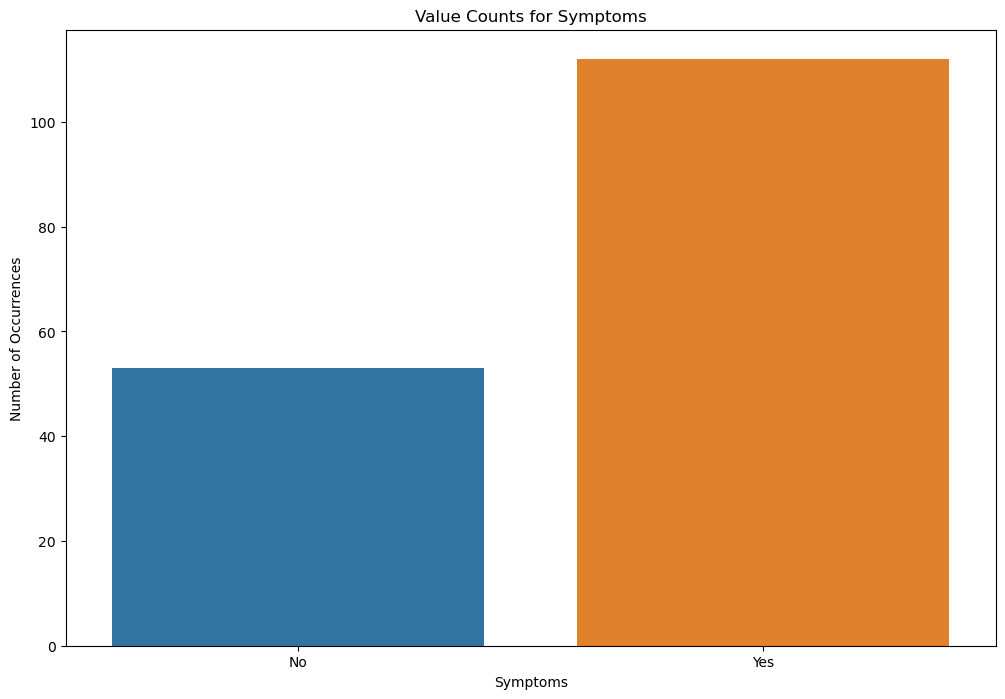

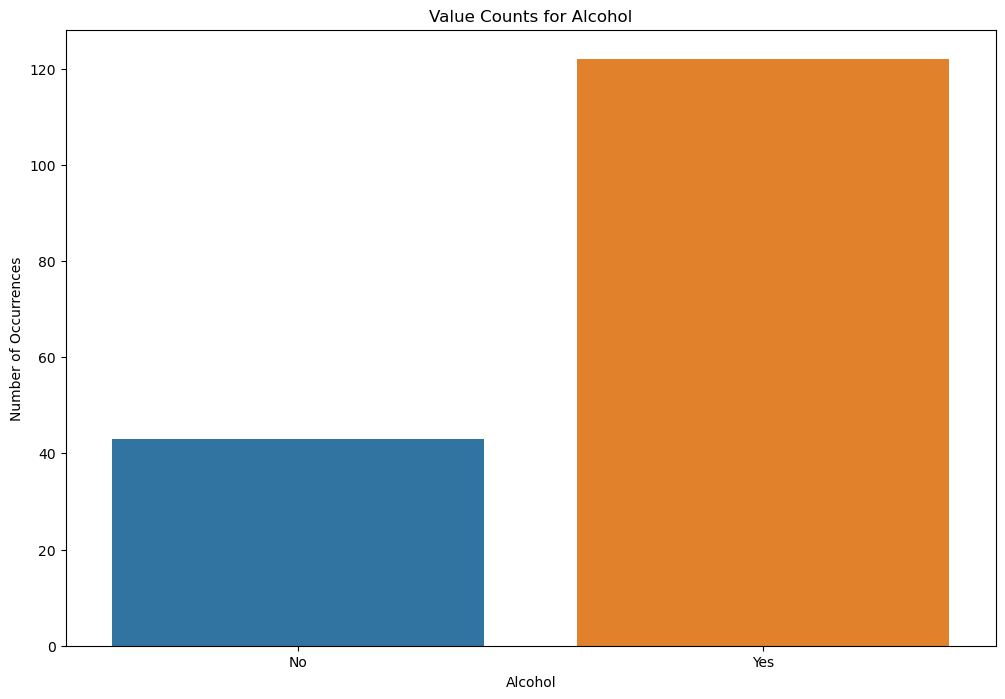

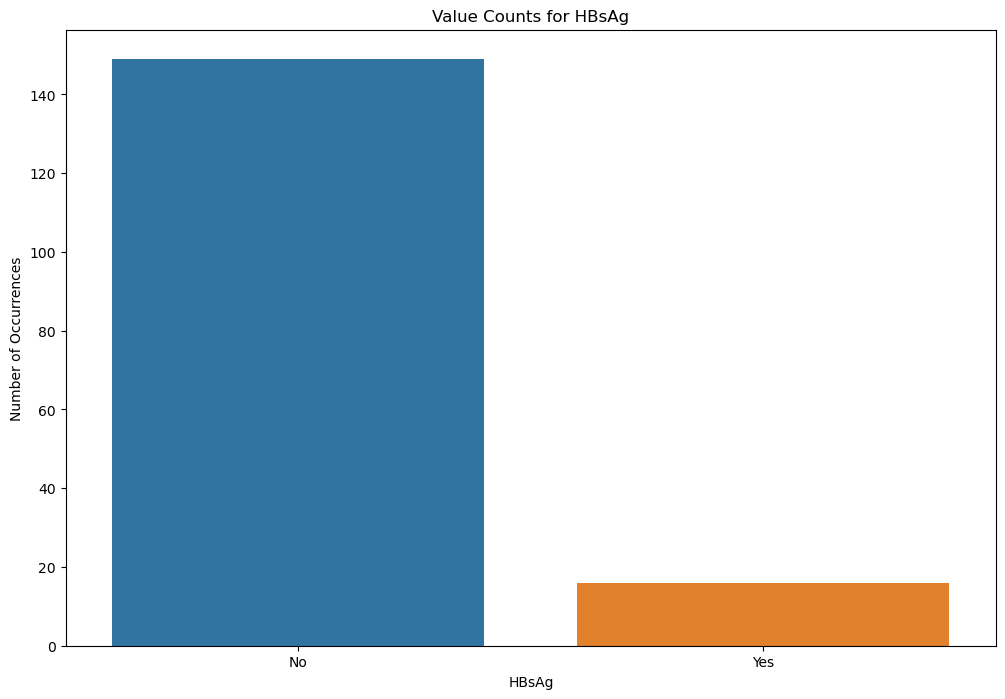

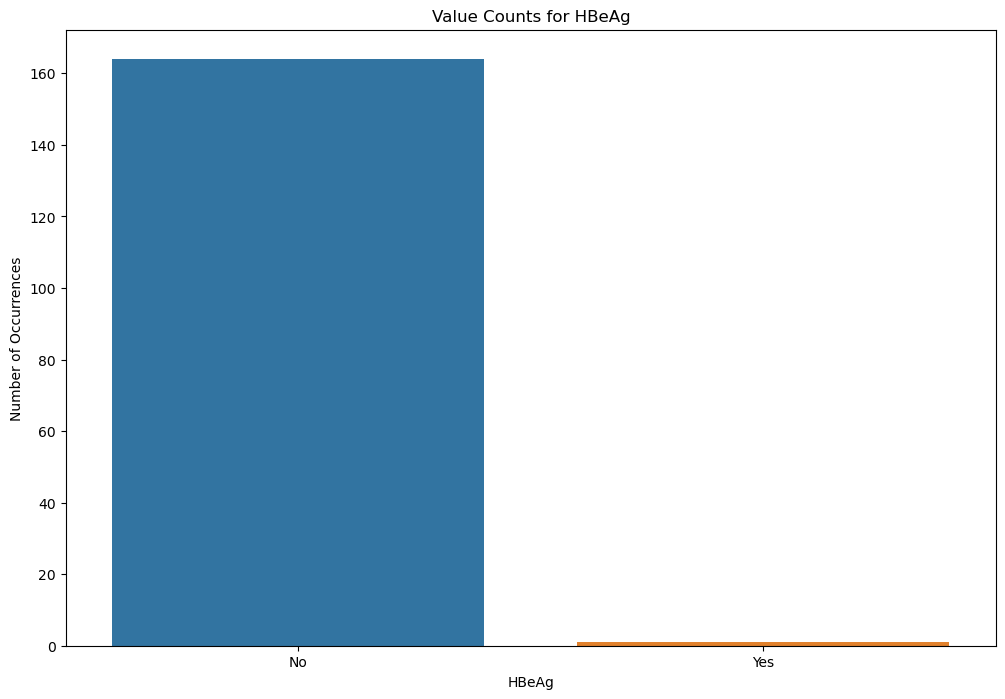

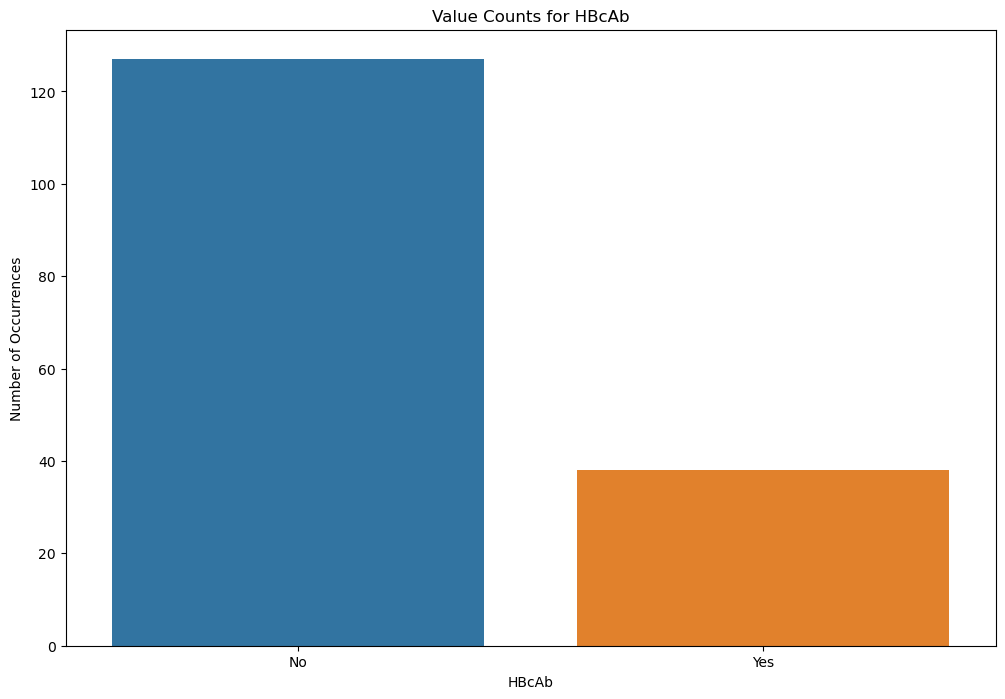

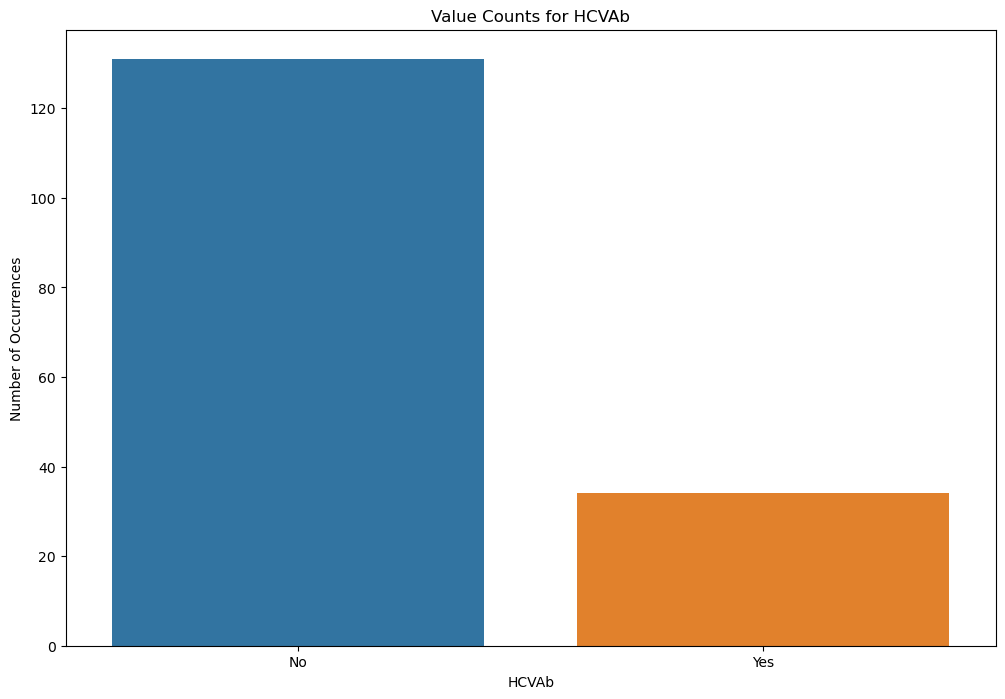

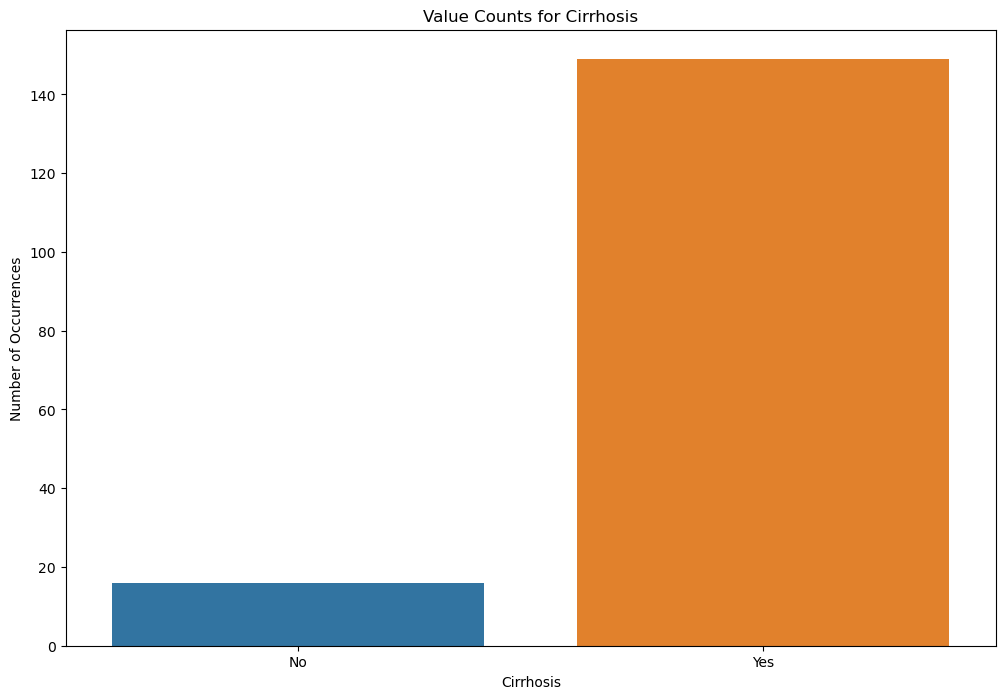

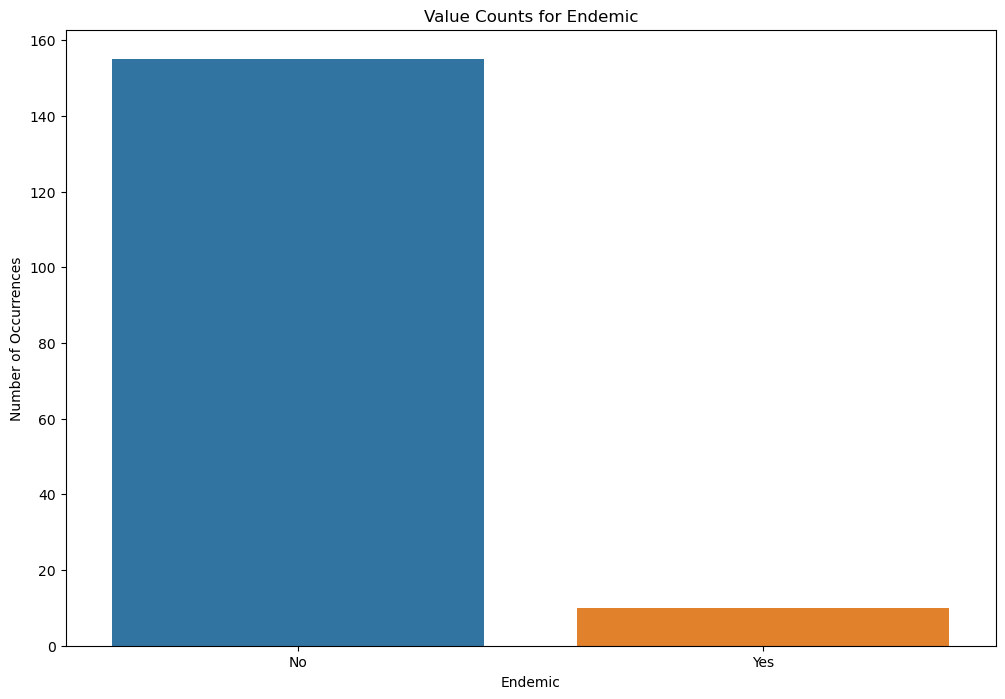

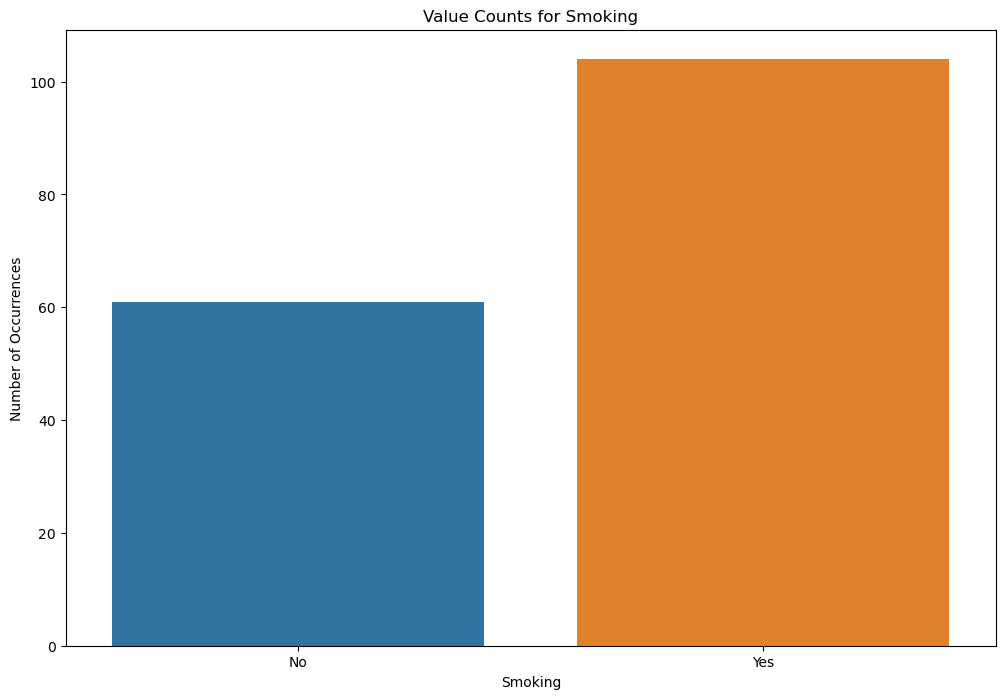

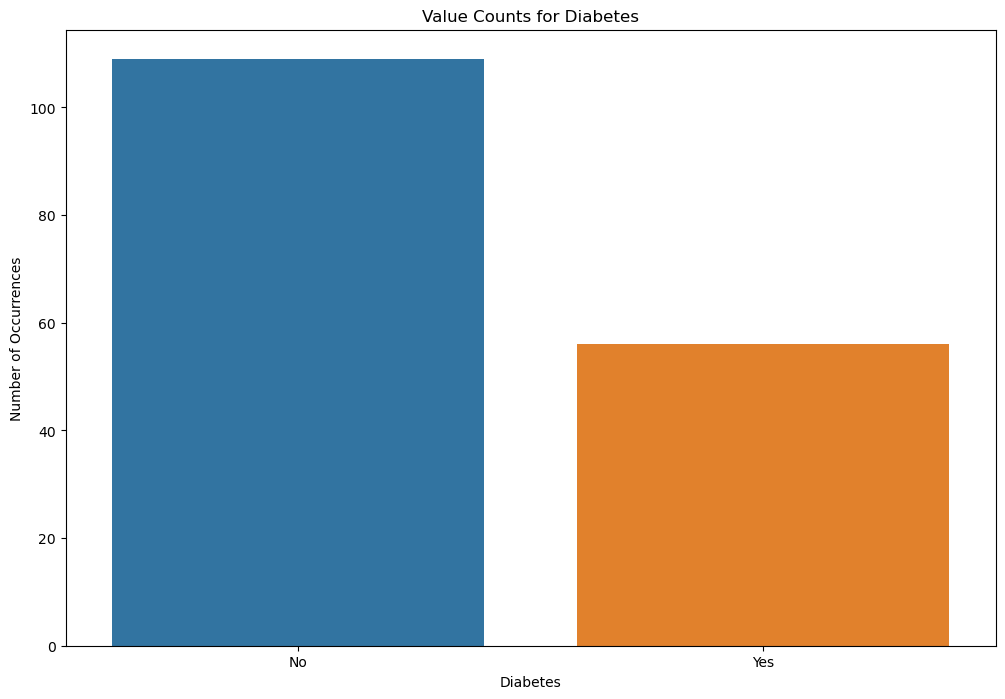

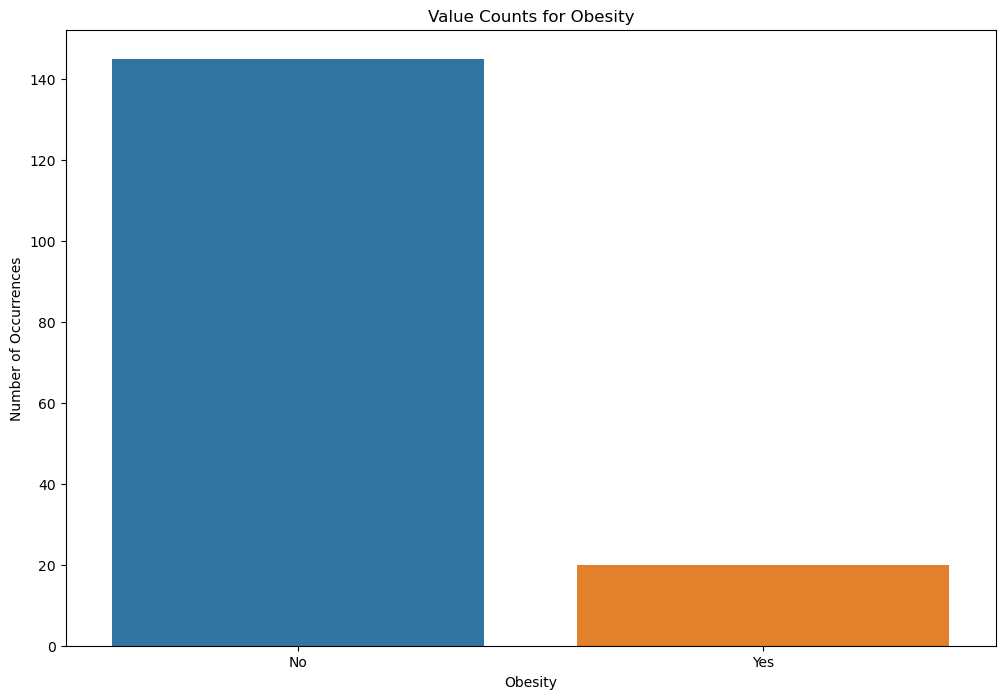

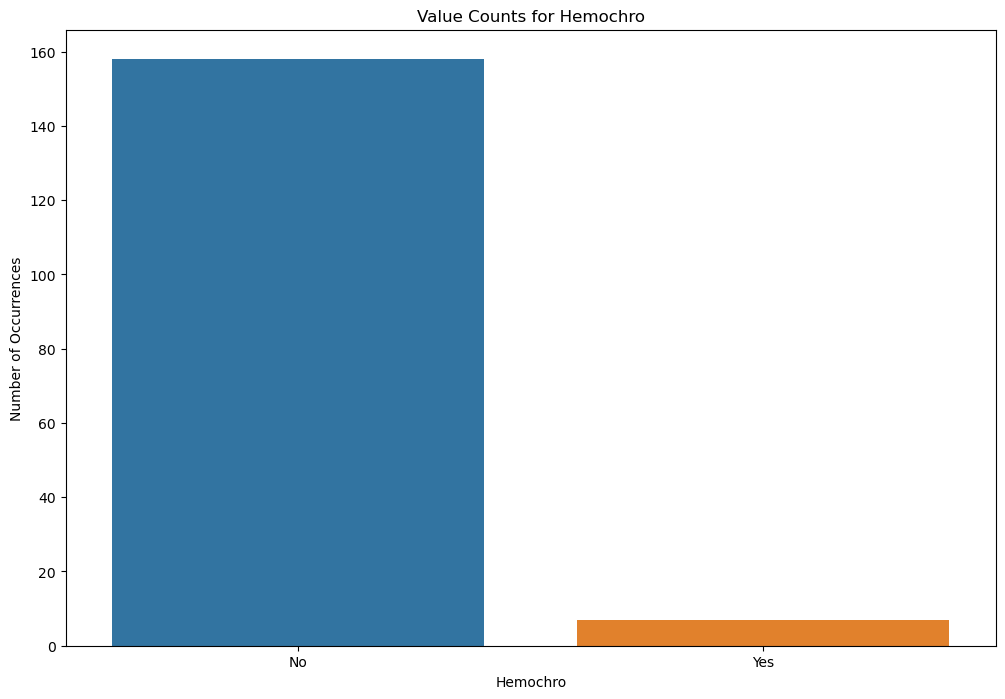

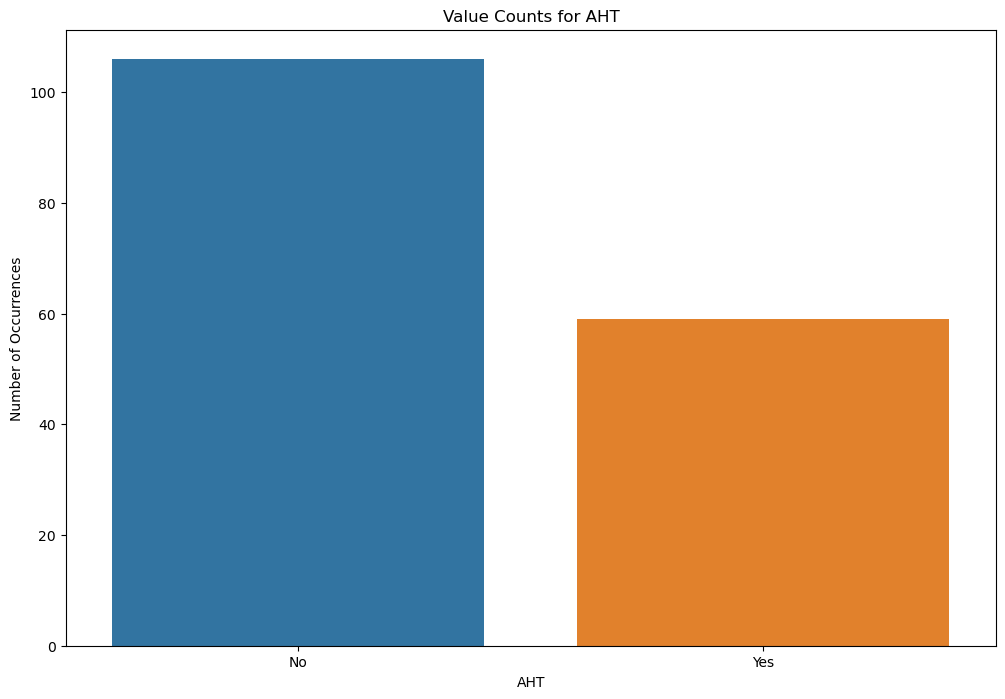

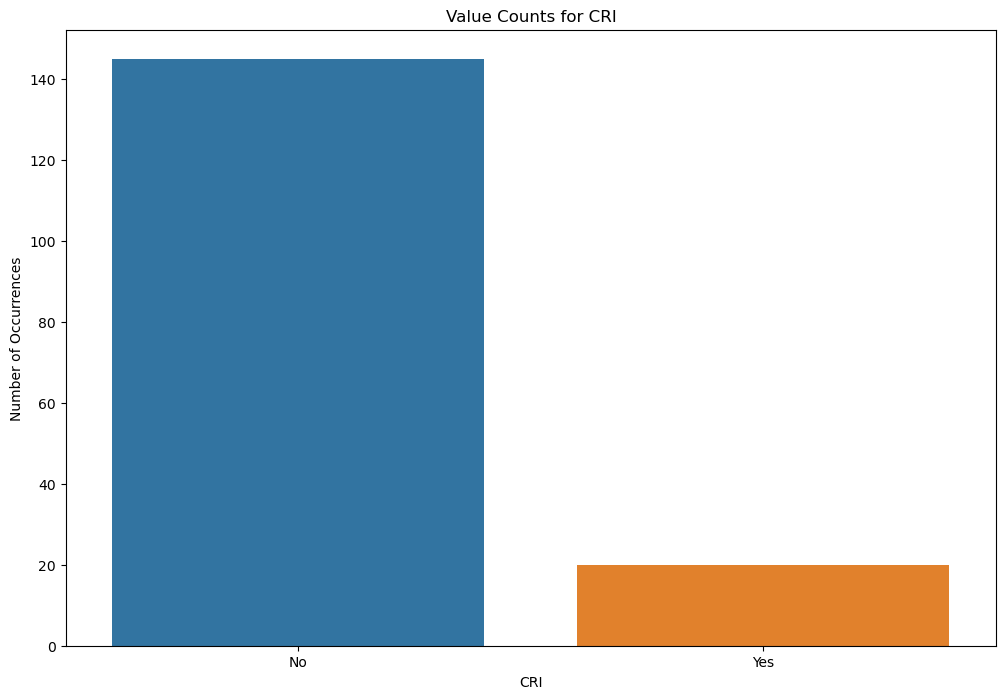

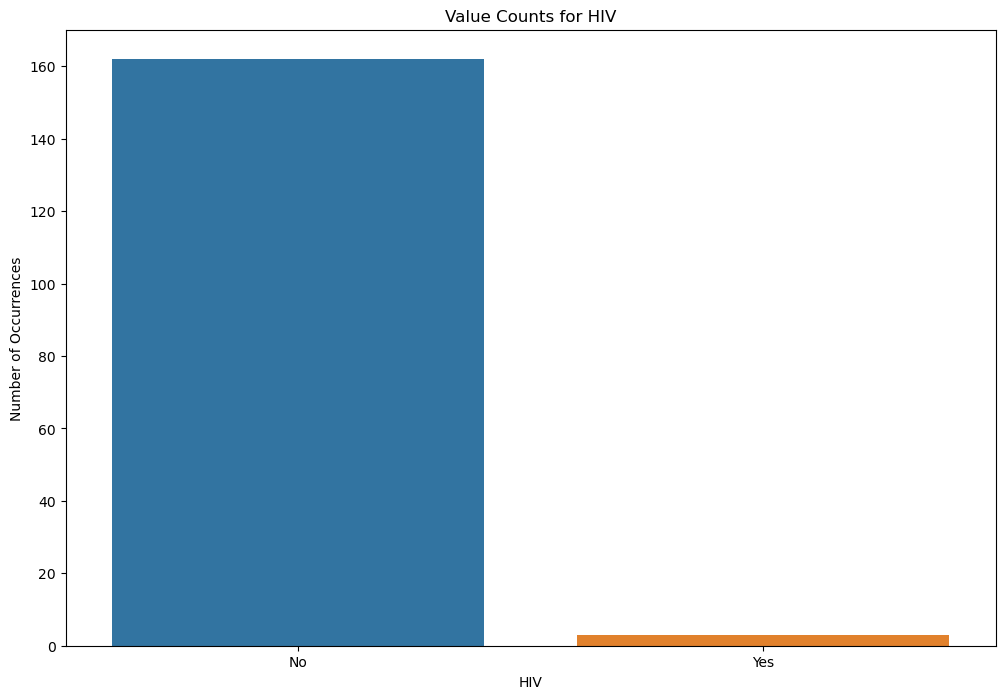

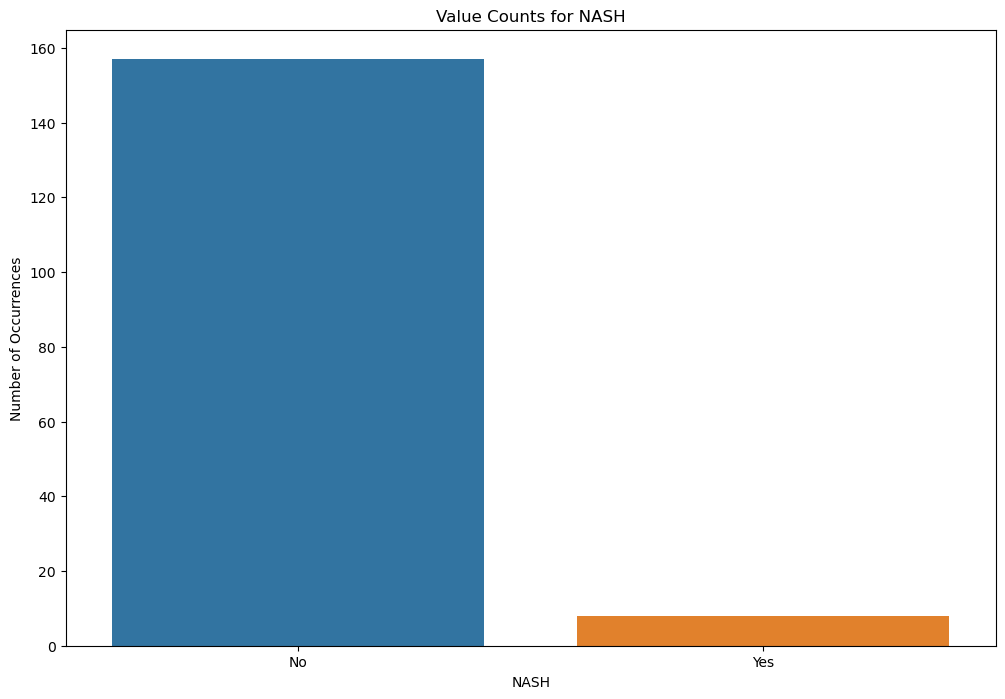

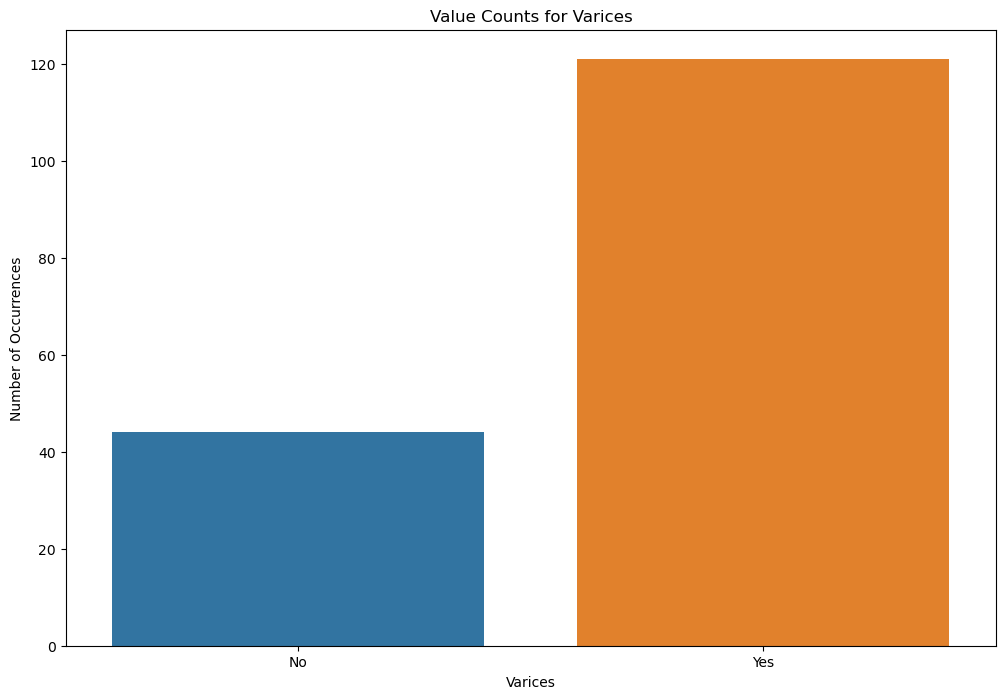

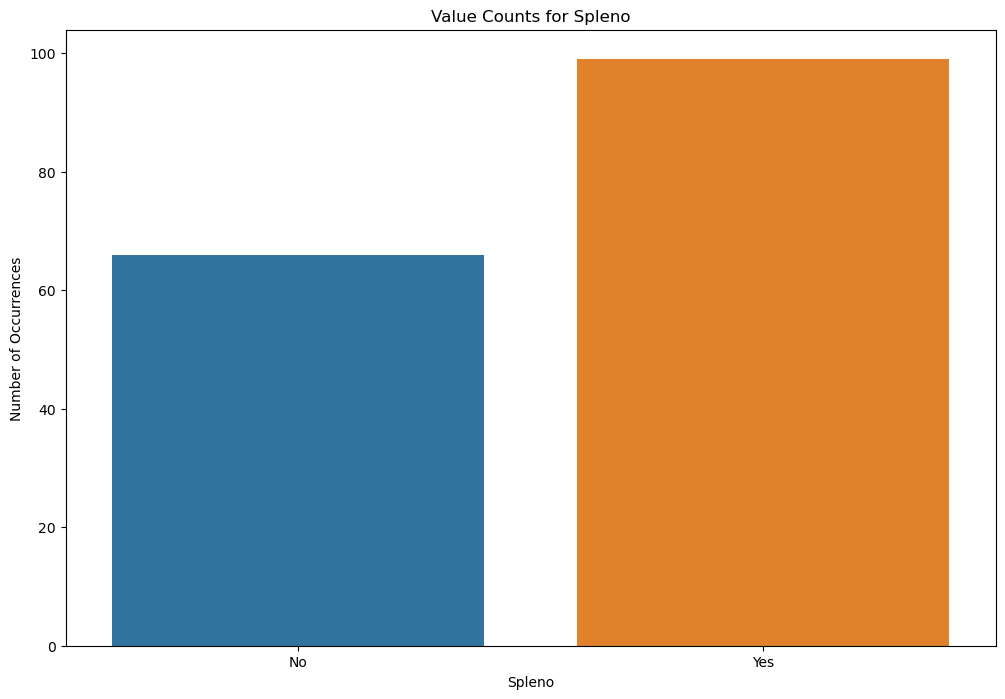

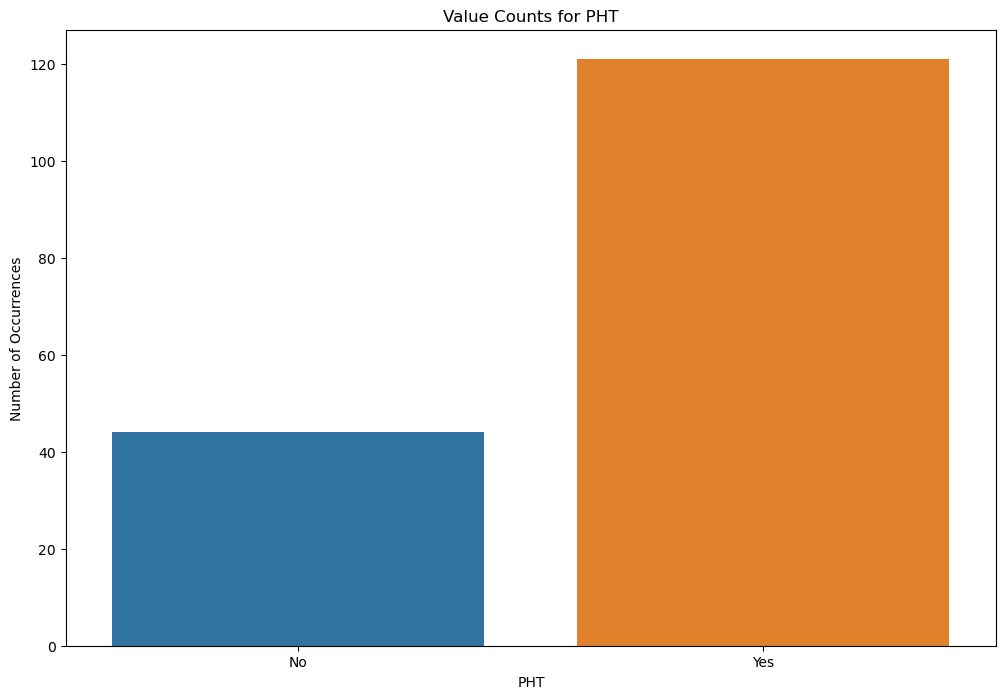

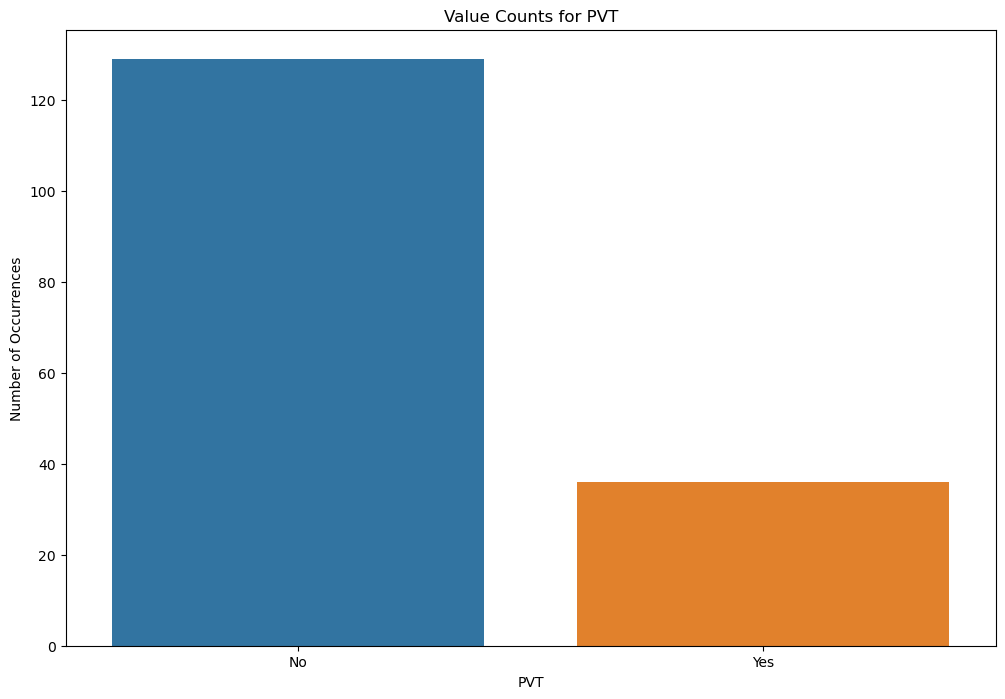

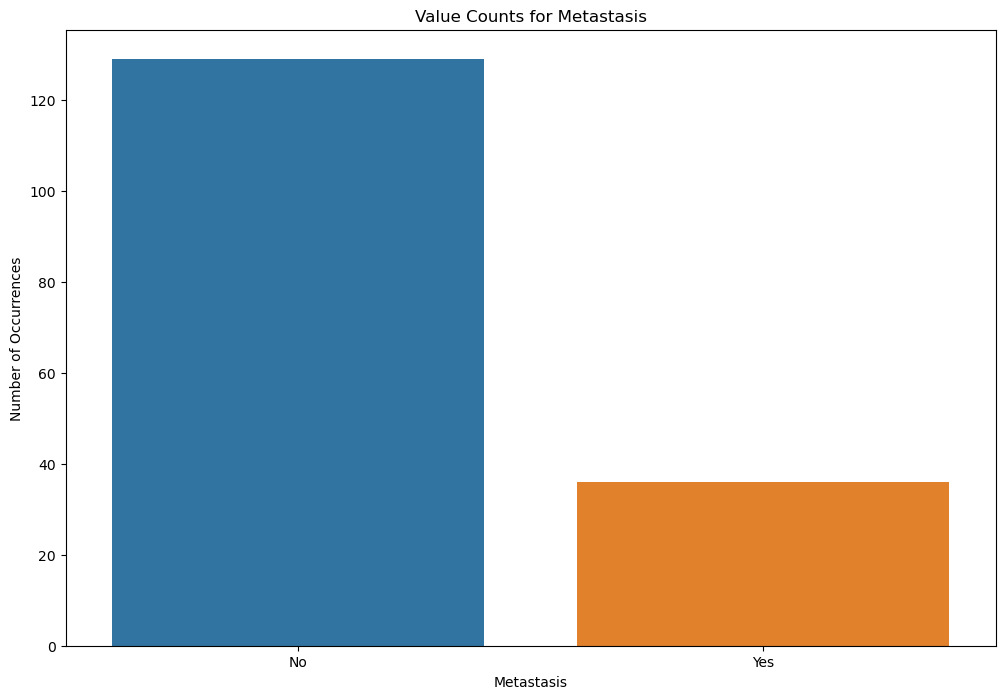

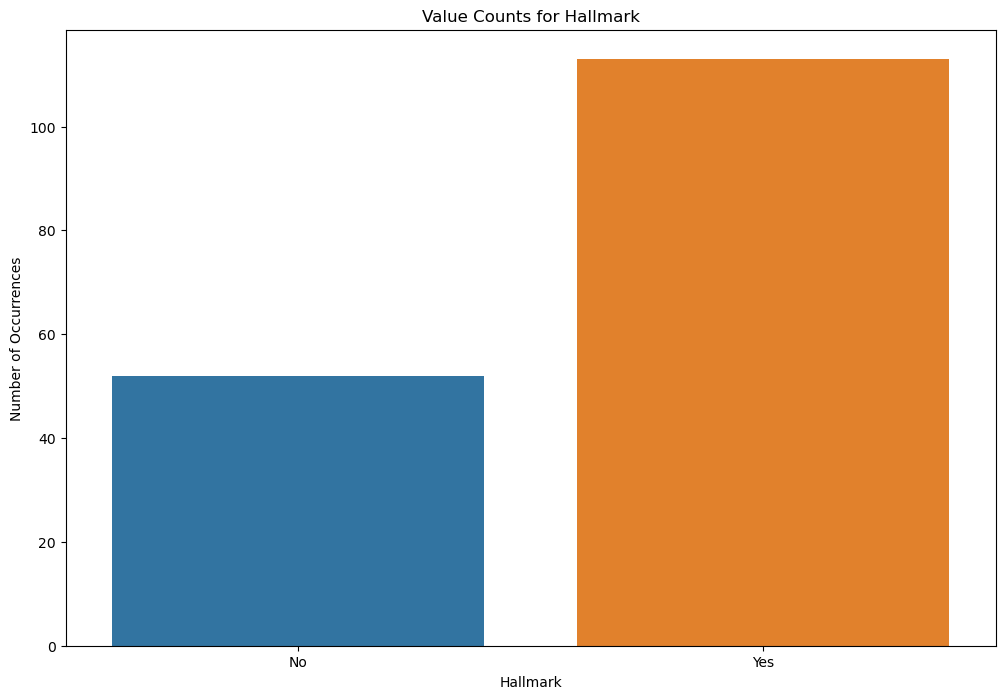

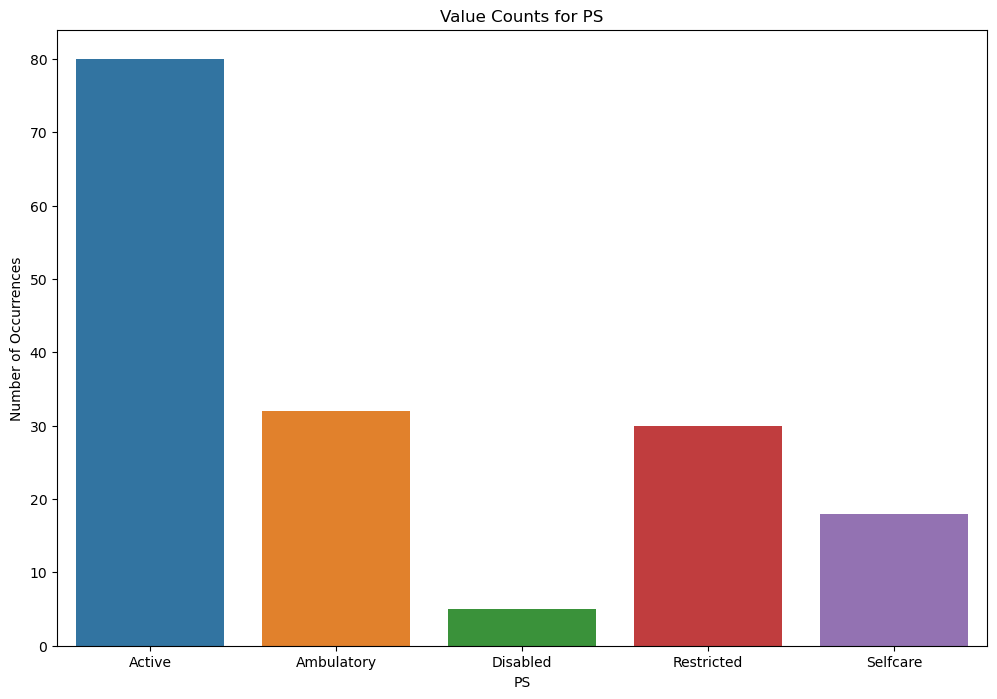

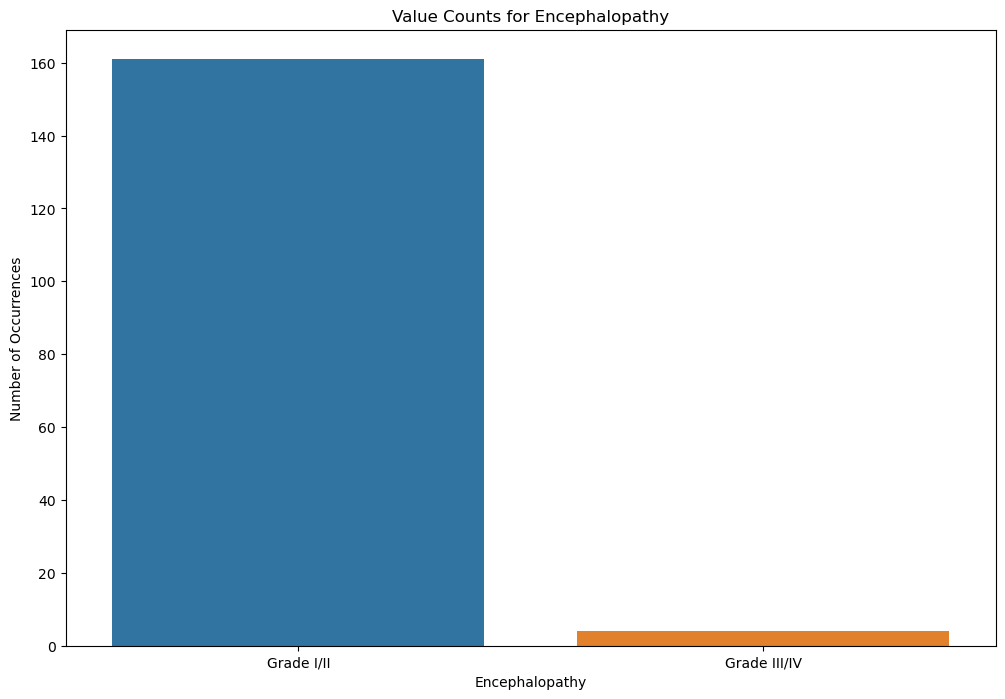

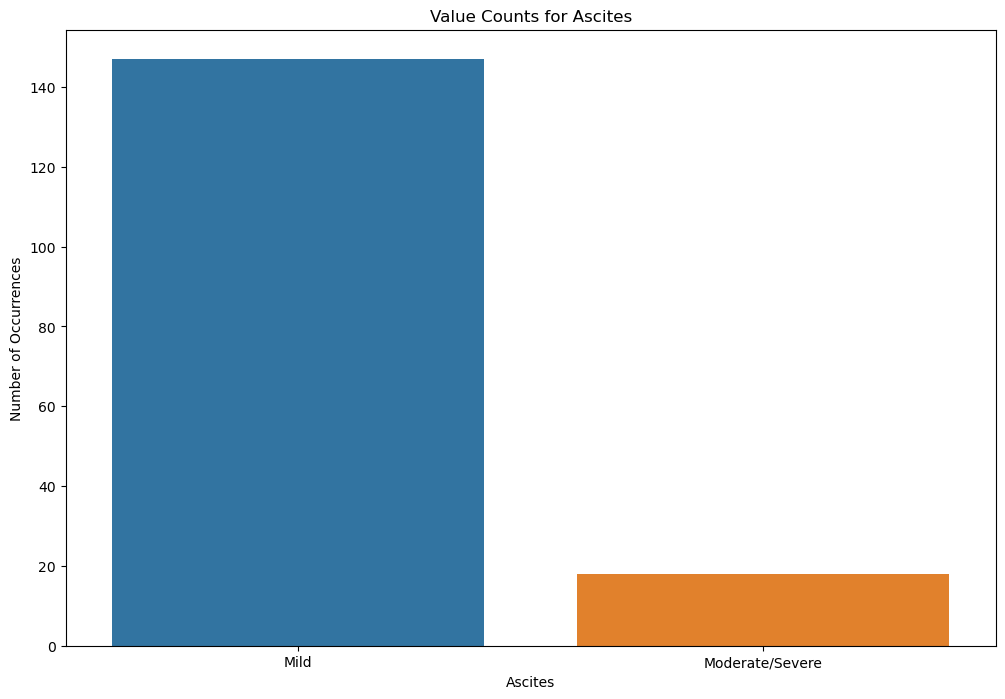

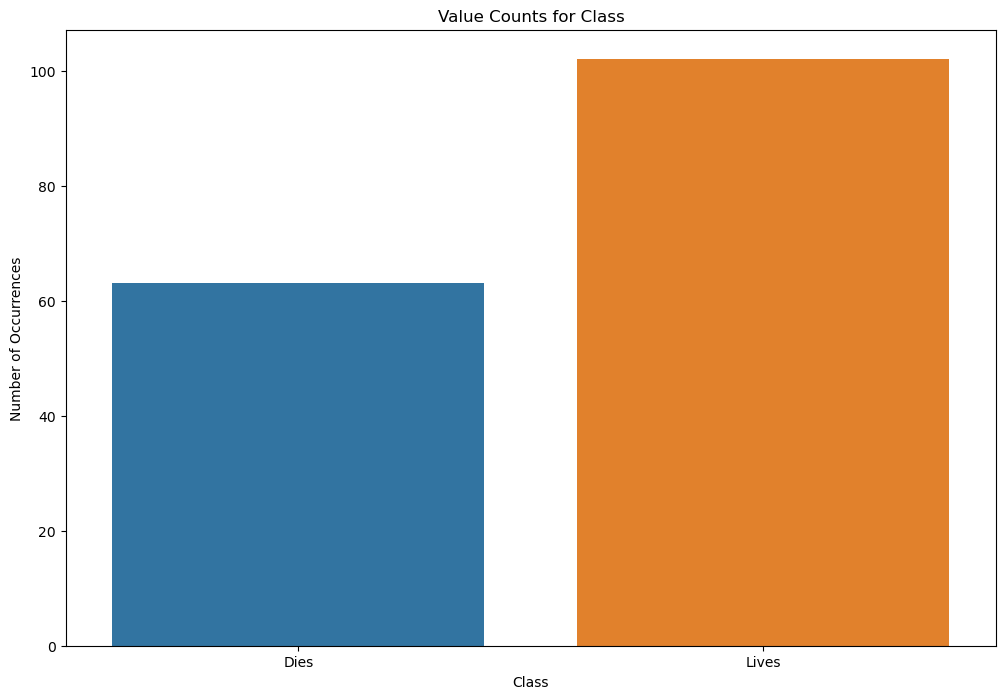

In [18]:
for column in sf_clean.columns:
    value_counts = sf_clean[column].value_counts().sort_index()

    # Plot the value counts
    plt.figure(figsize=(12, 8))
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f"Value Counts for {column}")
    plt.xlabel(column)
    plt.ylabel("Number of Occurrences")
    plt.show()

In [19]:
patient_data_clean = pd.concat([nf_clean, sf_clean], axis=1)

In [19]:
csv_file_path = 'patient_data_clean.csv'
patient_data_clean.to_csv(csv_file_path, index=False)

In [20]:
data_for_test = patient_data_clean.copy()

In [21]:
categorical_features = ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'PS', 'Encephalopathy', 'Ascites']
numerical_features = ['Age', 'Grams_day', 'Packs_year', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']
input_features = categorical_features + numerical_features
target_feature = 'Class'

In [22]:
from sklearn.model_selection import train_test_split

x_bench = data_for_test[input_features]
y_bench = data_for_test[target_feature]
y_bench = y_bench.map({'Lives' : 1, 'Dies' : 0})

x_bench = pd.get_dummies(x_bench)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_bench)
x_train_k = scaler.transform(x_bench)
x_test_k = scaler.transform(x_bench)

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_bench, y_bench, test_size=0.30, random_state=20)

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10)
tree.fit(x_train_b, y_train_b)

DecisionTreeClassifier(max_depth=10)

In [24]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(x_test_b)

              precision    recall  f1-score   support

           0       0.62      0.68      0.65        19
           1       0.79      0.74      0.77        31

    accuracy                           0.72        50
   macro avg       0.71      0.71      0.71        50
weighted avg       0.73      0.72      0.72        50

Mean Absolute Error: 0.28
AUC: 0.7130730050933787


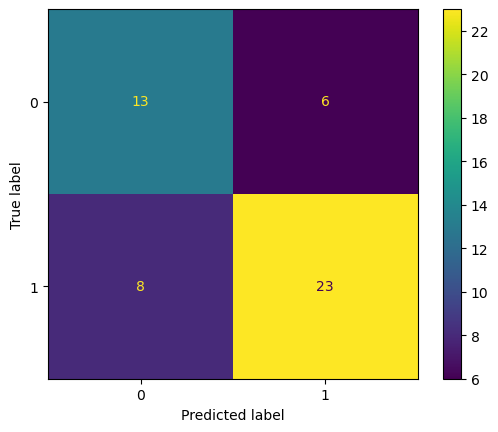

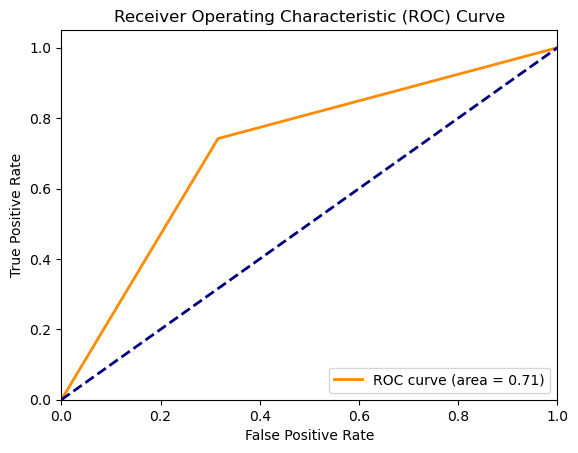

In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

print(classification_report(y_test_b, y_pred_b))
mae = mean_absolute_error(y_test_b, y_pred_b)
print("Mean Absolute Error:", mae)

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.svm import SVC
cm = confusion_matrix(y_test_b, y_pred_b)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
fpr, tpr, thresholds = roc_curve(y_test_b, y_pred_b)
roc_auc = roc_auc_score(y_test_b, y_pred_b)
print("AUC:", roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [74]:
from sklearn.model_selection import GridSearchCV

grid_model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [10, 20, 30,],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=grid_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train_b, y_train_b)
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [68]:
best_model = grid_search.best_estimator_
print(best_model)
y_pred_z = best_model.predict(x_test_b)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)


              precision    recall  f1-score   support

           0       0.58      0.58      0.58        19
           1       0.74      0.74      0.74        31

    accuracy                           0.68        50
   macro avg       0.66      0.66      0.66        50
weighted avg       0.68      0.68      0.68        50

Mean Absolute Error: 0.32
AUC: 0.6604414261460102


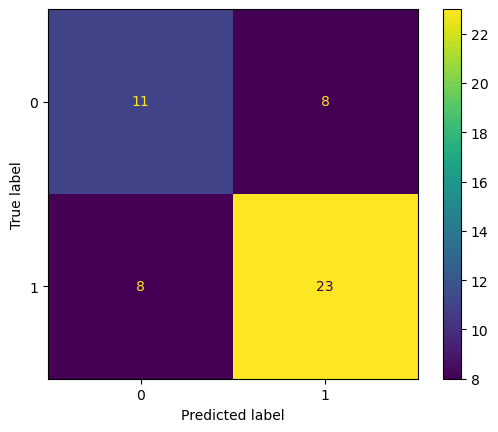

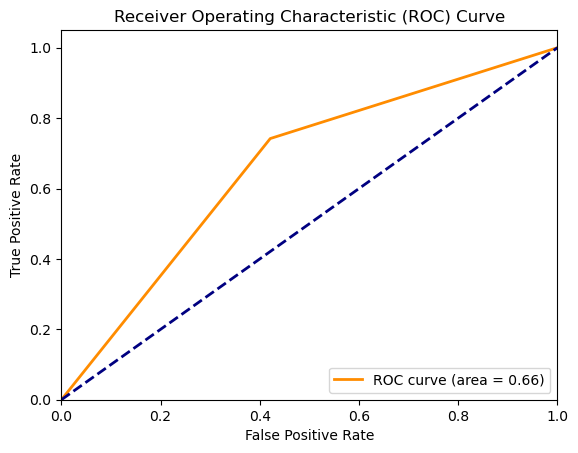

In [77]:
mae = mean_absolute_error(y_test_b, y_pred_z)
print(classification_report(y_test_b, y_pred_z))
print("Mean Absolute Error:", mae)
cm = confusion_matrix(y_test_b, y_pred_z)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
fpr, tpr, thresholds = roc_curve(y_test_b, y_pred_z)
roc_auc = roc_auc_score(y_test_b, y_pred_z)
print("AUC:", roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:
x_train_k, x_test_k, y_train_k, y_test_k = train_test_split(x_bench, y_bench, test_size=0.33, random_state=20)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train_k, y_train_k)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred_k = classifier.predict(x_test_k)

              precision    recall  f1-score   support

           0       0.55      0.29      0.37        21
           1       0.66      0.85      0.74        34

    accuracy                           0.64        55
   macro avg       0.60      0.57      0.56        55
weighted avg       0.62      0.64      0.60        55

Mean Absolute Error: 0.36363636363636365
AUC: 0.569327731092437


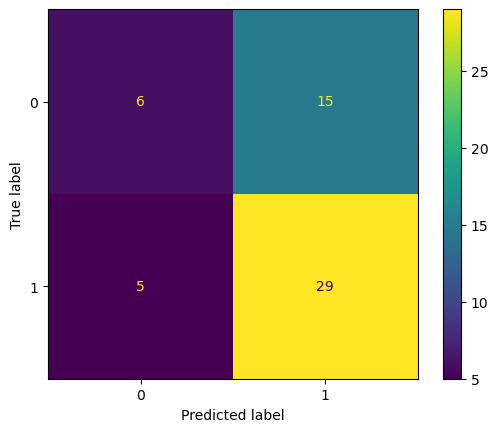

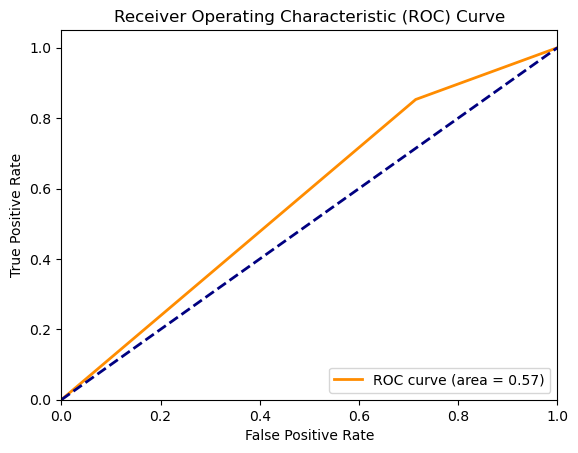

In [78]:
print(classification_report(y_test_k, y_pred_k))
mae = mean_absolute_error(y_test_k, y_pred_k)
print("Mean Absolute Error:", mae)
cm = confusion_matrix(y_test_k, y_pred_k)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
fpr, tpr, thresholds = roc_curve(y_test_k, y_pred_k)
roc_auc = roc_auc_score(y_test_k, y_pred_k)
print("AUC:", roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

x_train_g, x_test_g, y_train_g, y_test_g = train_test_split(x_bench, y_bench, test_size=0.33, random_state=20)

gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gboost.fit(x_train_g, y_train_g)

GradientBoostingClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.68      0.62      0.65        21
           1       0.78      0.82      0.80        34

    accuracy                           0.75        55
   macro avg       0.73      0.72      0.73        55
weighted avg       0.74      0.75      0.74        55

Mean Absolute Error: 0.2545454545454545
AUC: 0.7212885154061625


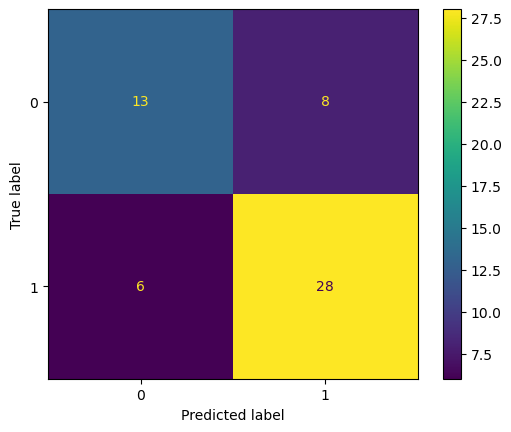

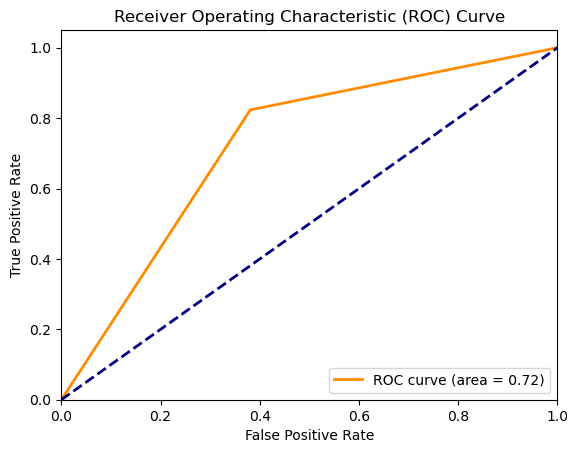

In [79]:
y_pred_g = gboost.predict(x_test_g)

print(classification_report(y_test_g, y_pred_g))
mae = mean_absolute_error(y_test_g, y_pred_g)
print("Mean Absolute Error:", mae)
cm = confusion_matrix(y_test_g, y_pred_g)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
fpr, tpr, thresholds = roc_curve(y_test_g, y_pred_g)
roc_auc = roc_auc_score(y_test_g, y_pred_g)
print("AUC:", roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [70]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=100, random_state=42)

x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x_bench, y_bench, test_size=0.33, random_state=20)

rforest.fit(x_train_r, y_train_r)

y_pred_r = rforest.predict(x_test_r)

              precision    recall  f1-score   support

           0       0.73      0.52      0.61        21
           1       0.75      0.88      0.81        34

    accuracy                           0.75        55
   macro avg       0.74      0.70      0.71        55
weighted avg       0.74      0.75      0.73        55

Mean Absolute Error: 0.2545454545454545
AUC: 0.7030812324929971


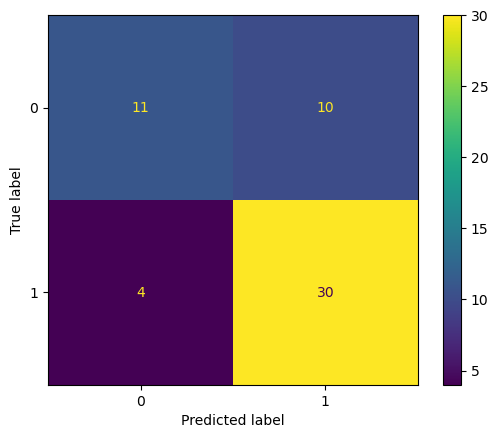

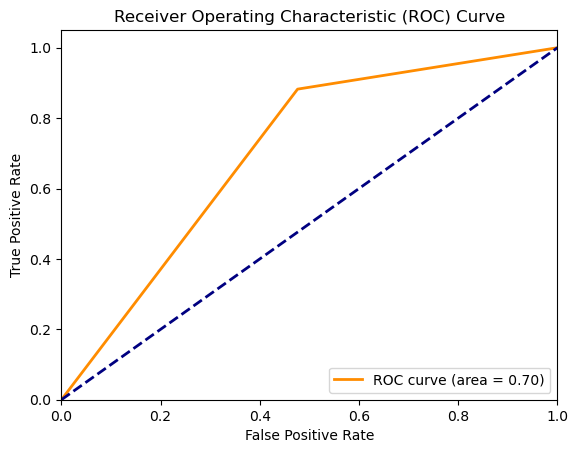

In [80]:
print(classification_report(y_test_r, y_pred_r))
mae = mean_absolute_error(y_test_r, y_pred_r)
print("Mean Absolute Error:", mae)
cm = confusion_matrix(y_test_r, y_pred_r)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
fpr, tpr, thresholds = roc_curve(y_test_r, y_pred_r)
roc_auc = roc_auc_score(y_test_r, y_pred_r)
print("AUC:", roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()